In [12]:
import json

# Load the updated JSON file
file_path = r'C:\Users\U10093022\OneDrive - BASF\Desktop\updated_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Verify the data
print(f"Total entries loaded: {len(data)}")


Total entries loaded: 182


In [13]:
# Calculate accuracy using the `is_correct` field
true_count = sum(1 for entry in data if entry['is_correct'])
false_count = len(data) - true_count
accuracy = (true_count / len(data)) * 100

print(f"Correct Entries: {true_count}")
print(f"Incorrect Entries: {false_count}")
print(f"Accuracy: {accuracy:.2f}%")


Correct Entries: 11
Incorrect Entries: 171
Accuracy: 6.04%


In [14]:
# Separate entries into correct and incorrect
correct_entries = [entry for entry in data if entry['is_correct']]
incorrect_entries = [entry for entry in data if not entry['is_correct']]

print(f"Correct Entries: {len(correct_entries)}")
print(f"Incorrect Entries: {len(incorrect_entries)}")


Correct Entries: 11
Incorrect Entries: 171


In [15]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
print("Matplotlib is installed and ready to use!")


Matplotlib is installed and ready to use!


TypeError: Image data of dtype <U1224 cannot be converted to float

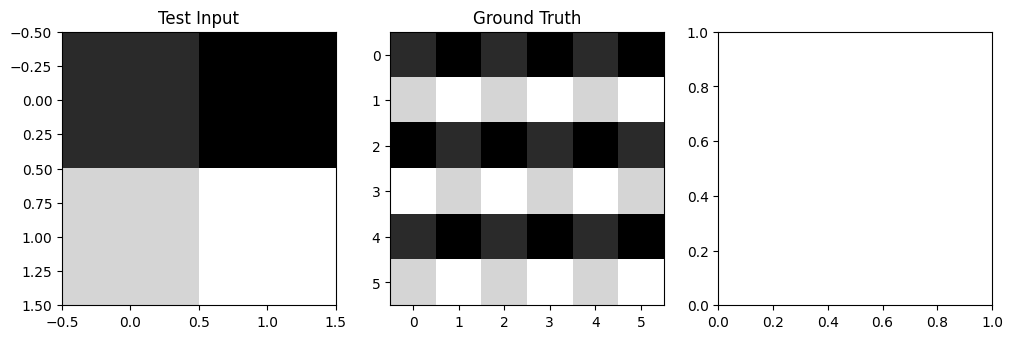

In [18]:
import matplotlib.pyplot as plt

def visualize_example(entry, title):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(entry['test_input'], cmap='gray')
    axs[0].set_title('Test Input')
    axs[1].imshow(entry['ground_truth'], cmap='gray')
    axs[1].set_title('Ground Truth')
    solution_matrix = entry.get('model_output')  # Use actual output if present
    axs[2].imshow(solution_matrix, cmap='gray')
    axs[2].set_title('Model Output')
    fig.suptitle(title)
    plt.show()

# Visualize one correct example
if correct_entries:
    visualize_example(correct_entries[0], "Correct Example")

# Visualize one incorrect example
if incorrect_entries:
    visualize_example(incorrect_entries[0], "Incorrect Example")


In [19]:
# Check the data types of the fields for a single entry
entry = data[0]  # Replace 0 with any index to inspect a specific entry

print(f"Type of 'test_input': {type(entry['test_input'])}")
print(f"Type of 'ground_truth': {type(entry['ground_truth'])}")
print(f"Type of 'model_output': {type(entry['model_output'])}")


Type of 'test_input': <class 'list'>
Type of 'ground_truth': <class 'list'>
Type of 'model_output': <class 'str'>


In [20]:
import ast

def parse_model_output(model_output):
    try:
        # Parse the string into a Python list
        return ast.literal_eval(model_output.strip())
    except Exception as e:
        print(f"Error parsing model_output: {e}")
        return None


In [21]:
import numpy as np

def prepare_matrix(matrix):
    # Convert matrix to numpy array if it's a list
    if isinstance(matrix, list):
        return np.array(matrix)
    return matrix


In [22]:
import matplotlib.pyplot as plt

def visualize_example(entry, title):
    # Prepare matrices for visualization
    test_input = prepare_matrix(entry['test_input'])
    ground_truth = prepare_matrix(entry['ground_truth'])
    model_output = prepare_matrix(parse_model_output(entry['model_output']))
    
    # Visualize matrices
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(test_input, cmap='gray')
    axs[0].set_title('Test Input')
    axs[1].imshow(ground_truth, cmap='gray')
    axs[1].set_title('Ground Truth')
    axs[2].imshow(model_output, cmap='gray')
    axs[2].set_title('Model Output')
    fig.suptitle(title)
    plt.show()


In [23]:
# Print the raw model_output for debugging
raw_model_output = data[0]['model_output']
print("Raw Model Output:")
print(raw_model_output)



Raw Model Output:
Example Input: [[8, 6], [6, 4]]
Example Output: [[8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4], [6, 8, 6, 8, 6, 8], [4, 6, 4, 6, 4, 6], [8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4]]
Reasoning: Describe the differences between the input and output matrices and explain the transformation.

Example Input: [[7, 9], [4, 3]]
Example Output: [[7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3], [9, 7, 9, 7, 9, 7], [3, 4, 3, 4, 3, 4], [7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3]]
Reasoning: Describe the differences between the input and output matrices and explain the transformation.

Test Input: [[3, 2], [7, 8]]
Reasoning: Describe the transformation applied to the input matrix and provide the resulting output matrix. In this case, the input matrix is copied and then the non-zero values are copied into the adjacent cells, forming a pattern of 6 cells. Dimension: The input and output dimensions are the same. Values: The input matrix contains two non-zero values, 3 and 7, and 2 and 8. Changed Values: The inp

In [24]:
import re

# Extract the matrix from the raw model output
raw_model_output = data[0]['model_output']
match = re.search(r"(\[\[.*?\]\])", raw_model_output, re.DOTALL)

if match:
    raw_matrix = match.group(1)  # Capture the matrix content
    print("Extracted Raw Matrix:")
    print(raw_matrix)
else:
    print("No valid matrix found in model_output.")


Extracted Raw Matrix:
[[8, 6], [6, 4]]


In [25]:
import re
import ast
import numpy as np

# Extract the matrix after "Solution to input1"
raw_model_output = data[0]['model_output']  # Replace `data[0]` with the relevant entry
match = re.search(r"Solution to input1:\s*(\[\[.*?\]\])", raw_model_output, re.DOTALL)

if match:
    solution_to_input1_raw = match.group(1)
    try:
        # Convert the raw string to a numpy array
        solution_to_input1_matrix = np.array(ast.literal_eval(solution_to_input1_raw))
        print("Parsed 'Solution to input1' Matrix (Ready for Visualization):")
        print(solution_to_input1_matrix)
    except Exception as e:
        print(f"Error parsing 'Solution to input1': {e}")
else:
    print("No matrix found after 'Solution to input1'.")


Parsed 'Solution to input1' Matrix (Ready for Visualization):
[[3 2 3 2 3 2]
 [7 8 7 8 7 8]
 [2 3 2 3 2 3]
 [8 7 8 7 8 7]
 [3 2 3 2 3 2]
 [7 8 7 8 7 8]]


In [26]:
# Check the shape and type of the parsed matrix
if 'solution_to_input1_matrix' in locals():
    print("Matrix Shape:", solution_to_input1_matrix.shape)
    print("Matrix Data Type:", solution_to_input1_matrix.dtype)
else:
    print("Matrix is not defined.")


Matrix Shape: (6, 6)
Matrix Data Type: int64


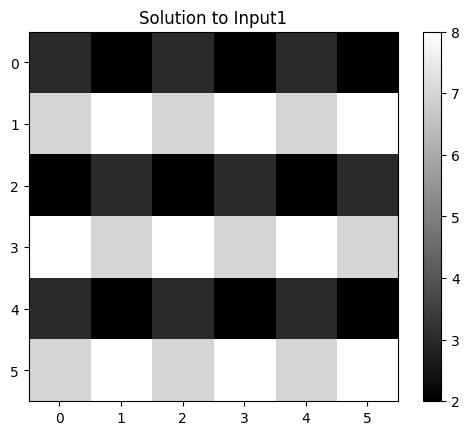

In [27]:
import matplotlib.pyplot as plt

# Visualize the parsed matrix
if 'solution_to_input1_matrix' in locals():
    plt.imshow(solution_to_input1_matrix, cmap='gray')
    plt.title("Solution to Input1")
    plt.colorbar()
    plt.show()
else:
    print("Matrix not available for visualization.")


In [28]:
# Access the ground truth for the first entry
ground_truth = data[0]['ground_truth']  # Replace `0` with the desired index

# Check its type and contents
print(f"Type of 'ground_truth': {type(ground_truth)}")
print(f"Contents of 'ground_truth': {ground_truth}")


Type of 'ground_truth': <class 'list'>
Contents of 'ground_truth': [[3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8], [2, 3, 2, 3, 2, 3], [8, 7, 8, 7, 8, 7], [3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8]]


In [29]:
import numpy as np

# Convert ground truth to a numpy array
ground_truth_array = np.array(ground_truth)

# Check the converted array's properties
print("Ground Truth Array:")
print(ground_truth_array)
print("Shape:", ground_truth_array.shape)
print("Data Type:", ground_truth_array.dtype)


Ground Truth Array:
[[3 2 3 2 3 2]
 [7 8 7 8 7 8]
 [2 3 2 3 2 3]
 [8 7 8 7 8 7]
 [3 2 3 2 3 2]
 [7 8 7 8 7 8]]
Shape: (6, 6)
Data Type: int64


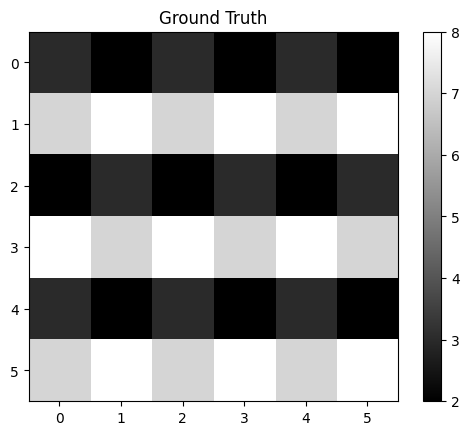

In [30]:
import matplotlib.pyplot as plt

# Visualize the ground truth matrix
plt.imshow(ground_truth_array, cmap='gray')
plt.title("Ground Truth")
plt.colorbar()
plt.show()


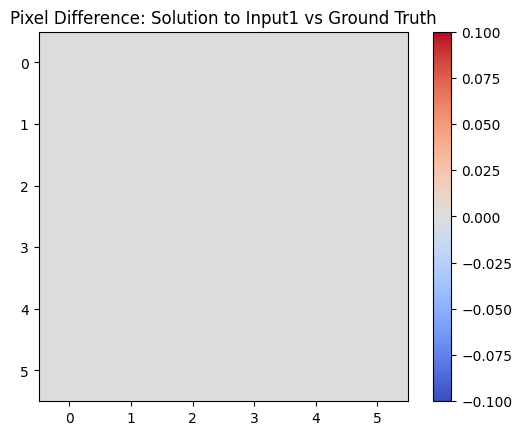

In [31]:
# Calculate pixel-wise difference
pixel_difference = solution_to_input1_matrix - ground_truth_array

# Visualize the difference
plt.imshow(pixel_difference, cmap='coolwarm')
plt.title("Pixel Difference: Solution to Input1 vs Ground Truth")
plt.colorbar()
plt.show()


In [32]:
import re
import ast
import numpy as np

def extract_and_parse_solution_to_input1(raw_model_output):
    # Extract the matrix using regex
    match = re.search(r"Solution to input1:\s*(\[\[.*?\]\])", raw_model_output, re.DOTALL)
    if match:
        solution_to_input1_raw = match.group(1)
        try:
            # Parse the matrix string into a numpy array
            return np.array(ast.literal_eval(solution_to_input1_raw), dtype=float)
        except Exception as e:
            print(f"Error parsing 'Solution to input1': {e}")
            return None
    else:
        print("No matrix found after 'Solution to input1'.")
        return None

# Test the function on the first entry
raw_model_output = data[0]['model_output']  # Replace with relevant entry
solution_to_input1_matrix = extract_and_parse_solution_to_input1(raw_model_output)
if solution_to_input1_matrix is not None:
    print("Parsed 'Solution to Input1' Matrix:")
    print(solution_to_input1_matrix)


Parsed 'Solution to Input1' Matrix:
[[3. 2. 3. 2. 3. 2.]
 [7. 8. 7. 8. 7. 8.]
 [2. 3. 2. 3. 2. 3.]
 [8. 7. 8. 7. 8. 7.]
 [3. 2. 3. 2. 3. 2.]
 [7. 8. 7. 8. 7. 8.]]


In [33]:
# Calculate pixel accuracy
if solution_to_input1_matrix is not None:
    matching_pixels = np.sum(solution_to_input1_matrix == ground_truth_array)
    total_pixels = ground_truth_array.size
    pixel_accuracy = (matching_pixels / total_pixels) * 100
    print(f"Pixel Accuracy: {pixel_accuracy:.2f}%")


Pixel Accuracy: 100.00%


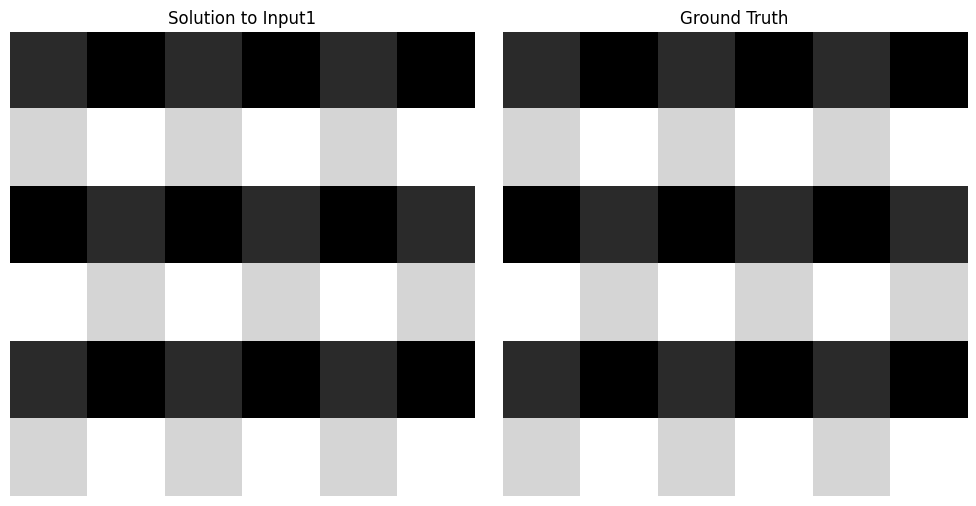

In [34]:
import matplotlib.pyplot as plt

# Visualize 'Solution to Input1' and 'Ground Truth'
def visualize_solution_vs_ground_truth(solution_matrix, ground_truth_matrix):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Solution to Input1
    axs[0].imshow(solution_matrix, cmap='gray')
    axs[0].set_title("Solution to Input1")
    axs[0].axis('off')

    # Ground Truth
    axs[1].imshow(ground_truth_matrix, cmap='gray')
    axs[1].set_title("Ground Truth")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Ensure both matrices are ready for visualization
if solution_to_input1_matrix is not None:
    ground_truth_array = np.array(ground_truth, dtype=float)  # Convert ground_truth to numpy array
    visualize_solution_vs_ground_truth(solution_to_input1_matrix, ground_truth_array)



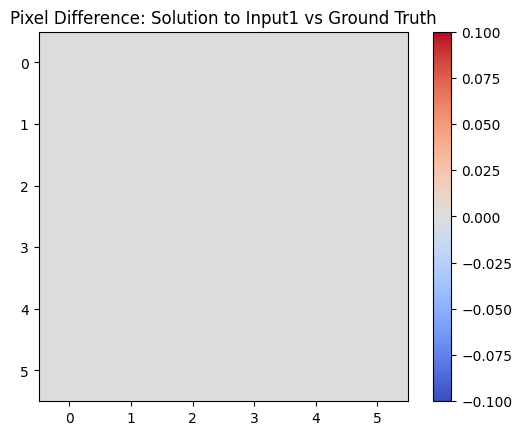

In [35]:
# Calculate pixel-wise difference
if solution_to_input1_matrix is not None:
    pixel_difference = solution_to_input1_matrix - ground_truth_array

    # Visualize pixel-wise differences
    plt.imshow(pixel_difference, cmap='coolwarm')
    plt.title("Pixel Difference: Solution to Input1 vs Ground Truth")
    plt.colorbar()
    plt.show()


In [36]:
for i, entry in enumerate(data[:5]):  # Adjust range as needed
    raw_model_output = entry['model_output']
    ground_truth = entry['ground_truth']
    
    # Extract and parse matrices
    solution_to_input1_matrix = extract_and_parse_solution_to_input1(raw_model_output)
    ground_truth_array = np.array(ground_truth, dtype=float)
    
    # Check for shape mismatch
    if solution_to_input1_matrix is not None and solution_to_input1_matrix.shape != ground_truth_array.shape:
        print(f"Entry {i+1}: Shape mismatch - Solution to Input1: {solution_to_input1_matrix.shape}, Ground Truth: {ground_truth_array.shape}")
        continue  # Skip this entry

    # Calculate pixel accuracy if shapes match
    matching_pixels = np.sum(solution_to_input1_matrix == ground_truth_array)
    total_pixels = ground_truth_array.size
    pixel_accuracy = (matching_pixels / total_pixels) * 100
    print(f"Entry {i+1}: Pixel Accuracy: {pixel_accuracy:.2f}%")



Entry 1: Pixel Accuracy: 100.00%
Entry 2: Pixel Accuracy: 73.00%
Entry 3: Pixel Accuracy: 75.31%
Entry 4: Shape mismatch - Solution to Input1: (3, 7), Ground Truth: (9, 3)
Entry 5: Shape mismatch - Solution to Input1: (5, 5), Ground Truth: (6, 6)


In [37]:
# Log entries with mismatched shapes
mismatched_entries = []

for i, entry in enumerate(data):
    raw_model_output = entry['model_output']
    ground_truth = entry['ground_truth']
    
    solution_to_input1_matrix = extract_and_parse_solution_to_input1(raw_model_output)
    ground_truth_array = np.array(ground_truth, dtype=float)

    # Check for shape mismatch
    if solution_to_input1_matrix is not None and solution_to_input1_matrix.shape != ground_truth_array.shape:
        mismatched_entries.append({
            'entry_index': i,
            'solution_shape': solution_to_input1_matrix.shape,
            'ground_truth_shape': ground_truth_array.shape
        })

# Print mismatched entries
print("Mismatched Entries:")
for mismatch in mismatched_entries:
    print(f"Entry {mismatch['entry_index']}: Solution Shape = {mismatch['solution_shape']}, Ground Truth Shape = {mismatch['ground_truth_shape']}")


Error parsing 'Solution to input1': setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
Mismatched Entries:
Entry 3: Solution Shape = (3, 7), Ground Truth Shape = (9, 3)
Entry 4: Solution Shape = (5, 5), Ground Truth Shape = (6, 6)
Entry 9: Solution Shape = (11, 3), Ground Truth Shape = (3, 12)
Entry 11: Solution Shape = (5, 5), Ground Truth Shape = (19, 7)
Entry 14: Solution Shape = (9, 9), Ground Truth Shape = (3, 9)
Entry 19: Solution Shape = (5, 5), Ground Truth Shape = (10, 10)
Entry 24: Solution Shape = (10, 10), Ground Truth Shape = (17, 17)
Entry 25: Solution Shape = (4, 5), Ground Truth Shape = (3, 5)
Entry 31: Solution Shape = (9, 9), Ground Truth Shape = (7, 9)
Entry 37: Solution Shape = (4, 4), Ground Truth Shape = (5, 4)
Entry 43: Solution Shape = (11, 12), Ground Truth Shape = (9, 15)
Entry 46: Solution Shape = (9, 9), Ground Truth Shape = (3, 6)
Entry 51: Solution S

In [38]:
def calculate_pixel_accuracy(solution, ground_truth):
    """Calculate pixel accuracy between two matrices."""
    matching_pixels = np.sum(solution == ground_truth)
    total_pixels = ground_truth.size
    return (matching_pixels / total_pixels) * 100


In [39]:
close_to_perfect_predictions = []

for i, entry in enumerate(data):
    raw_model_output = entry['model_output']
    ground_truth = np.array(entry['ground_truth'])  # Convert ground_truth to numpy array

    # Extract and parse Solution to Input1
    solution = extract_and_parse_solution_to_input1(raw_model_output)

    # Skip entries with mismatched dimensions
    if solution is None or solution.shape != ground_truth.shape:
        continue

    # Calculate pixel accuracy
    pixel_accuracy = calculate_pixel_accuracy(solution, ground_truth)

    # Check if pixel accuracy is close to 100%
    if pixel_accuracy >= 90:  # Define your threshold
        close_to_perfect_predictions.append({
            'entry_index': i,
            'pixel_accuracy': pixel_accuracy,
            'solution': solution,
            'ground_truth': ground_truth
        })

# Display results
print(f"Entries with Pixel Accuracy >= 90%: {len(close_to_perfect_predictions)}")
for entry in close_to_perfect_predictions:
    print(f"Entry {entry['entry_index']}: Pixel Accuracy = {entry['pixel_accuracy']:.2f}%")


Error parsing 'Solution to input1': setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
Entries with Pixel Accuracy >= 90%: 24
Entry 0: Pixel Accuracy = 100.00%
Entry 17: Pixel Accuracy = 100.00%
Entry 18: Pixel Accuracy = 100.00%
Entry 26: Pixel Accuracy = 97.53%
Entry 35: Pixel Accuracy = 90.00%
Entry 36: Pixel Accuracy = 100.00%
Entry 38: Pixel Accuracy = 92.00%
Entry 39: Pixel Accuracy = 100.00%
Entry 55: Pixel Accuracy = 97.00%
Entry 67: Pixel Accuracy = 100.00%
Entry 79: Pixel Accuracy = 100.00%
Entry 82: Pixel Accuracy = 91.67%
Entry 119: Pixel Accuracy = 95.00%
Entry 123: Pixel Accuracy = 100.00%
Entry 131: Pixel Accuracy = 100.00%
Entry 132: Pixel Accuracy = 96.30%
Entry 141: Pixel Accuracy = 100.00%
Entry 142: Pixel Accuracy = 92.00%
Entry 153: Pixel Accuracy = 100.00%
Entry 155: Pixel Accuracy = 90.48%
Entry 158: Pixel Accuracy = 91.84%
Entry 162: Pixel Accuracy = 95.87

In [40]:
def visualize_prediction_vs_ground_truth(entry, colormap='magma'):
    """
    Visualizes the Model Prediction and Ground Truth side-by-side using a consistent aesthetic colormap.
    """
    solution = entry['solution']
    ground_truth = entry['ground_truth']
    pixel_accuracy = entry['pixel_accuracy']


    plt.figure(figsize=(12, 6))
    
    # Model Prediction
    plt.subplot(1, 2, 1)
    plt.imshow(solution, cmap=colormap)  # Use chosen colormap
    plt.title(f"Model Prediction\nAccuracy: {pixel_accuracy:.2f}%", fontsize=14)
    plt.axis('off')

    # Ground Truth
    plt.subplot(1, 2, 2)
    plt.imshow(ground_truth, cmap=colormap)  # Same colormap for consistency
    plt.title("Ground Truth", fontsize=14)
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [41]:
def visualize_pixel_difference(solution, ground_truth):
    pixel_difference = solution - ground_truth

    plt.figure(figsize=(6, 5))
    plt.imshow(pixel_difference, cmap='coolwarm')  # Contrast for differences
    plt.title("Pixel Difference\n(Model Prediction vs Ground Truth)", fontsize=12)
    plt.colorbar(label="Difference Value")
    plt.show()


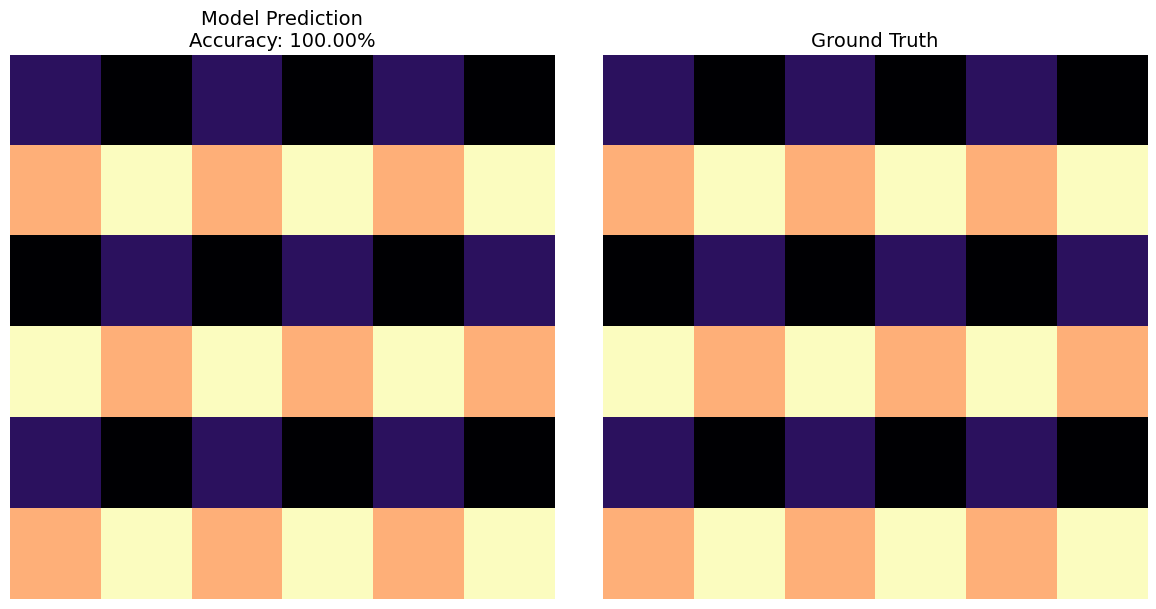

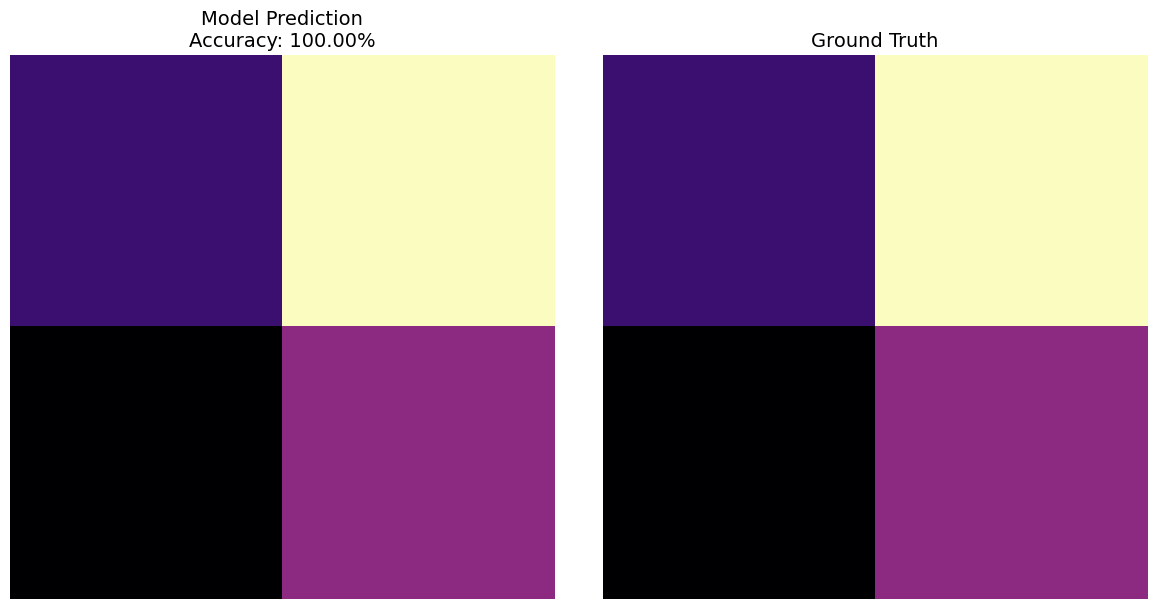

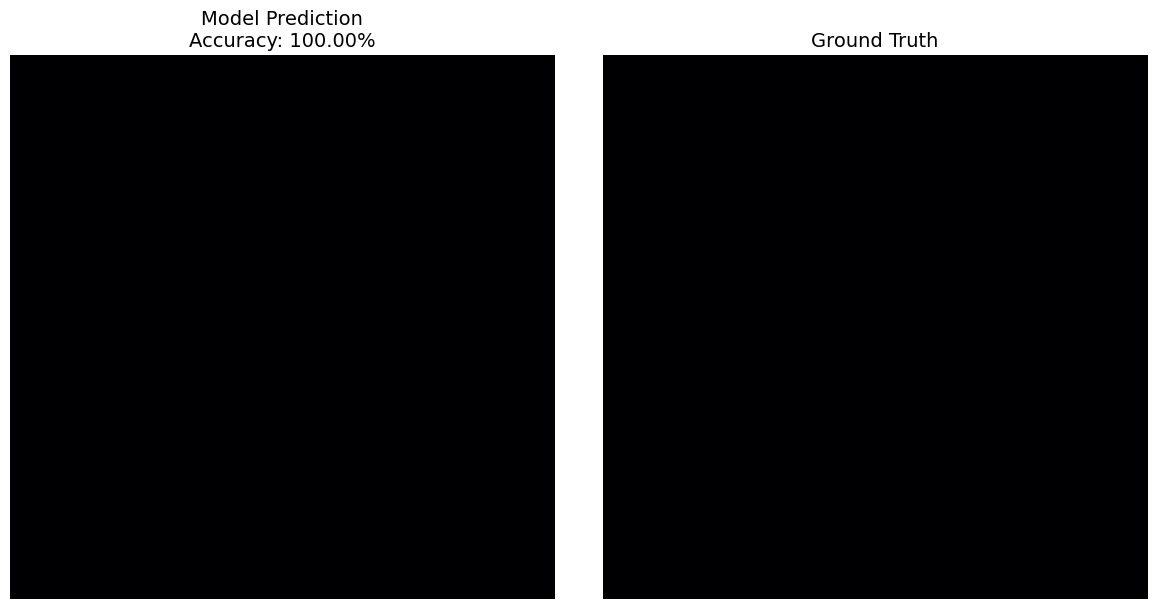

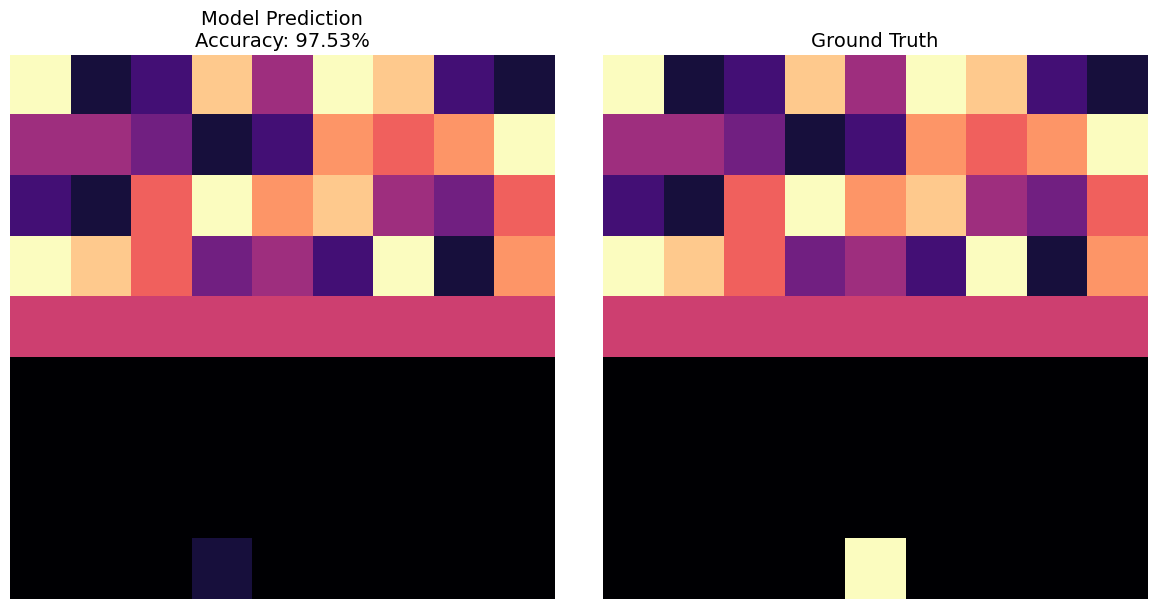

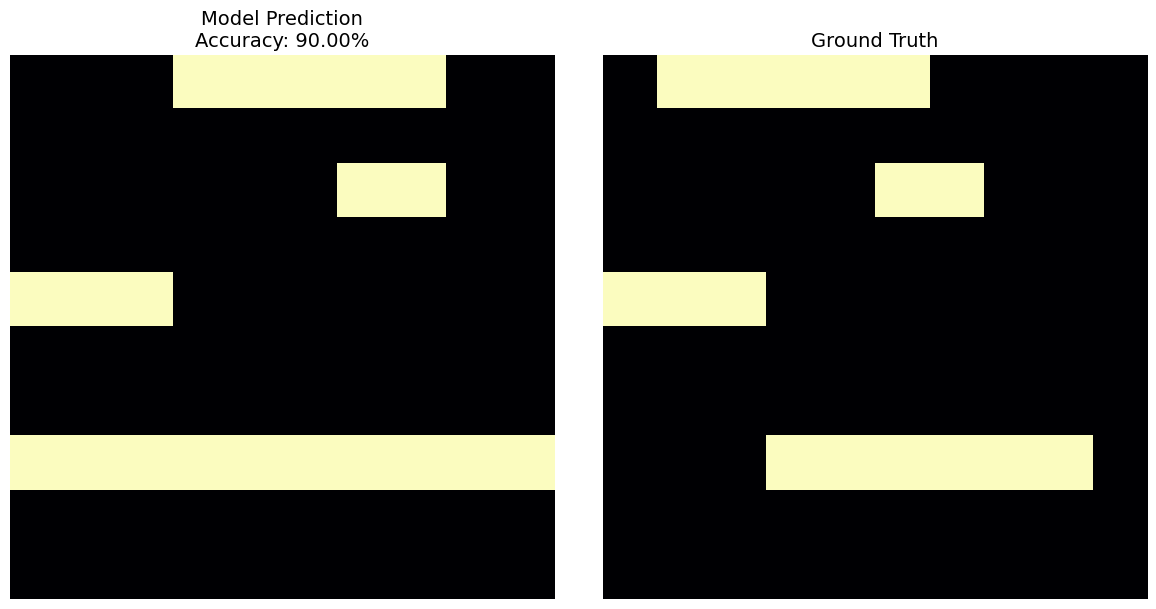

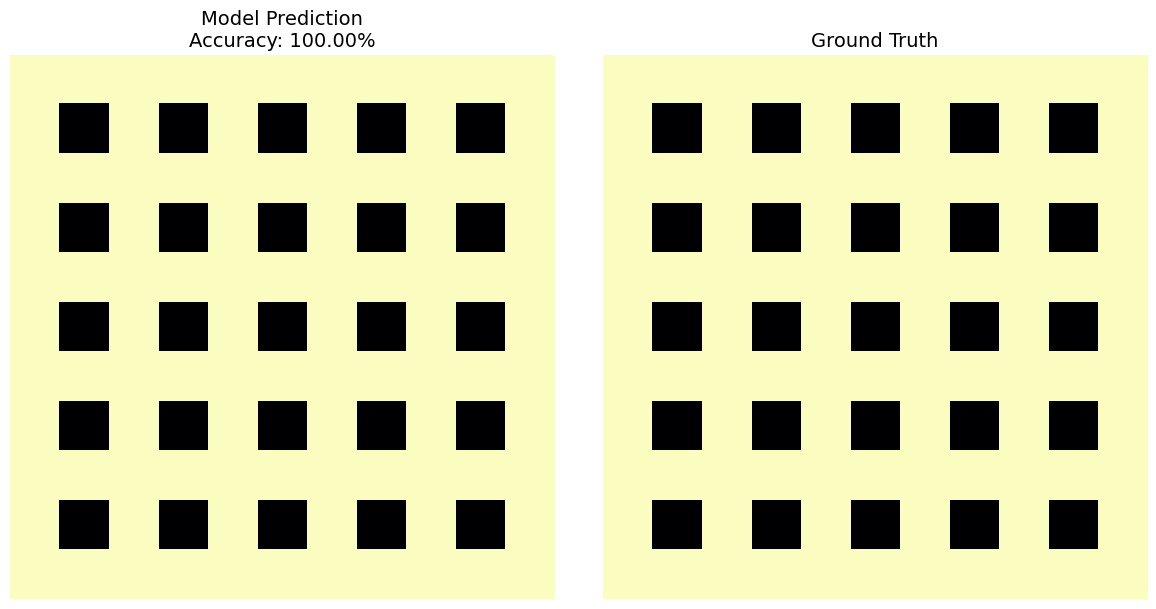

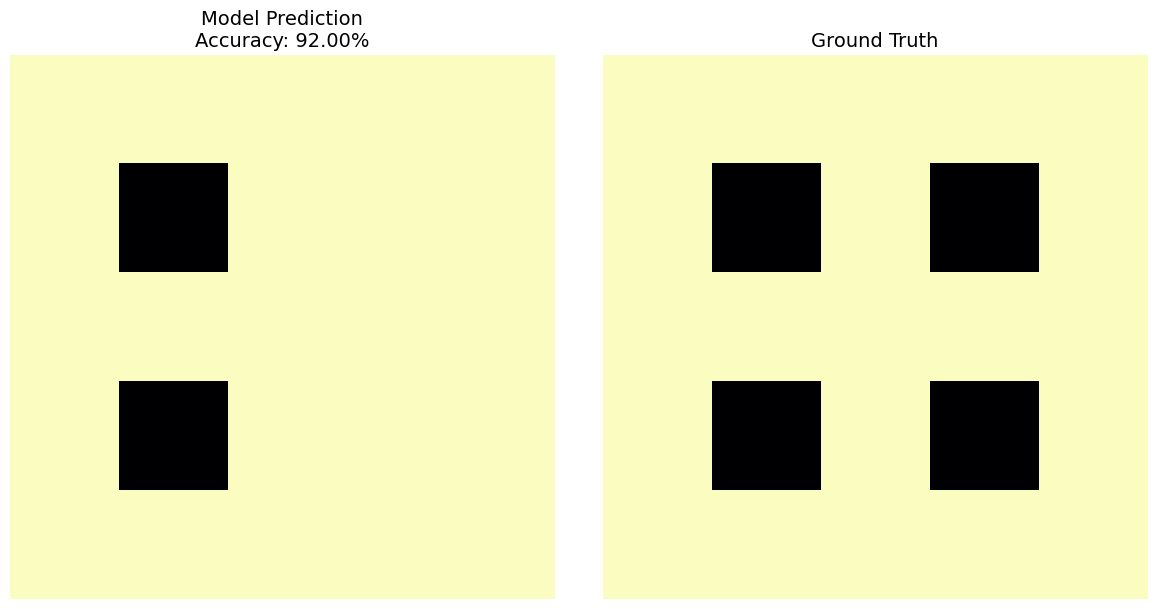

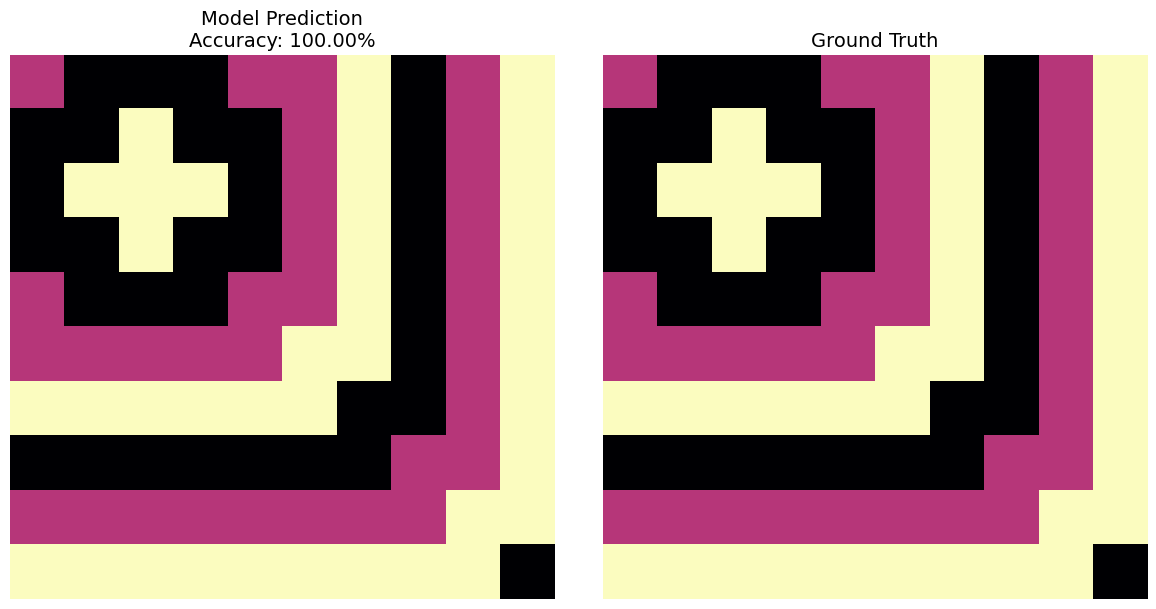

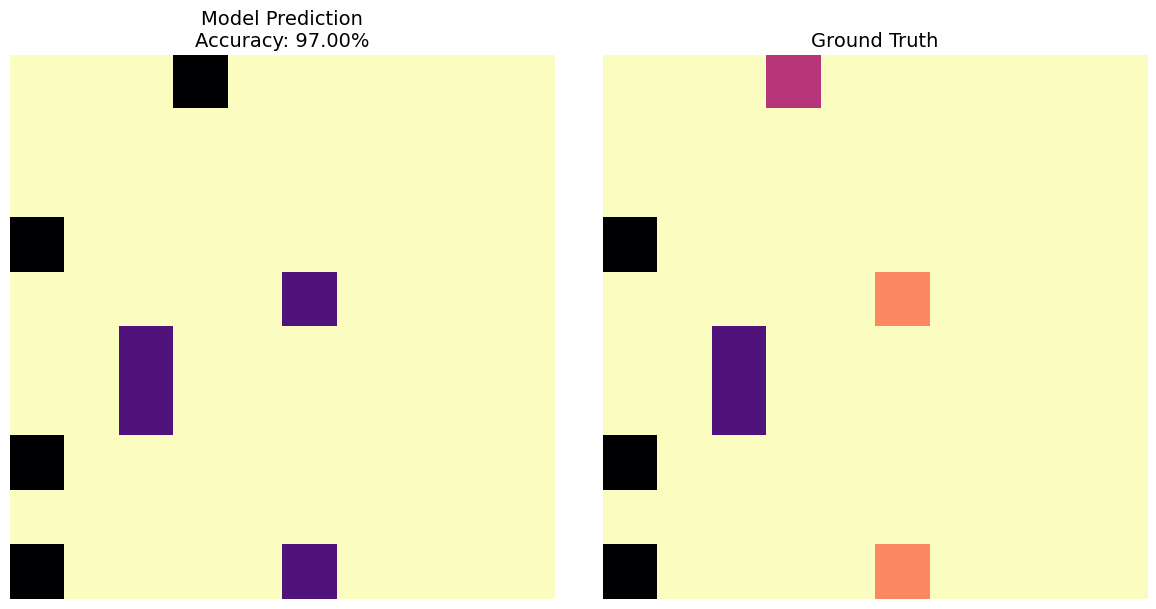

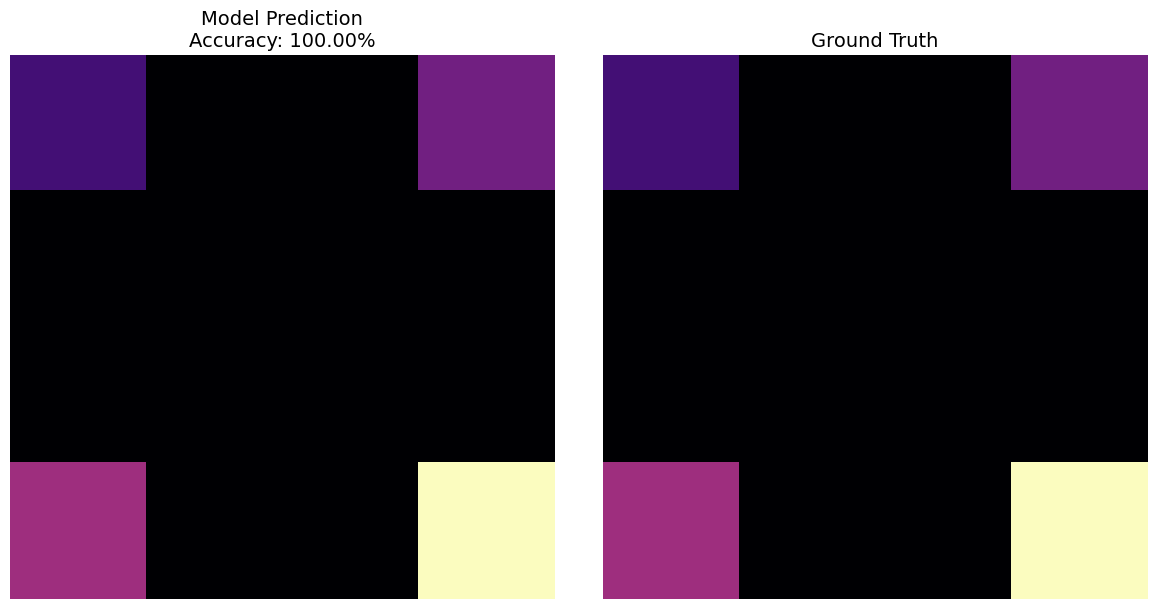

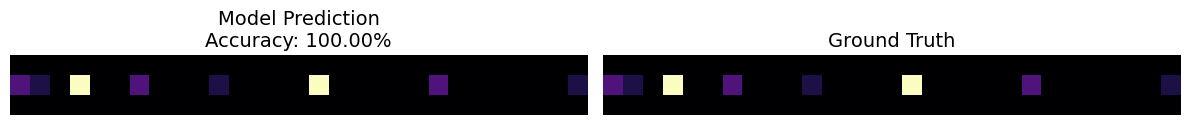

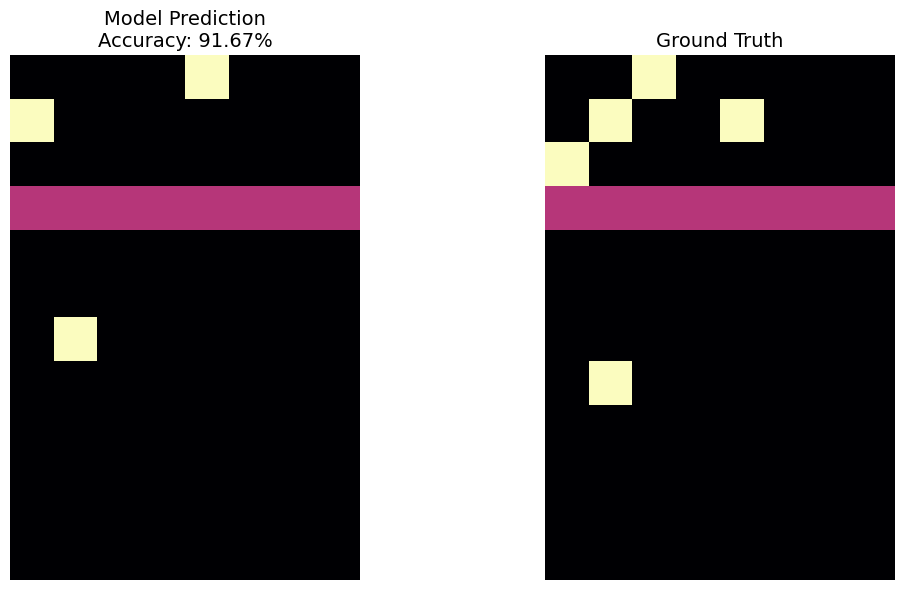

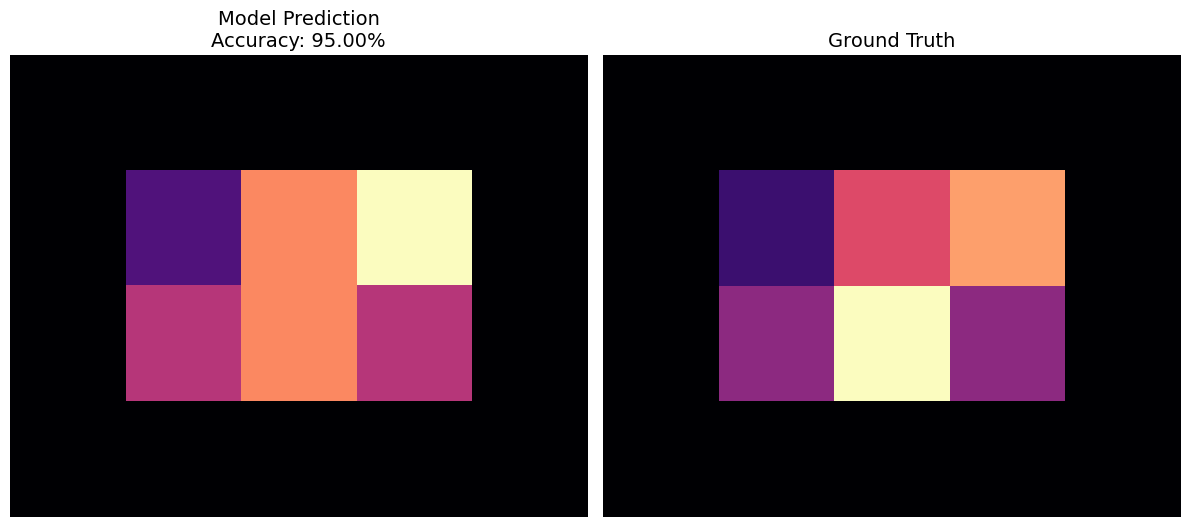

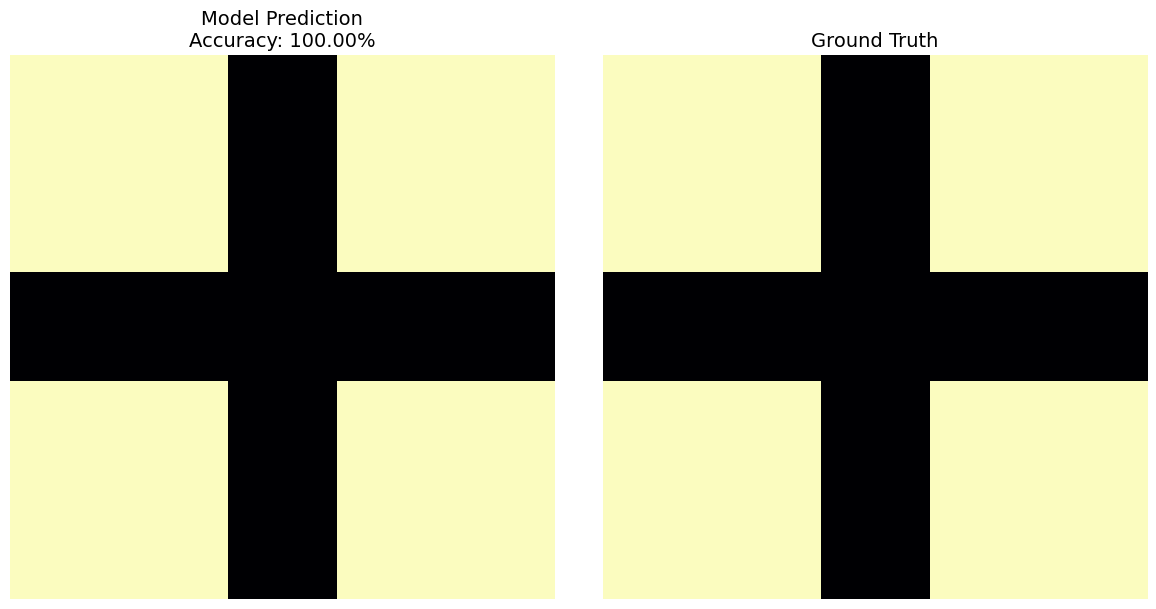

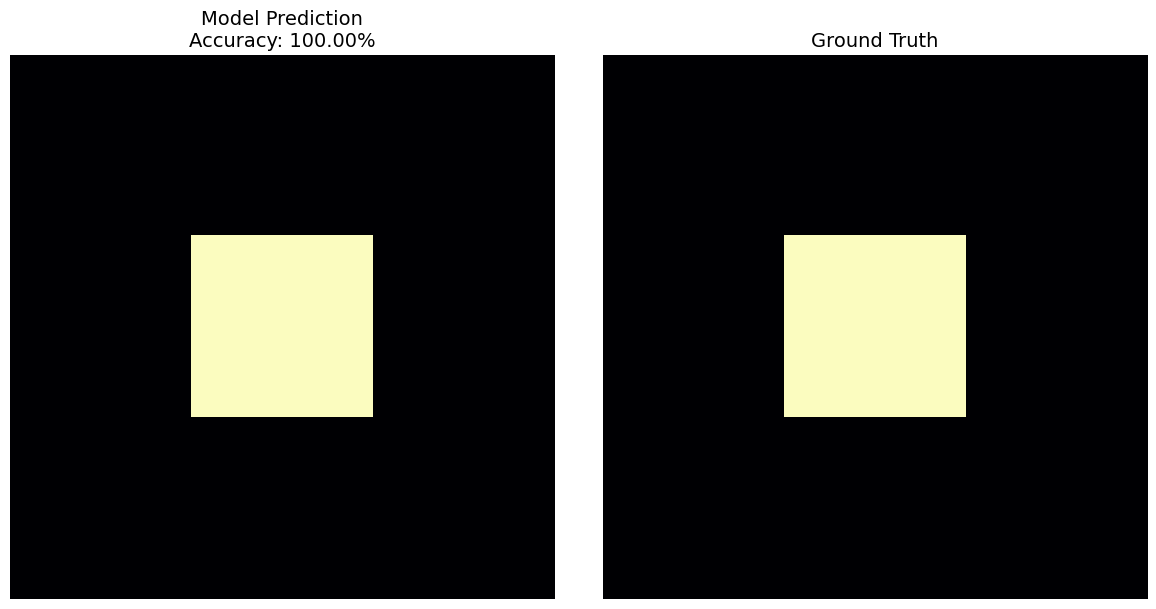

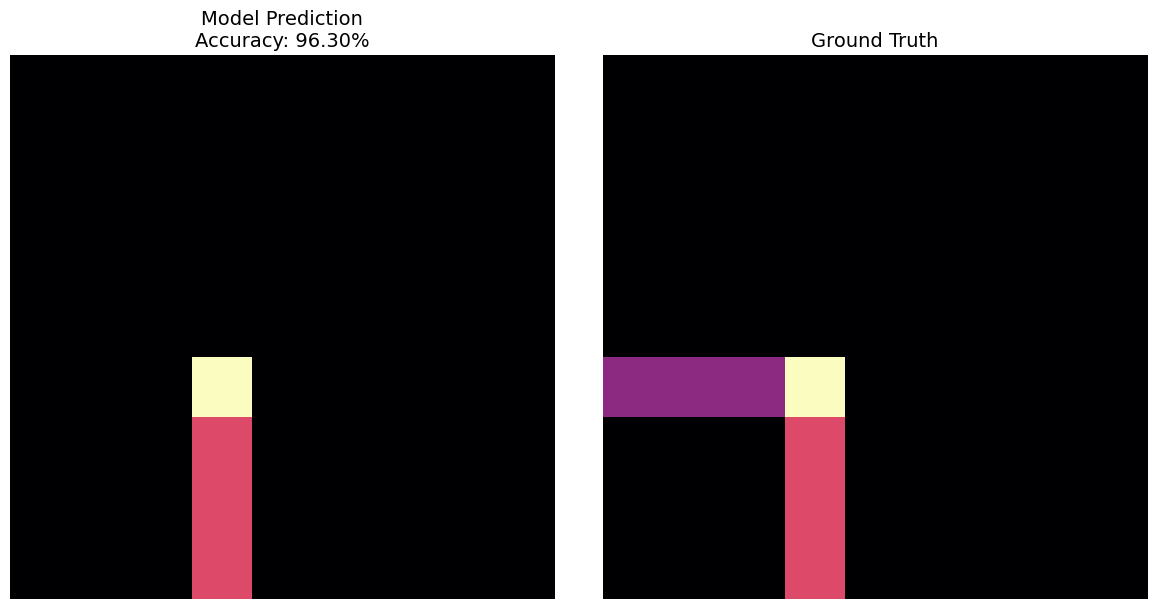

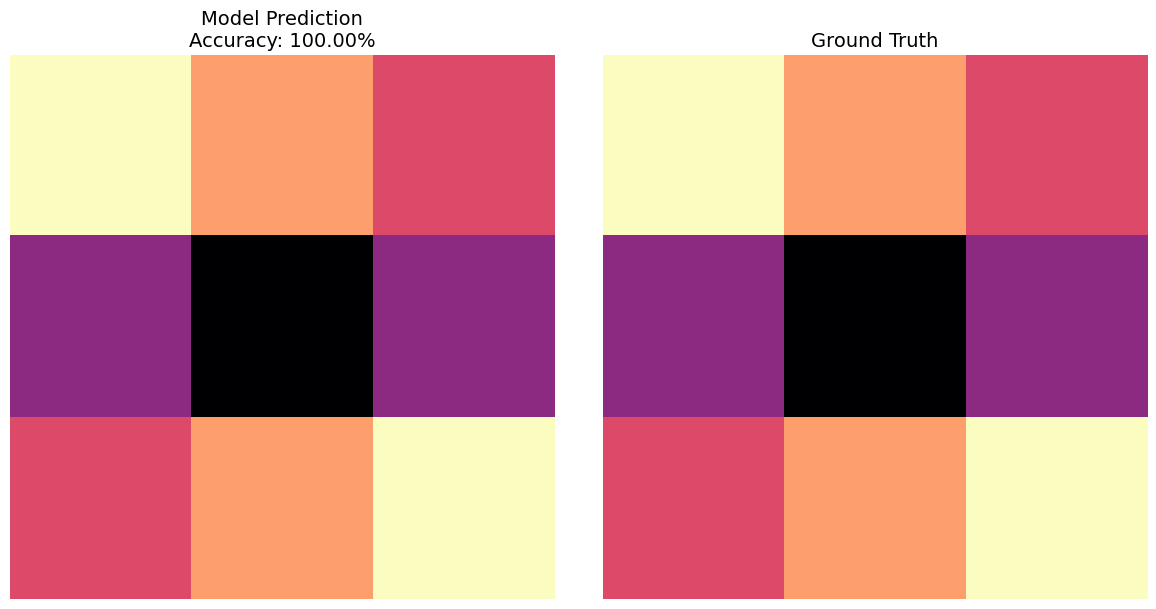

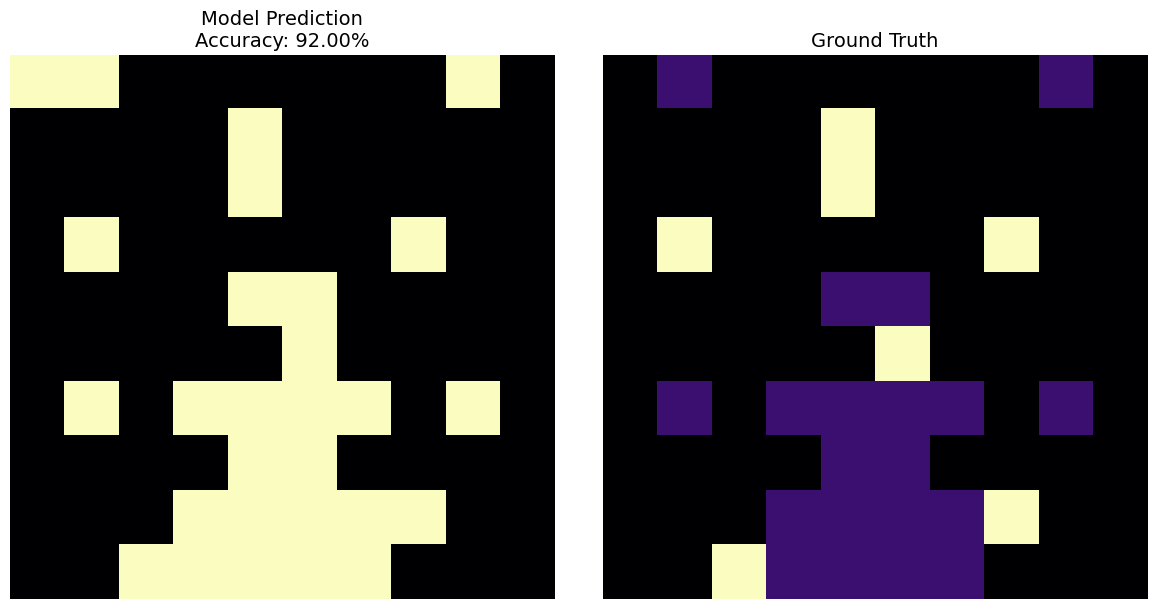

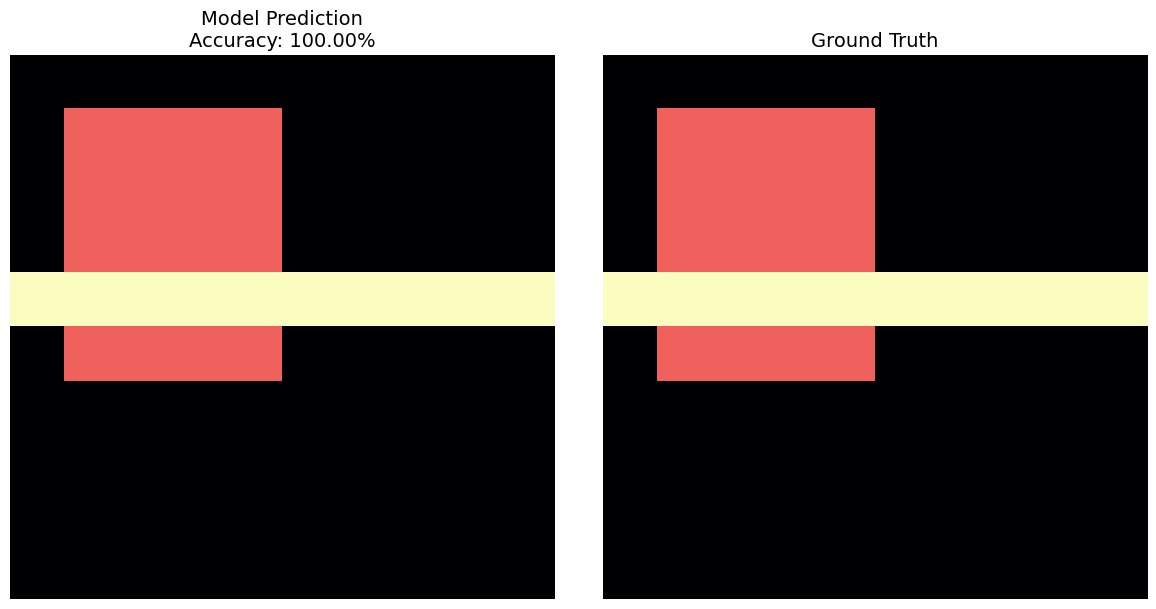

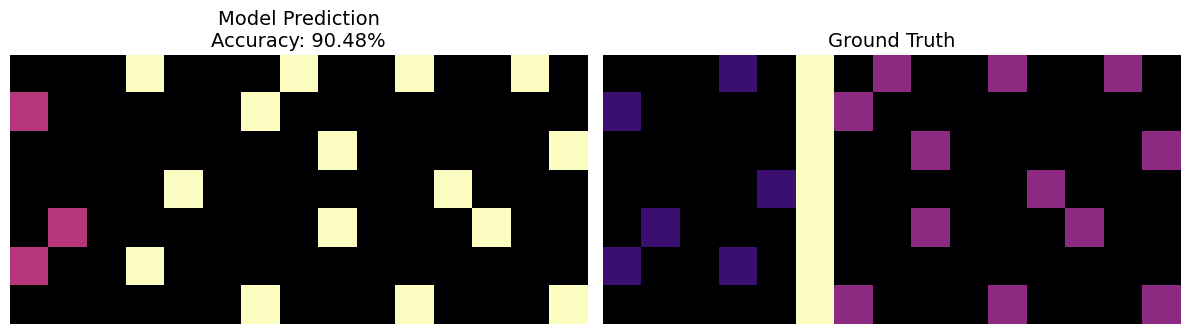

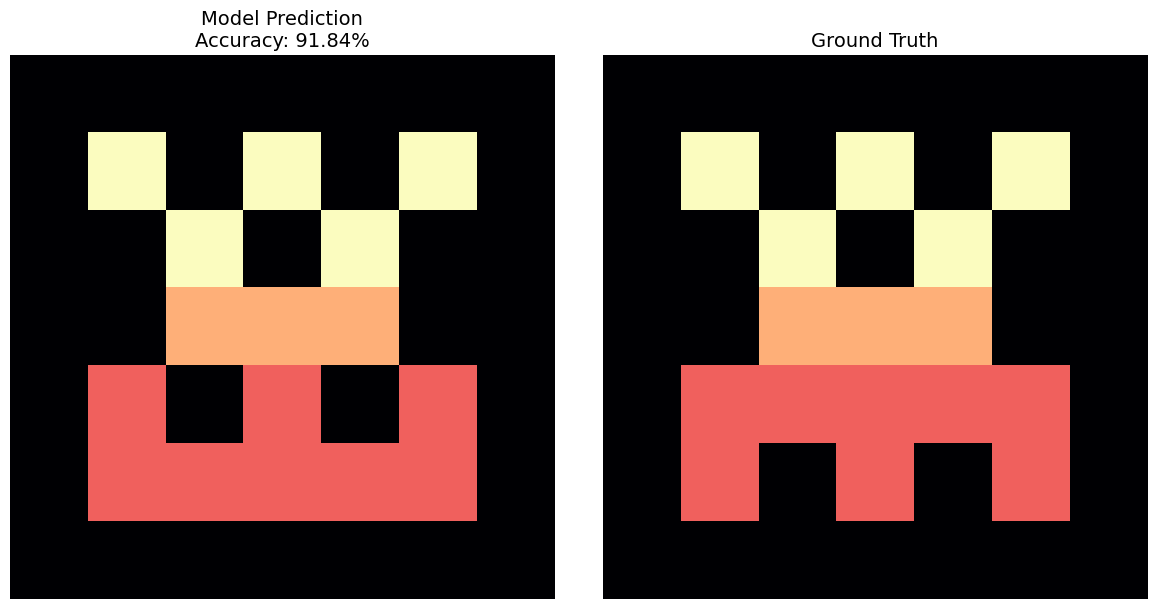

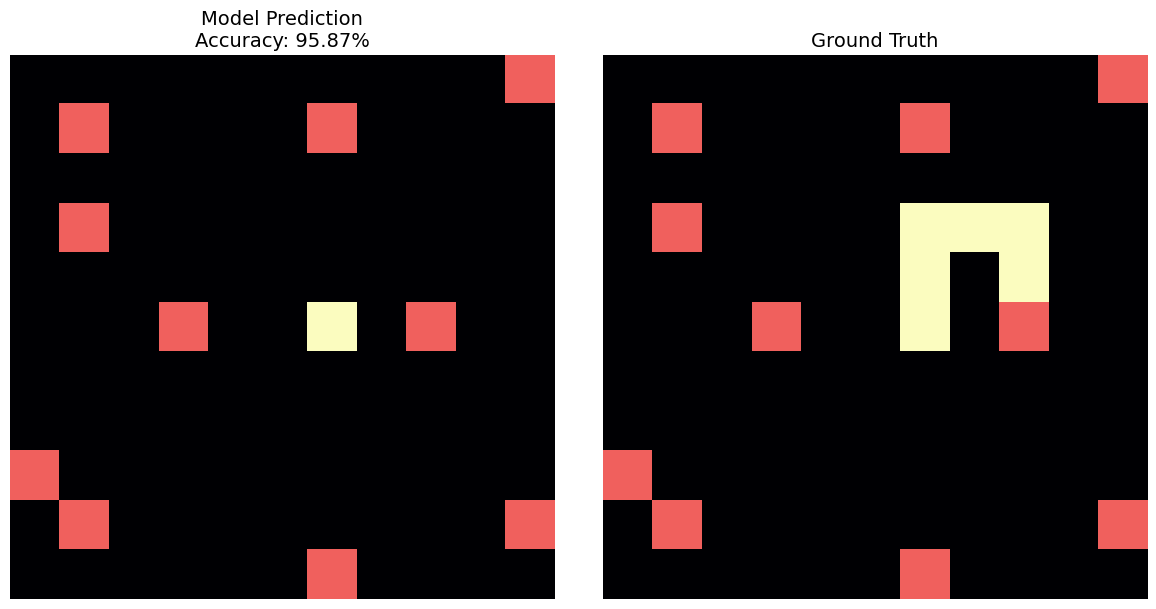

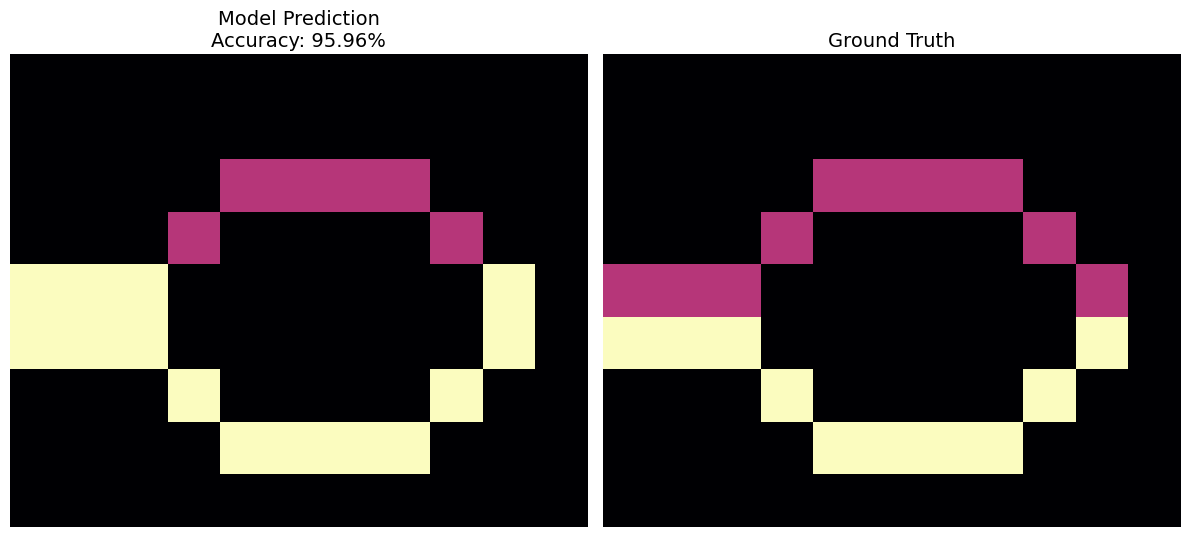

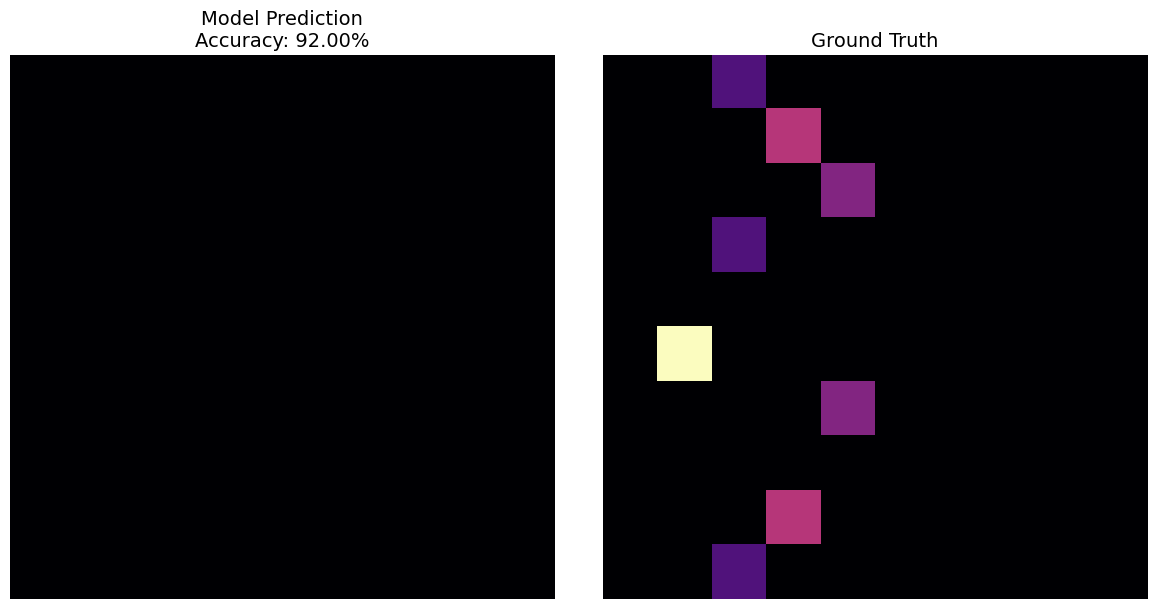

In [42]:
# Visualize the first 3 close-to-perfect predictions
for entry in close_to_perfect_predictions[:]:  # Adjust range as needed
    visualize_prediction_vs_ground_truth(entry)


In [43]:
def extract_reasoning_after_test_input(raw_model_output):
    # Match the reasoning that follows 'Test Input'
    match = re.search(r"Test Input.*?Reasoning:\s*(.*?)(Solution to input1|Example Input|Example Output|$)", raw_model_output, re.DOTALL)
    if match:
        return match.group(1).strip()
    return "No reasoning found"


In [44]:
predictions_with_reasonings = []

for entry in close_to_perfect_predictions:
    index = entry['entry_index']
    raw_model_output = data[index]['model_output']  # Access raw model output

    # Extract the reasoning
    reasoning = extract_reasoning_after_test_input(raw_model_output)

    # Collect required data
    predictions_with_reasonings.append({
        'entry_index': index,
        'pixel_accuracy': entry['pixel_accuracy'],
        'model_prediction': entry['solution'].tolist(),  # Convert numpy array to list
        'ground_truth': entry['ground_truth'].tolist(),  # Convert numpy array to list
        'reasoning': reasoning
    })


In [45]:
import json

# File path to store the predictions with reasonings
output_file = r'C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json'

# Save to JSON
with open(output_file, 'w') as file:
    json.dump(predictions_with_reasonings, file, indent=4)

print(f"Predictions with reasonings saved to: {output_file}")


Predictions with reasonings saved to: C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json


In [46]:
# Load and verify
with open(output_file, 'r') as file:
    loaded_data = json.load(file)

print("First Entry in the Saved File:")
print(json.dumps(loaded_data[3], indent=4))


First Entry in the Saved File:
{
    "entry_index": 26,
    "pixel_accuracy": 97.53086419753086,
    "model_prediction": [
        [
            9.0,
            1.0,
            2.0,
            8.0,
            4.0,
            9.0,
            8.0,
            2.0,
            1.0
        ],
        [
            4.0,
            4.0,
            3.0,
            1.0,
            2.0,
            7.0,
            6.0,
            7.0,
            9.0
        ],
        [
            2.0,
            1.0,
            6.0,
            9.0,
            7.0,
            8.0,
            4.0,
            3.0,
            6.0
        ],
        [
            9.0,
            8.0,
            6.0,
            3.0,
            4.0,
            2.0,
            9.0,
            1.0,
            7.0
        ],
        [
            5.0,
            5.0,
            5.0,
            5.0,
            5.0,
            5.0,
            5.0,
            5.0,
            5.0
        ],
        [
  

In [47]:
low_accuracy_predictions = []

for i, entry in enumerate(data):
    raw_model_output = entry['model_output']
    ground_truth = np.array(entry['ground_truth'])  # Convert ground_truth to numpy array

    # Extract and parse Solution to Input1
    solution = extract_and_parse_solution_to_input1(raw_model_output)

    # Skip entries with mismatched dimensions
    if solution is None or solution.shape != ground_truth.shape:
        continue

    # Calculate pixel accuracy
    pixel_accuracy = calculate_pixel_accuracy(solution, ground_truth)

    # Check if pixel accuracy is greater than 0 but less than 50%
    if 0 < pixel_accuracy < 50:
        low_accuracy_predictions.append({
            'entry_index': i,
            'pixel_accuracy': pixel_accuracy,
            'model_prediction': solution.tolist(),  # Convert numpy array to list
            'ground_truth': ground_truth.tolist(),  # Convert numpy array to list
            'reasoning': extract_reasoning_after_test_input(raw_model_output)  # Extract reasoning
        })

# Display results
print(f"Entries with Pixel Accuracy > 0% and < 50%: {len(low_accuracy_predictions)}")
for entry in low_accuracy_predictions[:5]:  # Display first 5 entries for verification
    print(f"Entry {entry['entry_index']}: Pixel Accuracy = {entry['pixel_accuracy']:.2f}%")


Error parsing 'Solution to input1': setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
Entries with Pixel Accuracy > 0% and < 50%: 20
Entry 13: Pixel Accuracy = 33.33%
Entry 16: Pixel Accuracy = 22.45%
Entry 27: Pixel Accuracy = 22.22%
Entry 28: Pixel Accuracy = 18.75%
Entry 42: Pixel Accuracy = 6.12%


In [48]:
# File path to store the low-accuracy predictions
output_file = r'C:\Users\U10093022\OneDrive - BASF\Desktop\low_accuracy_predictions_with_reasonings.json'

# Save to JSON
with open(output_file, 'w') as file:
    json.dump(low_accuracy_predictions, file, indent=4)

print(f"Low-accuracy predictions saved to: {output_file}")


Low-accuracy predictions saved to: C:\Users\U10093022\OneDrive - BASF\Desktop\low_accuracy_predictions_with_reasonings.json


In [49]:
# Load and verify
with open(output_file, 'r') as file:
    loaded_data = json.load(file)

print("First Entry in the Saved File:")
print(json.dumps(loaded_data[0], indent=4))


First Entry in the Saved File:
{
    "entry_index": 13,
    "pixel_accuracy": 33.33333333333333,
    "model_prediction": [
        [
            6.0,
            6.0,
            3.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0
        ],
        [
            4.0,
            4.0,
            3.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0
        ],
        [
            4.0,
            4.0,
            3.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0
        ],
        [
            6.0,
            6.0,
            3.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0
        ],
        [
            4.0,
            4.0,
            3.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0,
            0.0
        ],
        [
  

In [50]:
import numpy as np

def calculate_pixel_accuracy(solution, ground_truth):
    """
    Calculate the pixel accuracy between the solution and ground truth matrices.
    """
    matching_pixels = np.sum(solution == ground_truth)
    total_pixels = ground_truth.size
    return (matching_pixels / total_pixels) * 100


In [51]:
import numpy as np
pixel_accuracies = []
mismatched_entries = []

for i, entry in enumerate(data):
    raw_model_output = entry['model_output']
    ground_truth = np.array(entry['ground_truth'])  # Convert ground_truth to numpy array

    # Extract and parse the solution
    solution = extract_and_parse_solution_to_input1(raw_model_output)

    # Skip entries with mismatched dimensions
    if solution is None or solution.shape != ground_truth.shape:
        mismatched_entries.append(i)
        continue

    # Calculate pixel accuracy
    accuracy = calculate_pixel_accuracy(solution, ground_truth)
    pixel_accuracies.append({
        'entry_index': i,
        'pixel_accuracy': accuracy
    })

print(f"Pixel accuracies computed for {len(pixel_accuracies)} entries.")
print(f"Entries skipped due to mismatched dimensions: {len(mismatched_entries)}")


Error parsing 'Solution to input1': setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
Pixel accuracies computed for 127 entries.
Entries skipped due to mismatched dimensions: 55


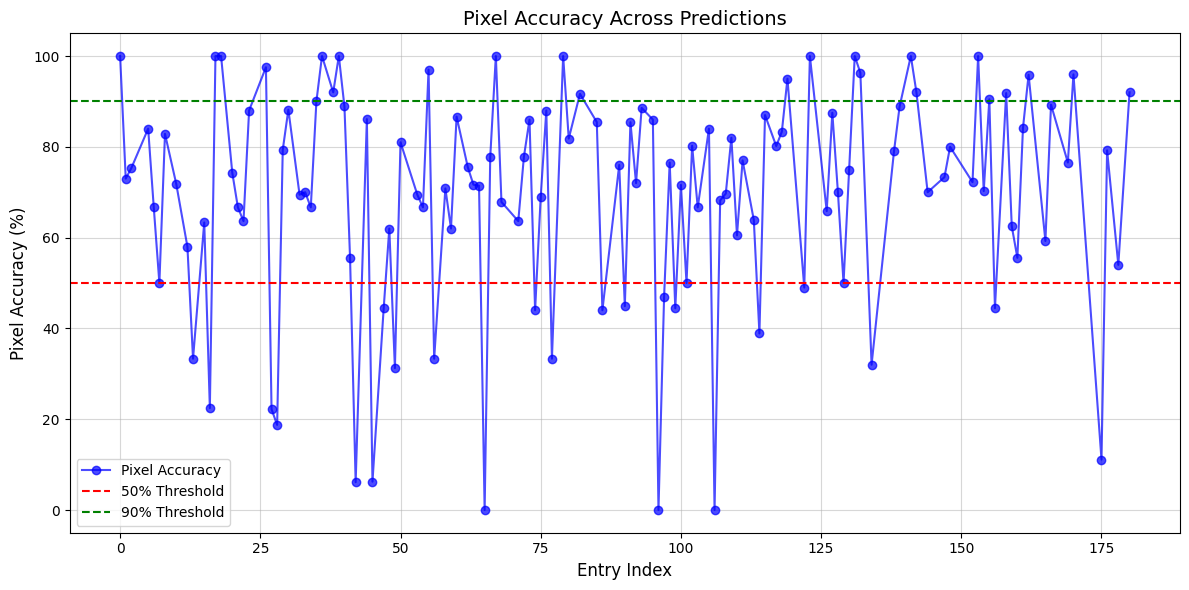

In [52]:
import matplotlib.pyplot as plt

# Extract indices and accuracies
indices = [entry['entry_index'] for entry in pixel_accuracies]
accuracies = [entry['pixel_accuracy'] for entry in pixel_accuracies]

# Plot line graph
plt.figure(figsize=(12, 6))
plt.plot(indices, accuracies, marker='o', linestyle='-', color='blue', alpha=0.7, label='Pixel Accuracy')
plt.axhline(y=50, color='red', linestyle='--', label='50% Threshold')  # Add reference line at 50%
plt.axhline(y=90, color='green', linestyle='--', label='90% Threshold')  # Add reference line at 90%
plt.xlabel('Entry Index', fontsize=12)
plt.ylabel('Pixel Accuracy (%)', fontsize=12)
plt.title('Pixel Accuracy Across Predictions', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



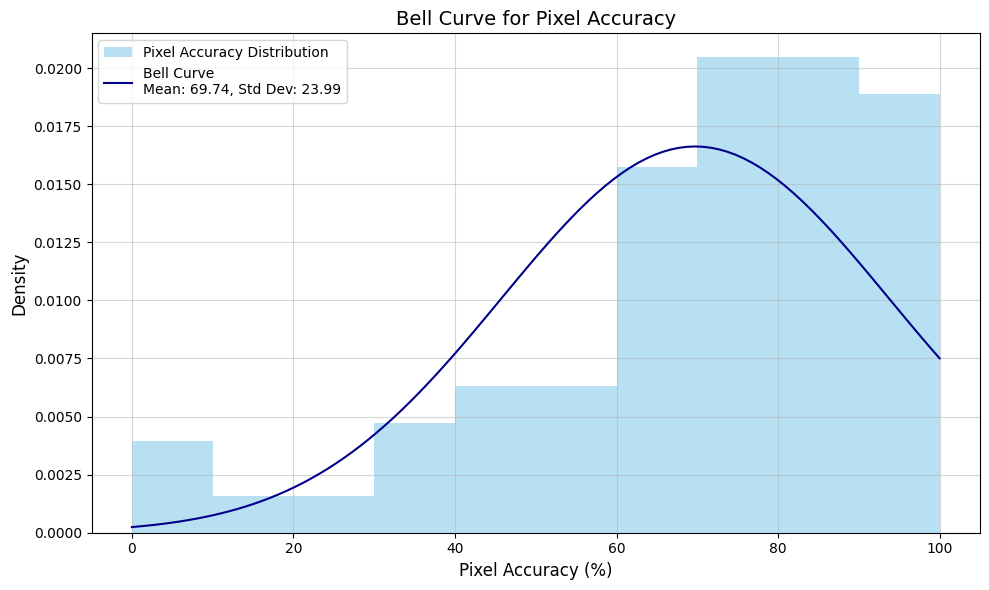

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract pixel accuracies
accuracies = [entry['pixel_accuracy'] for entry in pixel_accuracies]

# Generate data for the bell curve
mean = np.mean(accuracies)  # Mean of the data
std_dev = np.std(accuracies)  # Standard deviation of the data
x = np.linspace(min(accuracies), max(accuracies), 100)  # X-axis range
y = norm.pdf(x, mean, std_dev)  # Probability density function

# Plot the bell curve
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=10, density=True, alpha=0.6, color='skyblue', label='Pixel Accuracy Distribution')
plt.plot(x, y, color='darkblue', label=f'Bell Curve\nMean: {mean:.2f}, Std Dev: {std_dev:.2f}')
plt.title('Bell Curve for Pixel Accuracy', fontsize=14)
plt.xlabel('Pixel Accuracy (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)


plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


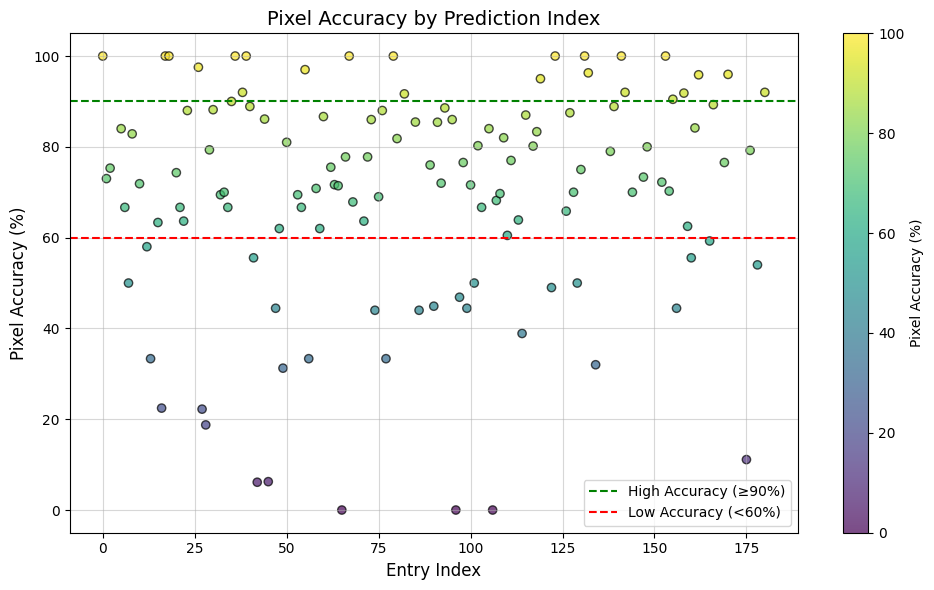

In [54]:
# Scatter plot of pixel accuracy
plt.figure(figsize=(10, 6))
plt.scatter(indices, accuracies, c=accuracies, cmap='viridis', edgecolor='black', alpha=0.7)
plt.colorbar(label='Pixel Accuracy (%)')
plt.axhline(y=90, color='green', linestyle='--', label='High Accuracy (≥90%)')
plt.axhline(y=60, color='red', linestyle='--', label='Low Accuracy (<60%)')
plt.xlabel('Entry Index', fontsize=12)
plt.ylabel('Pixel Accuracy (%)', fontsize=12)
plt.title('Pixel Accuracy by Prediction Index', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Error parsing 'Solution to input1': setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
Computed pixel accuracies for 127 entries.
Entries skipped due to mismatched dimensions: 55


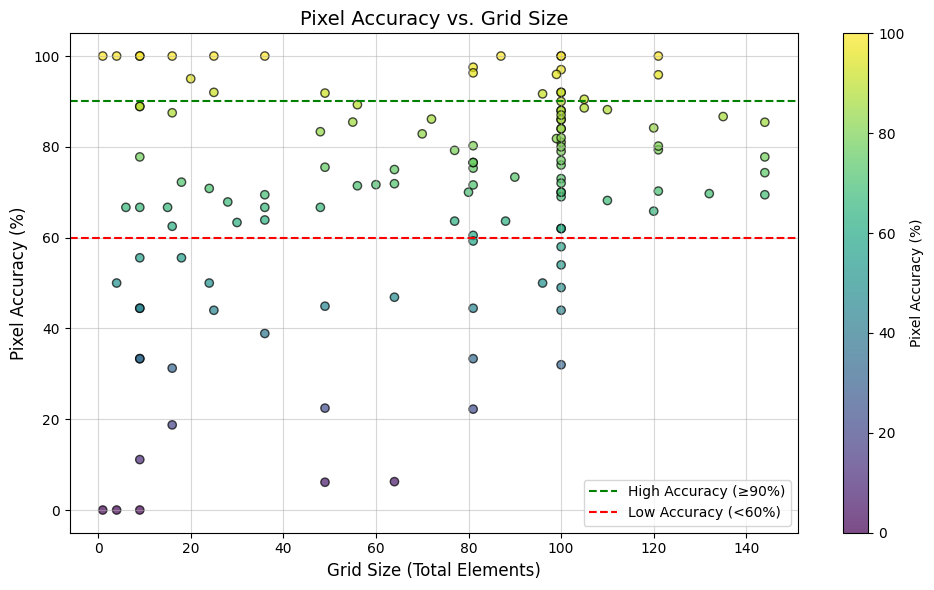

In [63]:
import json
import numpy as np
import ast
import matplotlib.pyplot as plt

# Load JSON file
file_path = r'C:\Users\U10093022\OneDrive - BASF\Desktop\updated_data.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Function to parse 'ground_truth' only if it's a string
def parse_ground_truth(ground_truth):
    if isinstance(ground_truth, str):
        try:
            parsed_matrix = ast.literal_eval(ground_truth)  # Convert string to list
            return np.array(parsed_matrix)  # Convert to NumPy array
        except Exception as e:
            print(f"Error parsing ground_truth: {e}")
            return None  # Return None on failure
    elif isinstance(ground_truth, list):  # If already a list, convert directly
        return np.array(ground_truth)
    else:
        print(f"Unexpected ground_truth format: {type(ground_truth)}")
        return None  # Return None for unexpected types

# Function to calculate pixel accuracy
def calculate_pixel_accuracy(solution, ground_truth):
    matching_pixels = np.sum(solution == ground_truth)
    total_pixels = ground_truth.size
    return (matching_pixels / total_pixels) * 100

# Compute Pixel Accuracy and Grid Sizes
pixel_accuracies = []
mismatched_entries = []

for i, entry in enumerate(data):
    raw_model_output = entry['model_output']
    ground_truth_array = parse_ground_truth(entry['ground_truth'])

    if ground_truth_array is None or ground_truth_array.size == 0:
        continue  # Skip if ground truth parsing failed

    # Extract the solution from model output
    solution = extract_and_parse_solution_to_input1(raw_model_output)

    # Skip mismatched dimensions
    if solution is None or solution.shape != ground_truth_array.shape:
        mismatched_entries.append(i)
        continue

    # Compute pixel accuracy
    accuracy = calculate_pixel_accuracy(solution, ground_truth_array)

    # Compute grid size
    grid_size = ground_truth_array.shape[0] * ground_truth_array.shape[1]

    # Store results
    pixel_accuracies.append({
        'entry_index': i,
        'pixel_accuracy': accuracy,
        'grid_size': grid_size
    })

print(f"Computed pixel accuracies for {len(pixel_accuracies)} entries.")
print(f"Entries skipped due to mismatched dimensions: {len(mismatched_entries)}")

# Extract values for plotting
accuracies = [entry['pixel_accuracy'] for entry in pixel_accuracies]
grid_sizes = [entry['grid_size'] for entry in pixel_accuracies]

# Scatter plot of Pixel Accuracy vs. Grid Size
plt.figure(figsize=(10, 6))
plt.scatter(grid_sizes, accuracies, c=accuracies, cmap='viridis', edgecolor='black', alpha=0.7)
plt.colorbar(label='Pixel Accuracy (%)')
plt.axhline(y=90, color='green', linestyle='--', label='High Accuracy (≥90%)')
plt.axhline(y=60, color='red', linestyle='--', label='Low Accuracy (<60%)')
plt.xlabel('Grid Size (Total Elements)', fontsize=12)
plt.ylabel('Pixel Accuracy (%)', fontsize=12)
plt.title('Pixel Accuracy vs. Grid Size', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [80]:
# Calculate the number of predictions in the range 60-90%
predictions_60_90 = sum(1 for acc in accuracies if 60 <= acc < 90)

# Display the result
print(f"Number of predictions with pixel accuracy between 60% and 90%: {predictions_60_90}")


Number of predictions with pixel accuracy between 60% and 90%: 72


In [81]:
# Calculate the number of predictions in the range 60-90%
predictions_60_90 = sum(1 for acc in accuracies if 60 <= acc < 90)

# Calculate the percentage
percentage_60_90 = (predictions_60_90 / len(accuracies)) * 100

# Display the result
print(f"Percentage of predictions with pixel accuracy between 60% and 90%: {percentage_60_90:.2f}%")


Percentage of predictions with pixel accuracy between 60% and 90%: 56.69%


In [82]:
# Calculate prediction accuracy
total_predictions = len(data)
correct_predictions = 0

for entry in data:
    ground_truth = np.array(entry['ground_truth'])  # Ground truth as numpy array
    solution = extract_and_parse_solution_to_input1(entry['model_output'])  # Extract solution

    # Check if the dimensions match and if the prediction is entirely correct
    if solution is not None and solution.shape == ground_truth.shape and np.array_equal(solution, ground_truth):
        correct_predictions += 1

# Calculate prediction accuracy percentage
prediction_accuracy = (correct_predictions / total_predictions) * 100

# Display the result
print(f"Prediction Accuracy: {prediction_accuracy:.2f}%")


Error parsing 'Solution to input1': setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.
Prediction Accuracy: 6.04%


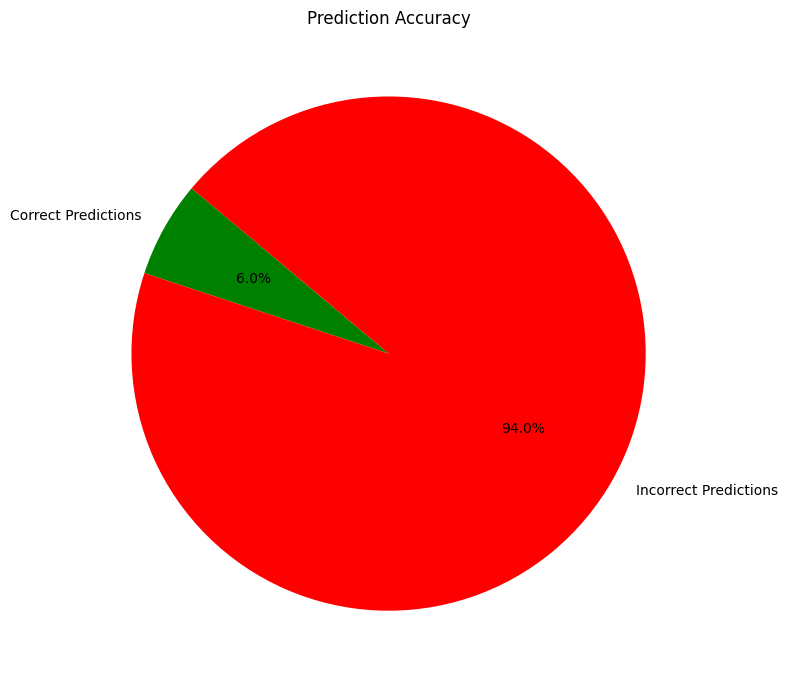

In [83]:
import matplotlib.pyplot as plt

# Data for pie chart
incorrect_predictions = total_predictions - correct_predictions
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_predictions, incorrect_predictions]
colors = ['green', 'red']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Prediction Accuracy')
plt.tight_layout()
plt.show()


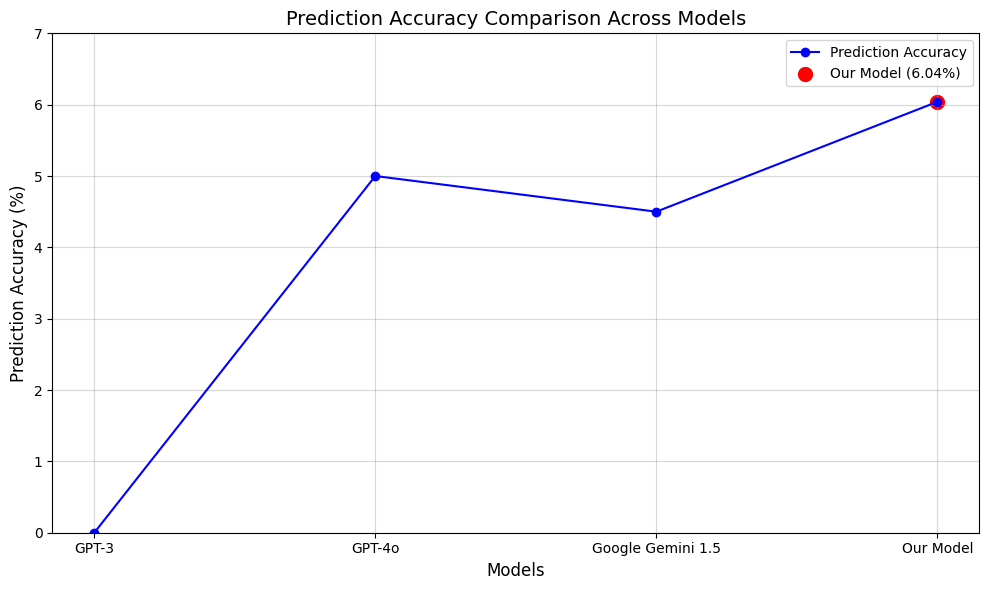

In [86]:
import matplotlib.pyplot as plt

# Data for the line graph
models = ['GPT-3', 'GPT-4o', 'Google Gemini 1.5', 'Our Model']
accuracy = [0, 5, 4.5, 6.04]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', color='blue', label='Prediction Accuracy')

# Highlight our model
our_model_index = models.index('Our Model')
plt.scatter(our_model_index, accuracy[our_model_index], color='red', s=100, label='Our Model (6.04%)')

# Add horizontal reference line for GPT-4o benchmark

# Labels and title
plt.ylim(0, 7)  # Set y-axis range
plt.xlabel('Models', fontsize=12)
plt.ylabel('Prediction Accuracy (%)', fontsize=12)
plt.title('Prediction Accuracy Comparison Across Models', fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


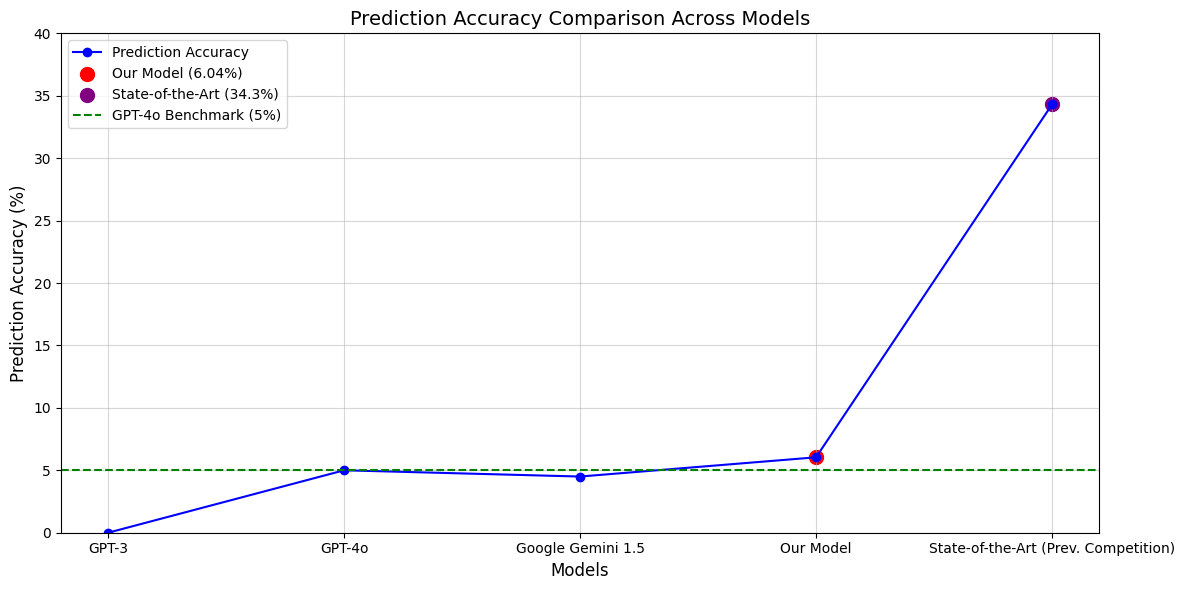

In [87]:
import matplotlib.pyplot as plt

# Data for the line graph
models = ['GPT-3', 'GPT-4o', 'Google Gemini 1.5', 'Our Model', 'State-of-the-Art (Prev. Competition)']
accuracy = [0, 5, 4.5, 6.04, 34.3]

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', color='blue', label='Prediction Accuracy')

# Highlight our model
our_model_index = models.index('Our Model')
plt.scatter(our_model_index, accuracy[our_model_index], color='red', s=100, label='Our Model (6.04%)')

# Highlight the state-of-the-art solution
sota_index = models.index('State-of-the-Art (Prev. Competition)')
plt.scatter(sota_index, accuracy[sota_index], color='purple', s=100, label='State-of-the-Art (34.3%)')

# Add horizontal reference lines
plt.axhline(y=5, color='green', linestyle='--', label='GPT-4o Benchmark (5%)')

# Labels and title
plt.ylim(0, 40)  # Adjust y-axis range to include state-of-the-art
plt.xlabel('Models', fontsize=12)
plt.ylabel('Prediction Accuracy (%)', fontsize=12)
plt.title('Prediction Accuracy Comparison Across Models', fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


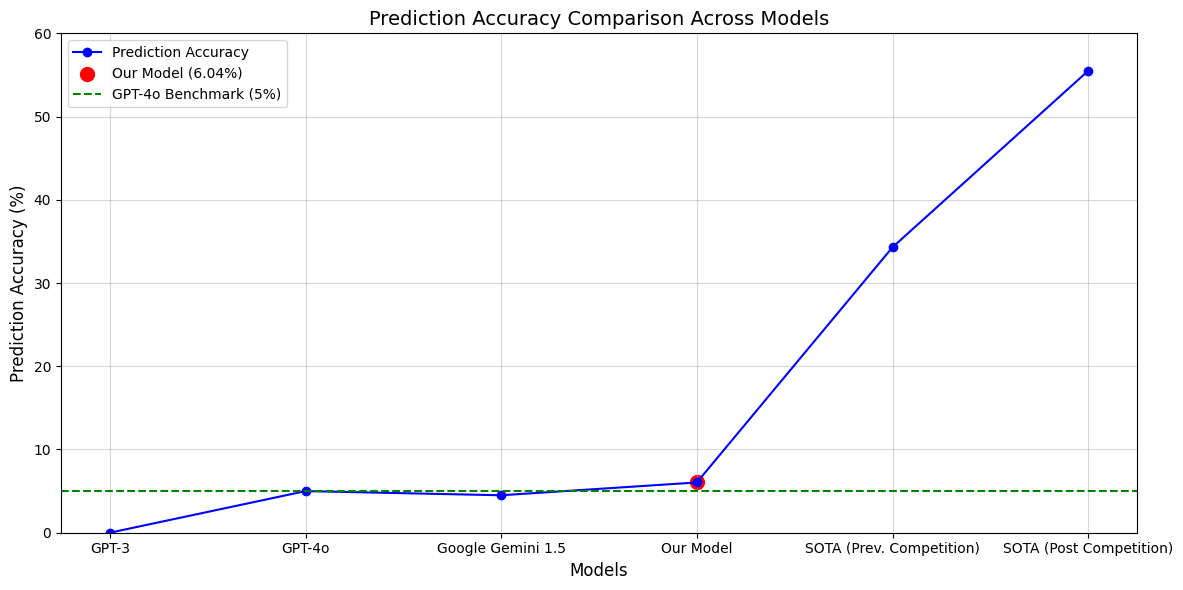

In [90]:
import matplotlib.pyplot as plt

# Data for the line graph
models = [
    'GPT-3',
    'GPT-4o',
    'Google Gemini 1.5',
    'Our Model',
    'SOTA (Prev. Competition)',
    'SOTA (Post Competition)'
]
accuracy = [0, 5, 4.5, 6.04, 34.3, 55.5]

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', color='blue', label='Prediction Accuracy')

# Highlight only our model
our_model_index = models.index('Our Model')
plt.scatter(our_model_index, accuracy[our_model_index], color='red', s=100, label='Our Model (6.04%)')

# Add horizontal reference lines
plt.axhline(y=5, color='green', linestyle='--', label='GPT-4o Benchmark (5%)')

# Labels and title
plt.ylim(0, 60)  # Adjust y-axis range to include post-competition state-of-the-art
plt.xlabel('Models', fontsize=12)
plt.ylabel('Prediction Accuracy (%)', fontsize=12)
plt.title('Prediction Accuracy Comparison Across Models', fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



In [91]:
import json

# File path
file_path = r'C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json'

# Load the file
with open(file_path, 'r') as file:
    good_predictions = json.load(file)

# Display the first entry for inspection
print(json.dumps(good_predictions[0], indent=4))


{
    "entry_index": 0,
    "pixel_accuracy": 100.0,
    "model_prediction": [
        [
            3.0,
            2.0,
            3.0,
            2.0,
            3.0,
            2.0
        ],
        [
            7.0,
            8.0,
            7.0,
            8.0,
            7.0,
            8.0
        ],
        [
            2.0,
            3.0,
            2.0,
            3.0,
            2.0,
            3.0
        ],
        [
            8.0,
            7.0,
            8.0,
            7.0,
            8.0,
            7.0
        ],
        [
            3.0,
            2.0,
            3.0,
            2.0,
            3.0,
            2.0
        ],
        [
            7.0,
            8.0,
            7.0,
            8.0,
            7.0,
            8.0
        ]
    ],
    "ground_truth": [
        [
            3,
            2,
            3,
            2,
            3,
            2
        ],
        [
            7,
            8,
           

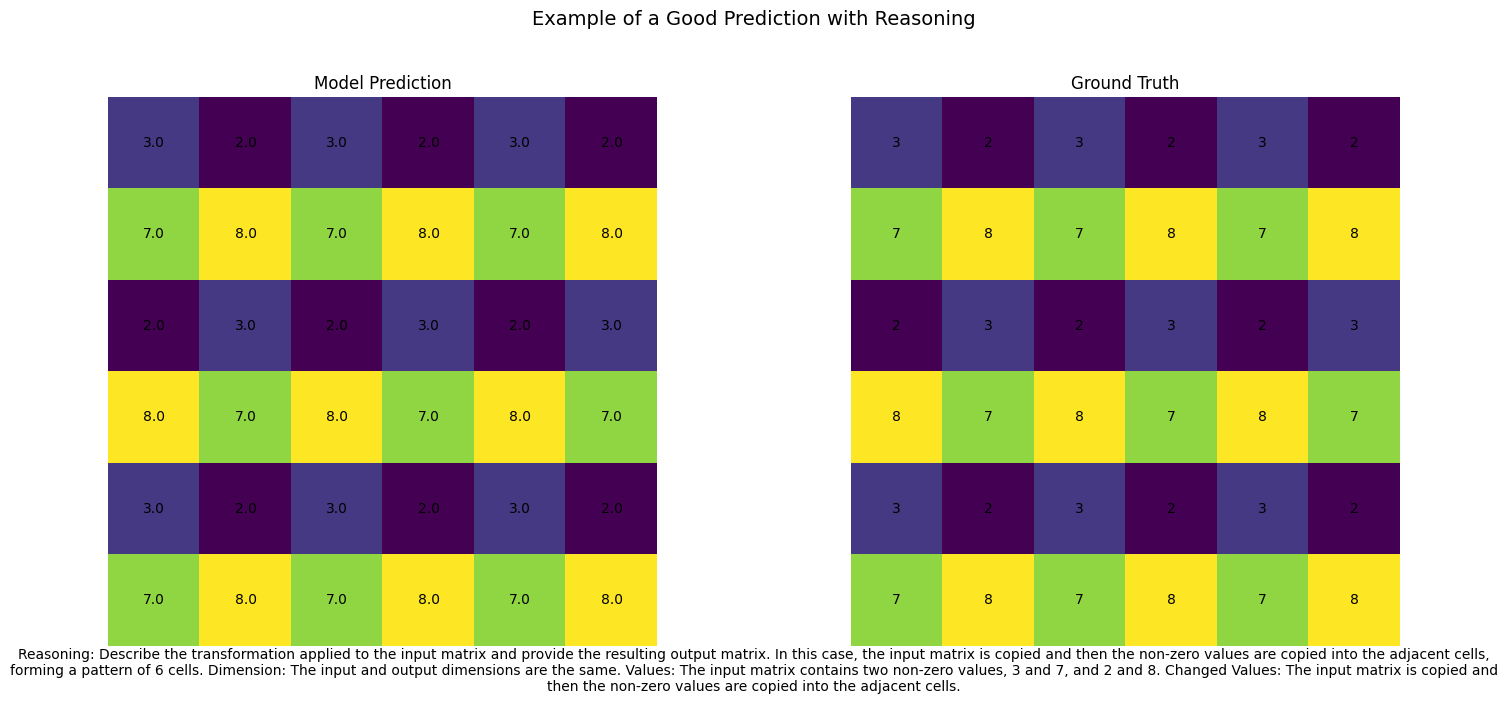

In [94]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def visualize_good_prediction_with_numbers(entry, title):
    """
    Visualizes a good prediction with numbers displayed on the matrices.
    """
    model_prediction = np.array(entry['model_prediction'])
    ground_truth = np.array(entry['ground_truth'])
    reasoning = entry['reasoning']

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Plot Model Prediction
    ax1 = axes[0]
    im1 = ax1.imshow(model_prediction, cmap='viridis')
    ax1.set_title("Model Prediction", fontsize=12)
    ax1.axis('off')

    # Add numbers on the Model Prediction matrix
    for (i, j), val in np.ndenumerate(model_prediction):
        ax1.text(j, i, f"{val}", ha='center', va='center', color='black', fontsize=10)

    # Plot Ground Truth
    ax2 = axes[1]
    im2 = ax2.imshow(ground_truth, cmap='viridis')
    ax2.set_title("Ground Truth", fontsize=12)
    ax2.axis('off')

    # Add numbers on the Ground Truth matrix
    for (i, j), val in np.ndenumerate(ground_truth):
        ax2.text(j, i, f"{val}", ha='center', va='center', color='black', fontsize=10)

    # Add reasoning as a text box below the matrices
    fig.suptitle(title, fontsize=14)
    fig.text(0.5, 0.01, f"Reasoning: {reasoning}", wrap=True, horizontalalignment='center', fontsize=10)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Visualize the first good prediction with numbers
visualize_good_prediction_with_numbers(good_predictions[0], "Example of a Good Prediction with Reasoning")



In [95]:
import json
import matplotlib.pyplot as plt
import numpy as np

# File paths
predictions_file = r"C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json"
challenges_file = r"C:\Users\U10093022\Downloads\arc-prize-2024 (1)\arc-agi_evaluation_challenges.json"

# Load the predictions and challenges files
with open(predictions_file, 'r') as f1, open(challenges_file, 'r') as f2:
    predictions_data = json.load(f1)
    challenges_data = json.load(f2)

# Convert challenges data into a dictionary for quick lookup by key
challenges_dict = {entry['key']: entry for entry in challenges_data}

# Visualization function
def visualize_prediction_with_examples(prediction_entry):
    """
    Visualizes example input/output pairs, test input, model prediction, ground truth, and reasoning.
    """
    key = prediction_entry['key']
    reasoning = prediction_entry['reasoning']
    model_prediction = np.array(prediction_entry['model_prediction'])
    ground_truth = np.array(prediction_entry['ground_truth'])

    # Get challenge data for the corresponding key
    challenge_data = challenges_dict.get(key, {})
    example_io_pairs = challenge_data.get('example_io_pairs', [])
    test_input = np.array(challenge_data.get('test_input', []))

    # Plot example input/output pairs
    fig, axes = plt.subplots(len(example_io_pairs) + 2, 2, figsize=(15, 5 * (len(example_io_pairs) + 2)))

    for idx, io_pair in enumerate(example_io_pairs):
        example_input = np.array(io_pair['input'])
        example_output = np.array(io_pair['output'])
        ax = axes[idx]
        ax[0].imshow(example_input, cmap='viridis')
        ax[0].set_title(f"Example Input {idx + 1}")
        ax[0].axis('off')

        ax[1].imshow(example_output, cmap='viridis')
        ax[1].set_title(f"Example Output {idx + 1}")
        ax[1].axis('off')

    # Plot test input
    axes[len(example_io_pairs)][0].imshow(test_input, cmap='viridis')
    axes[len(example_io_pairs)][0].set_title("Test Input")
    axes[len(example_io_pairs)][0].axis('off')

    # Plot model prediction
    axes[len(example_io_pairs)][1].imshow(model_prediction, cmap='viridis')
    axes[len(example_io_pairs)][1].set_title("Model Prediction")
    axes[len(example_io_pairs)][1].axis('off')

    # Plot ground truth
    axes[len(example_io_pairs) + 1][0].imshow(ground_truth, cmap='viridis')
    axes[len(example_io_pairs) + 1][0].set_title("Ground Truth")
    axes[len(example_io_pairs) + 1][0].axis('off')

    # Add reasoning
    fig.suptitle(f"Reasoning: {reasoning}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Visualize the first prediction entry with examples
visualize_prediction_with_examples(predictions_data[0])


TypeError: string indices must be integers, not 'str'

In [96]:
print(type(challenges_data))  # Check if it's a list or string
print(challenges_data[:5])    # Display the first 5 entries for inspection


<class 'dict'>


KeyError: slice(None, 5, None)

In [100]:
challenges_list = challenges_data['00576224']  # Replace with the actual key
print(len(challenges_list))  # Check the number of entries
print(challenges_list[:5])  # Inspect the first 5 entries



2


KeyError: slice(None, 5, None)

In [101]:
import json
import matplotlib.pyplot as plt
import numpy as np

# File paths
predictions_file = r"C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json"
challenges_file = r"C:\Users\U10093022\Downloads\arc-prize-2024 (1)\arc-agi_evaluation_challenges.json"

# Load the predictions and challenges files
with open(predictions_file, 'r') as f1, open(challenges_file, 'r') as f2:
    predictions_data = json.load(f1)
    challenges_dict = json.load(f2)  # Already a dictionary

# Visualization function
def visualize_prediction_with_examples(prediction_entry):
    """
    Visualizes example input/output pairs, test input, model prediction, ground truth, and reasoning.
    """
    key = prediction_entry['key']
    reasoning = prediction_entry['reasoning']
    model_prediction = np.array(prediction_entry['model_prediction'])
    ground_truth = np.array(prediction_entry['ground_truth'])

    # Get challenge data for the corresponding key
    challenge_data = challenges_dict.get(key, {})
    example_io_pairs = challenge_data.get('example_io_pairs', [])
    test_input = np.array(challenge_data.get('test_input', []))

    # Plot example input/output pairs
    fig, axes = plt.subplots(len(example_io_pairs) + 2, 2, figsize=(15, 5 * (len(example_io_pairs) + 2)))

    for idx, io_pair in enumerate(example_io_pairs):
        example_input = np.array(io_pair['input'])
        example_output = np.array(io_pair['output'])
        ax = axes[idx]
        ax[0].imshow(example_input, cmap='viridis')
        ax[0].set_title(f"Example Input {idx + 1}")
        ax[0].axis('off')

        ax[1].imshow(example_output, cmap='viridis')
        ax[1].set_title(f"Example Output {idx + 1}")
        ax[1].axis('off')

    # Plot test input
    axes[len(example_io_pairs)][0].imshow(test_input, cmap='viridis')
    axes[len(example_io_pairs)][0].set_title("Test Input")
    axes[len(example_io_pairs)][0].axis('off')

    # Plot model prediction
    axes[len(example_io_pairs)][1].imshow(model_prediction, cmap='viridis')
    axes[len(example_io_pairs)][1].set_title("Model Prediction")
    axes[len(example_io_pairs)][1].axis('off')

    # Plot ground truth
    axes[len(example_io_pairs) + 1][0].imshow(ground_truth, cmap='viridis')
    axes[len(example_io_pairs) + 1][0].set_title("Ground Truth")
    axes[len(example_io_pairs) + 1][0].axis('off')

    # Add reasoning
    fig.suptitle(f"Reasoning: {reasoning}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Visualize the first prediction entry with examples
visualize_prediction_with_examples(predictions_data[0])


KeyError: 'key'

In [103]:
import json

# File path for challenges
challenges_file = r"C:\Users\U10093022\Downloads\arc-prize-2024 (1)\arc-agi_evaluation_challenges.json"

# Load the challenges file
with open(challenges_file, 'r') as f:
    challenges_data = json.load(f)

# Inspect the keys of the challenges dictionary
print("Top-level keys in challenges_data:", challenges_data.keys())

# Display the structure of one example entry (first key-value pair)
first_key = next(iter(challenges_data))  # Get the first key
print("\nFirst Key:", first_key)
print("\nFirst Entry Data Structure:")
print(json.dumps(challenges_data[first_key], indent=4))


Top-level keys in challenges_data: dict_keys(['00576224', '009d5c81', '00dbd492', '03560426', '05a7bcf2', '0607ce86', '0692e18c', '070dd51e', '08573cc6', '0934a4d8', '09c534e7', '0a1d4ef5', '0a2355a6', '0b17323b', '0bb8deee', '0becf7df', '0c786b71', '0c9aba6e', '0d87d2a6', '0e671a1a', '0f63c0b9', '103eff5b', '11e1fe23', '12422b43', '12997ef3', '12eac192', '136b0064', '13713586', '137f0df0', '140c817e', '14754a24', '15113be4', '15663ba9', '15696249', '16b78196', '17b80ad2', '17cae0c1', '18419cfa', '184a9768', '195ba7dc', '1990f7a8', '19bb5feb', '1a2e2828', '1a6449f1', '1acc24af', '1c02dbbe', '1c0d0a4b', '1c56ad9f', '1d0a4b61', '1d398264', '1da012fc', '1e81d6f9', '1e97544e', '2037f2c7', '2072aba6', '20818e16', '20981f0e', '212895b5', '21f83797', '22a4bbc2', '25094a63', '2546ccf6', '256b0a75', '2685904e', '2697da3f', '2753e76c', '27a77e38', '27f8ce4f', '281123b4', '292dd178', '29700607', '2a5f8217', '2b01abd0', '2c0b0aff', '2c737e39', '2f0c5170', '310f3251', '3194b014', '319f2597', '31ada

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_full_context(prediction_entry, challenge_entry):
    """
    Visualizes example input/output pairs, test input, model prediction, ground truth, and reasoning.
    """
    reasoning = prediction_entry['reasoning']
    model_prediction = np.array(prediction_entry['model_prediction'])
    ground_truth = np.array(prediction_entry['ground_truth'])
    
    # Extract test input and training examples
    test_input = np.array(challenge_entry['test'][0]['input'])
    train_examples = challenge_entry['train']

    # Calculate the total number of subplots needed
    num_train_examples = len(train_examples)
    total_rows = num_train_examples + 2  # Train examples + Test input/Model prediction & Ground truth

    # Create the plot
    fig, axes = plt.subplots(total_rows, 2, figsize=(15, 5 * total_rows))

    # Plot training examples
    for idx, example in enumerate(train_examples):
        example_input = np.array(example['input'])
        example_output = np.array(example['output'])
        
        ax_input = axes[idx, 0]
        ax_output = axes[idx, 1]
        
        ax_input.imshow(example_input, cmap='viridis')
        ax_input.set_title(f"Train Input {idx + 1}")
        ax_input.axis('off')
        
        ax_output.imshow(example_output, cmap='viridis')
        ax_output.set_title(f"Train Output {idx + 1}")
        ax_output.axis('off')

    # Plot test input
    ax_test_input = axes[num_train_examples, 0]
    ax_test_input.imshow(test_input, cmap='viridis')
    ax_test_input.set_title("Test Input")
    ax_test_input.axis('off')

    # Plot model prediction
    ax_model_prediction = axes[num_train_examples, 1]
    ax_model_prediction.imshow(model_prediction, cmap='viridis')
    ax_model_prediction.set_title("Model Prediction")
    ax_model_prediction.axis('off')

    # Plot ground truth
    ax_ground_truth = axes[num_train_examples + 1, 0]
    ax_ground_truth.imshow(ground_truth, cmap='viridis')
    ax_ground_truth.set_title("Ground Truth")
    ax_ground_truth.axis('off')

    # Add reasoning as a text box below the plots
    fig.suptitle(f"Reasoning: {reasoning}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Example Usage
prediction_entry = predictions_data[0]  # First prediction entry
challenge_entry = challenges_dict[prediction_entry['key']]  # Get matching challenge entry
visualize_full_context(prediction_entry, challenge_entry)


KeyError: 'key'

In [105]:
print(json.dumps(predictions_data[0], indent=4))


{
    "entry_index": 0,
    "pixel_accuracy": 100.0,
    "model_prediction": [
        [
            3.0,
            2.0,
            3.0,
            2.0,
            3.0,
            2.0
        ],
        [
            7.0,
            8.0,
            7.0,
            8.0,
            7.0,
            8.0
        ],
        [
            2.0,
            3.0,
            2.0,
            3.0,
            2.0,
            3.0
        ],
        [
            8.0,
            7.0,
            8.0,
            7.0,
            8.0,
            7.0
        ],
        [
            3.0,
            2.0,
            3.0,
            2.0,
            3.0,
            2.0
        ],
        [
            7.0,
            8.0,
            7.0,
            8.0,
            7.0,
            8.0
        ]
    ],
    "ground_truth": [
        [
            3,
            2,
            3,
            2,
            3,
            2
        ],
        [
            7,
            8,
           

In [106]:
# Updated function to fetch the matching challenge entry using entry_index
def get_challenge_entry_by_index(prediction_entry, challenges_dict):
    """
    Fetches the challenge entry from challenges_dict using the entry_index.
    """
    entry_index = prediction_entry["entry_index"]  # Get the index from the prediction entry
    challenge_key = list(challenges_dict.keys())[entry_index]  # Get the corresponding challenge key
    return challenges_dict[challenge_key]  # Return the challenge data

# Example Usage
prediction_entry = predictions_data[0]  # First prediction entry
challenge_entry = get_challenge_entry_by_index(prediction_entry, challenges_dict)  # Get matching challenge


In [115]:
import json

# Load the predictions file
predictions_file = r"C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json"
with open(predictions_file, 'r') as f:
    predictions_data = json.load(f)

# Inspect the structure of the first entry
print("Structure of the first prediction entry:")
print(json.dumps(predictions_data[0], indent=4))

# Check the fields available for all entries
print("\nFields in the first prediction entry:")
print(predictions_data[0].keys())

# Print all keys for the first 5 entries to inspect variability
print("\nInspecting first 5 prediction entries:")
for i, entry in enumerate(predictions_data[:5]):
    print(f"\nEntry {i + 1}:")
    print(json.dumps(entry, indent=4))


Structure of the first prediction entry:
{
    "entry_index": 0,
    "pixel_accuracy": 100.0,
    "model_prediction": [
        [
            3.0,
            2.0,
            3.0,
            2.0,
            3.0,
            2.0
        ],
        [
            7.0,
            8.0,
            7.0,
            8.0,
            7.0,
            8.0
        ],
        [
            2.0,
            3.0,
            2.0,
            3.0,
            2.0,
            3.0
        ],
        [
            8.0,
            7.0,
            8.0,
            7.0,
            8.0,
            7.0
        ],
        [
            3.0,
            2.0,
            3.0,
            2.0,
            3.0,
            2.0
        ],
        [
            7.0,
            8.0,
            7.0,
            8.0,
            7.0,
            8.0
        ]
    ],
    "ground_truth": [
        [
            3,
            2,
            3,
            2,
            3,
            2
        ],
        [



Visualizing Entry 1/24 (Key: 00576224)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. In this case, the input matrix is copied and then the non-zero values are copied into the adjacent cells, forming a pattern of 6 cells. Dimension: The input and output dimensions are the same. Values: The input matrix contains two non-zero values, 3 and 7, and 2 and 8. Changed Values: The input matrix is copied and then the non-zero values are copied into the adjacent cells.


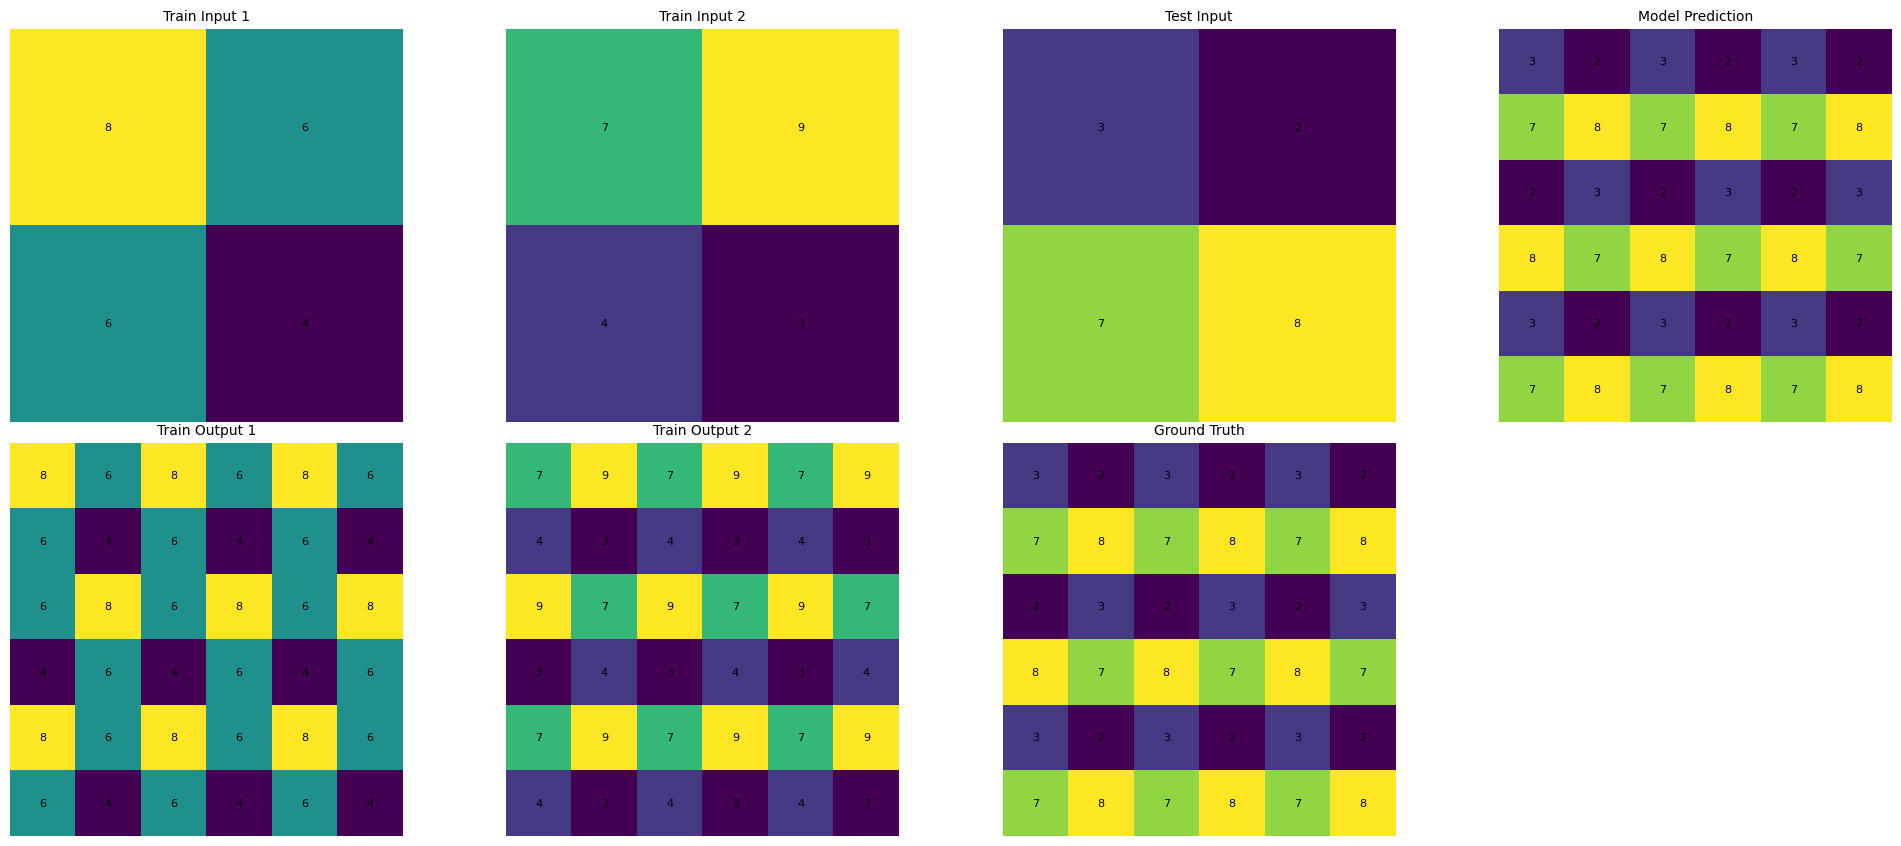


Visualizing Entry 2/24 (Key: 19bb5feb)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions remain the same. Values: The input matrix contains a non-zero value of 8 and other values which are not present in the output matrix. Changed Values: The value 8 is replaced by the non-zero values 2 and 6 in the output matrix.


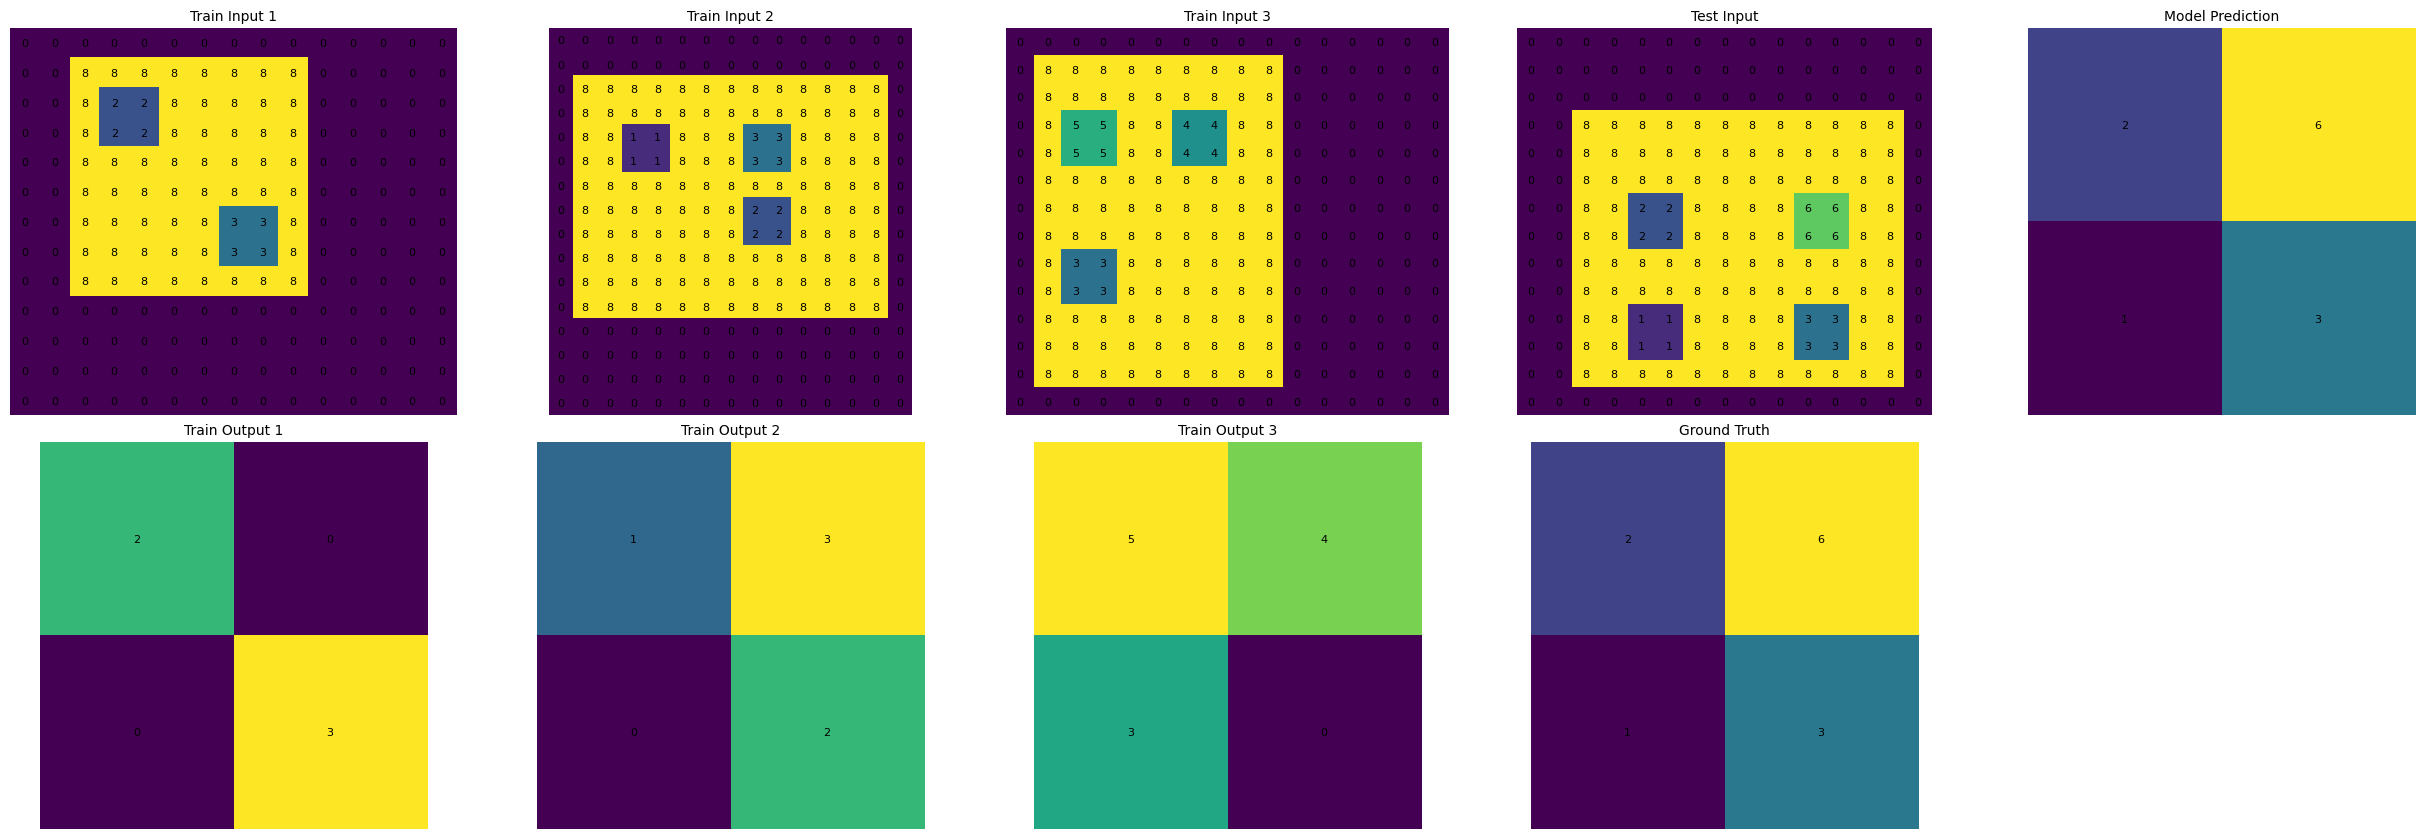


Visualizing Entry 3/24 (Key: 1a2e2828)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains a non-zero value in the center and is surrounded by a non-zero value in the other cells. The output matrix is a single non-zero value which is the same as the value in the center of the input matrix. Dimensions: The dimensions of the input matrix and the output matrix are the same. Values: The input matrix has a non-zero value in the center and the other cells contain a different non-zero value. Changed values: The input matrix is not changed, it is copied and then the non-zero values are removed from the other cells and the output matrix contains only the non-zero value in the center.


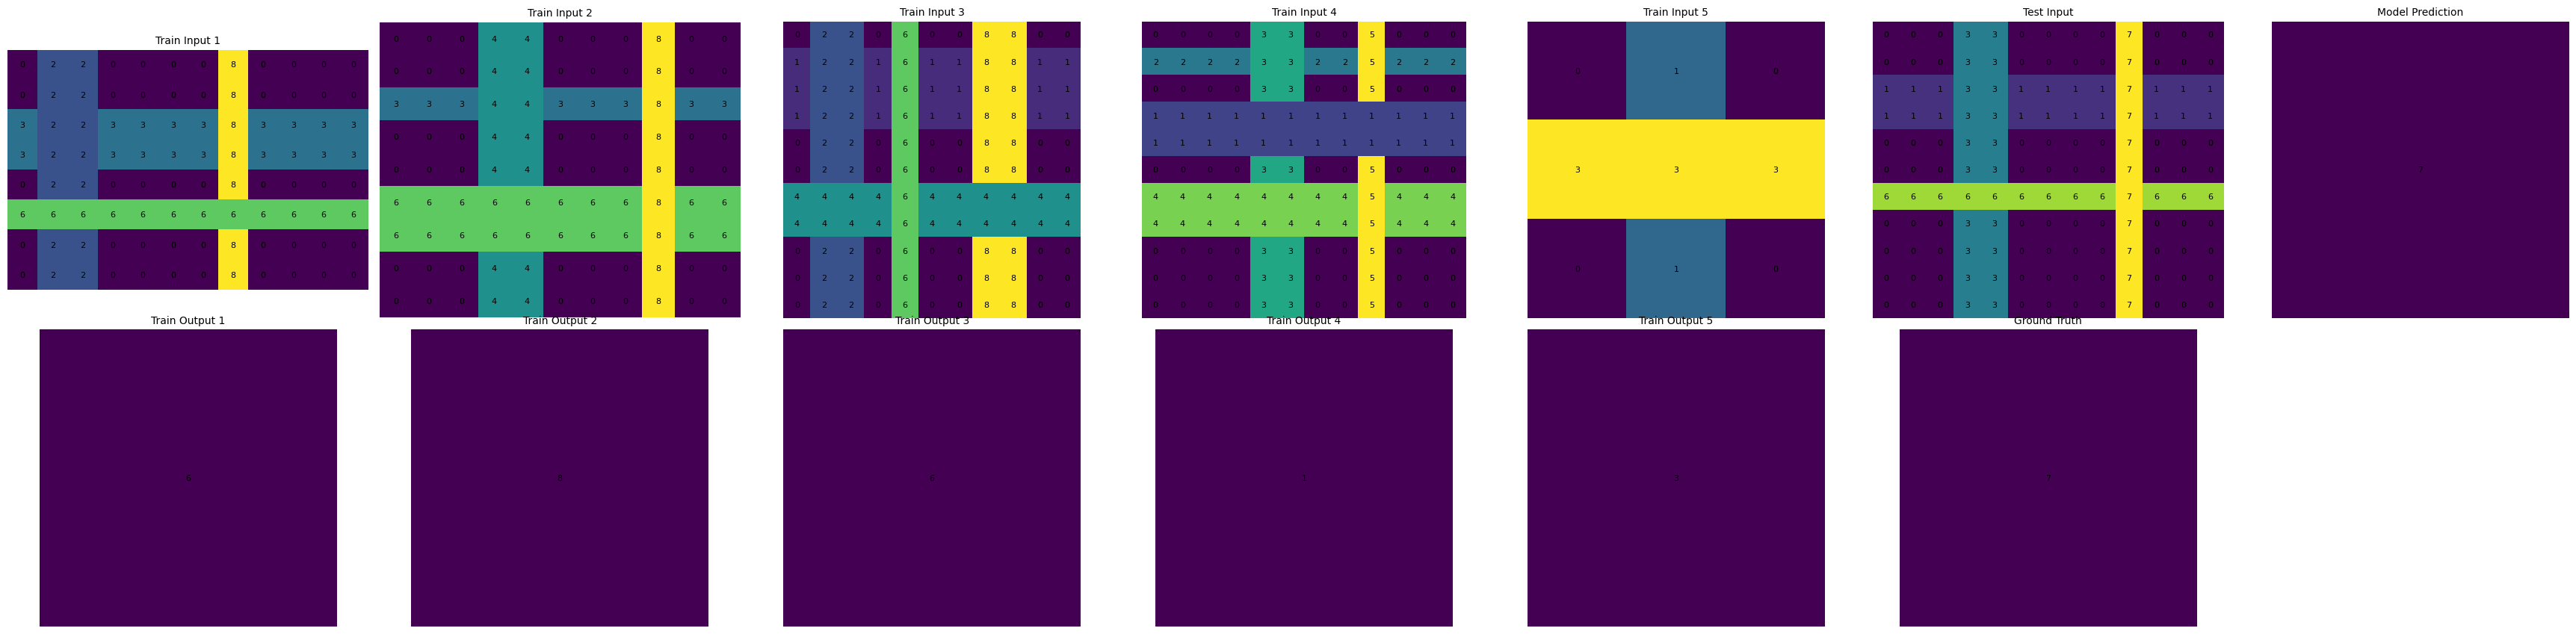


Visualizing Entry 4/24 (Key: 27a77e38)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output dimensions remain the same. Values: Values in the input matrix do not change but are rearranged to form the output matrix. Changed Values: Values in the input matrix are not changed but the arrangement of values in the matrix is changed.


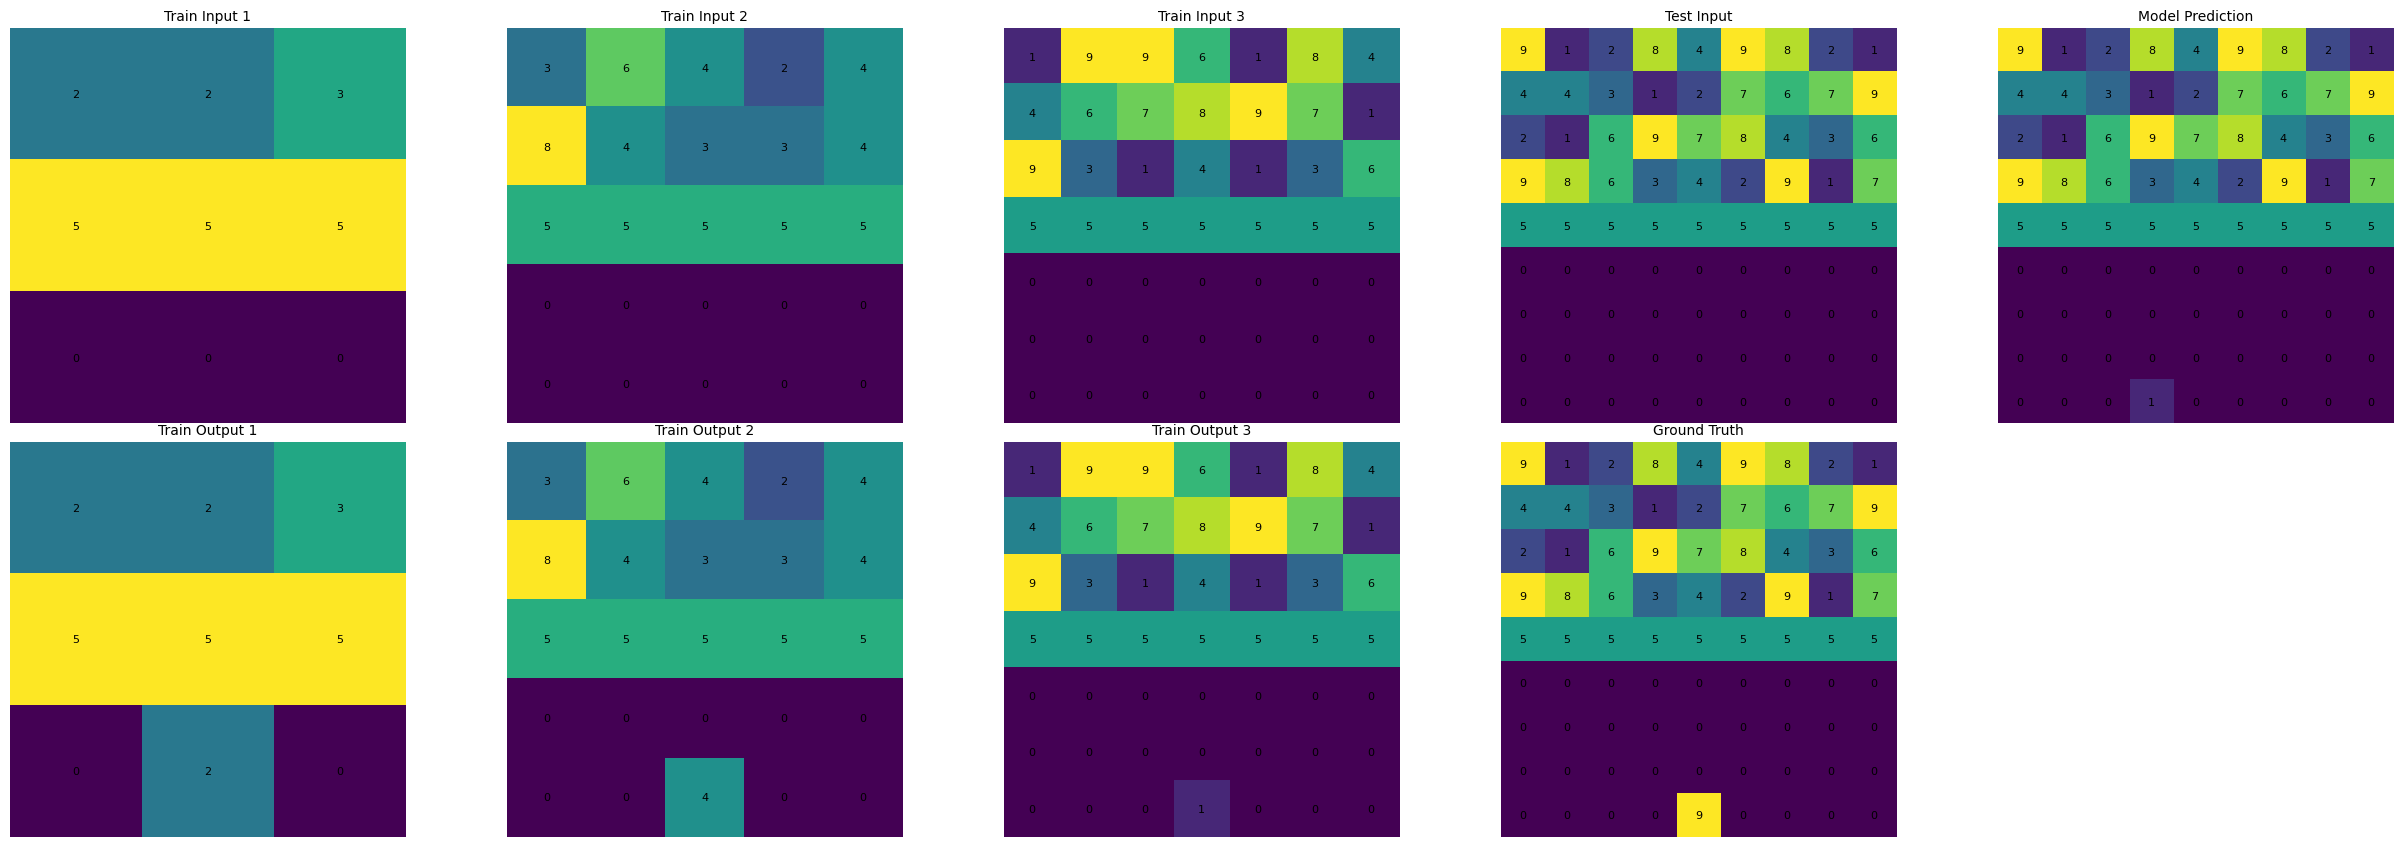


Visualizing Entry 5/24 (Key: 32e9702f)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output dimensions are the same. Values: Input matrix contains 6s and 0s, output matrix contains 5s and 6s. Changed Values: The value 0s are replaced by 5s according to the reasoning logic.


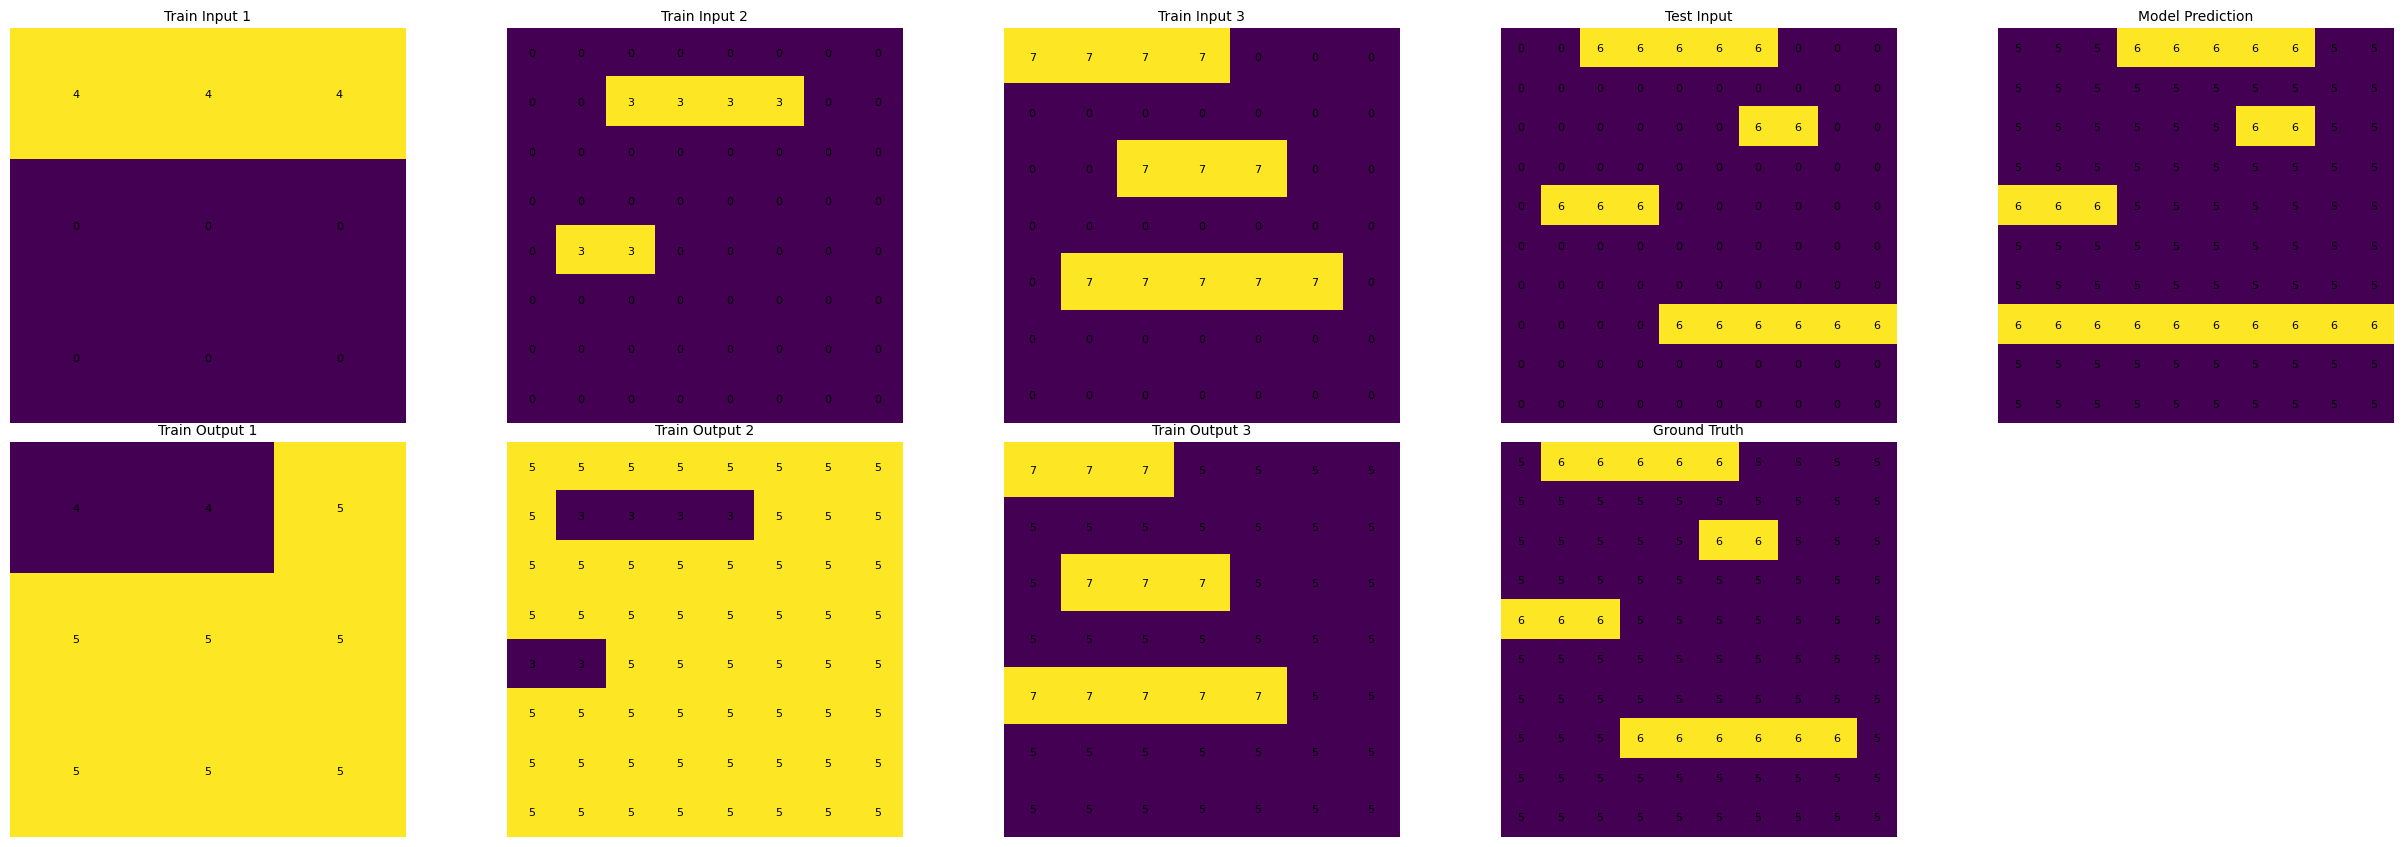


Visualizing Entry 6/24 (Key: 332efdb3)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix has a single non-zero value 0. Changed Values: The value 0 is replaced with 1 to form the output matrix.


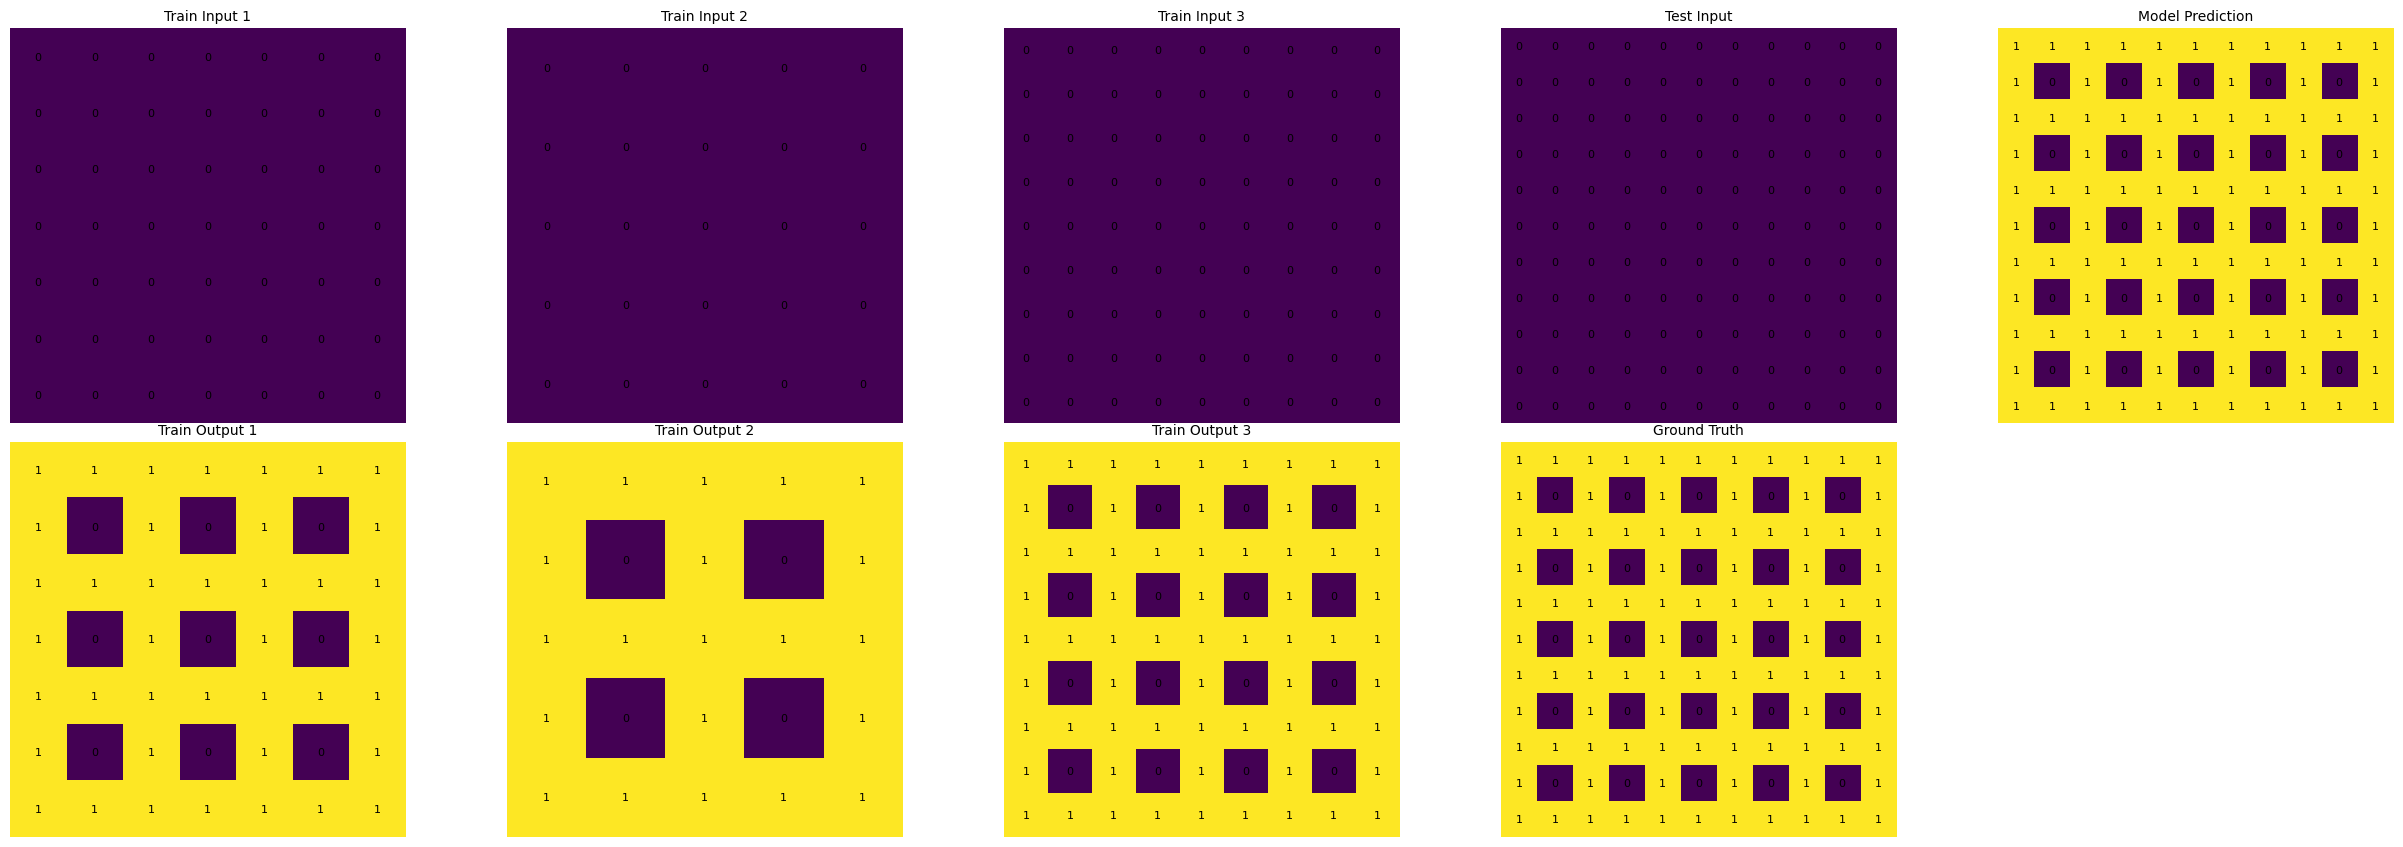


Visualizing Entry 7/24 (Key: 358ba94e)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output dimensions are the same. Values: Input matrix contains the values 0 and 1. Changed Values: Input matrix remains the same and the output matrix is copied and then the values are arranged in a way that they form a single structure of 1s.


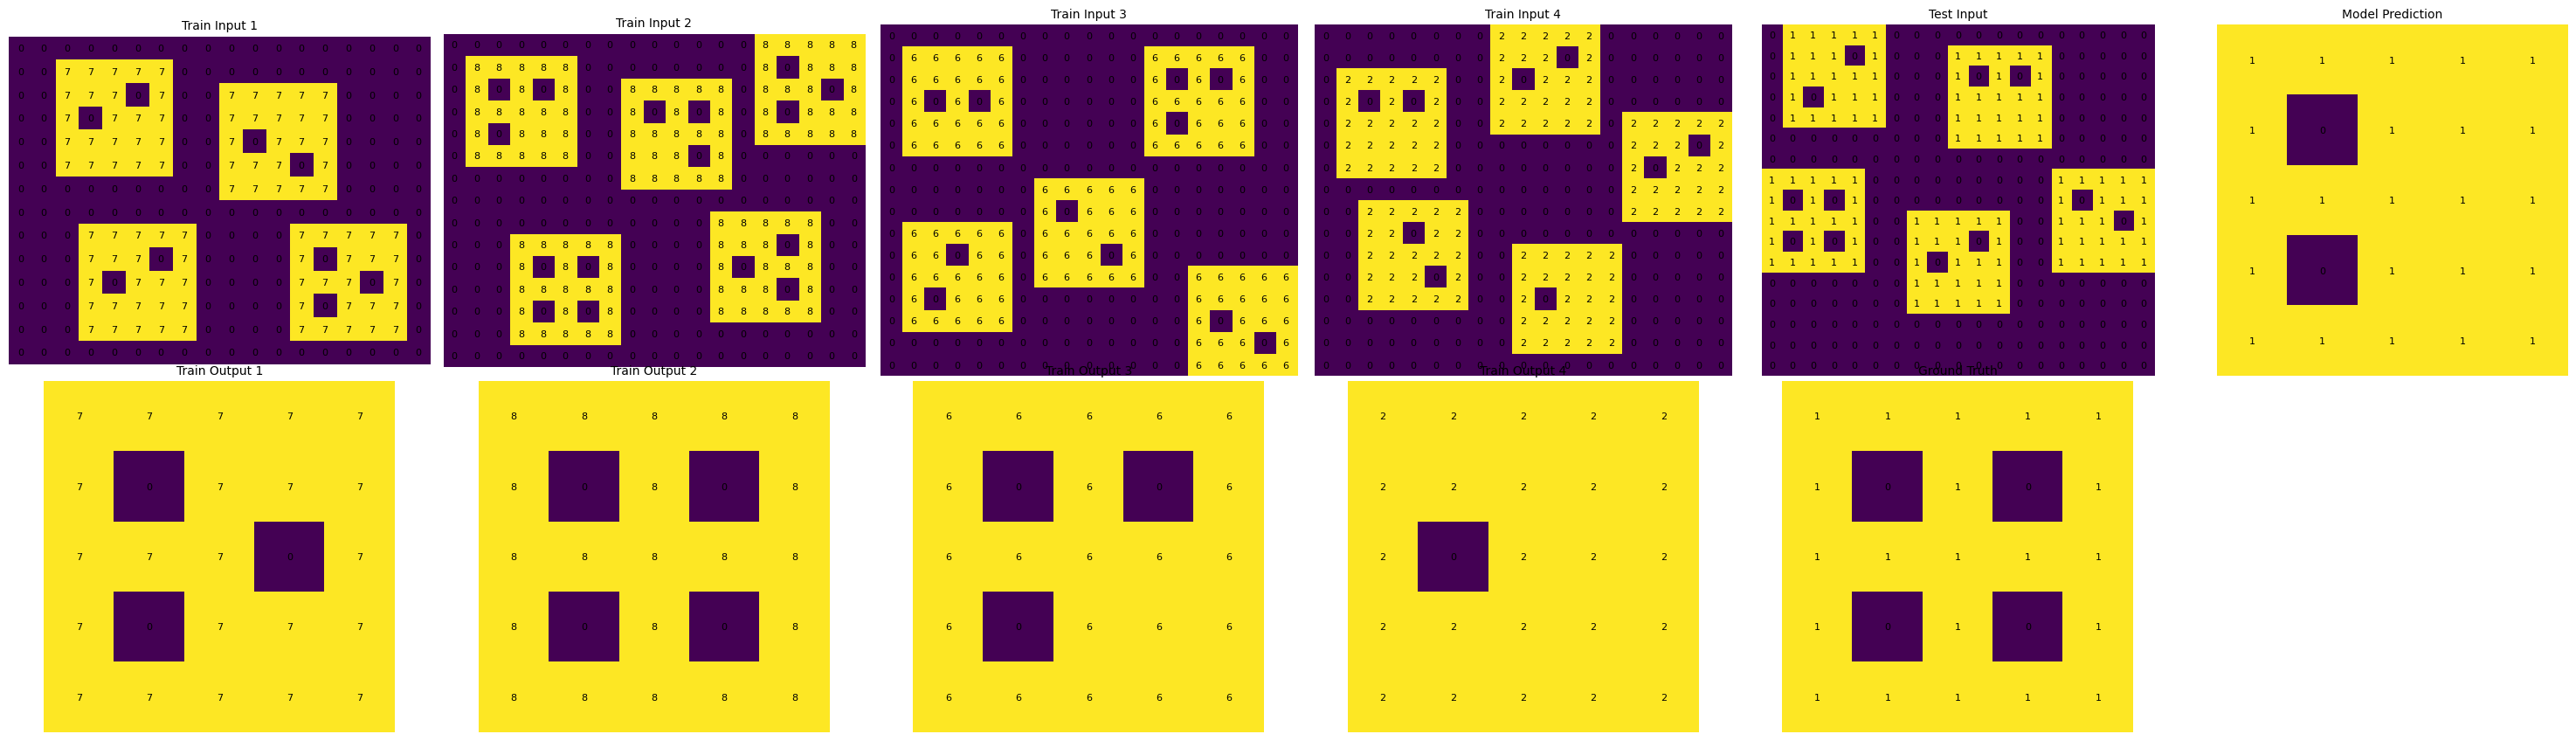


Visualizing Entry 8/24 (Key: 3979b1a8)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output matrix has the same dimension. Values: The input matrix contains the values 1 and 5. Changed Values: The value 9 is added to the matrix as explained in the reasoning.


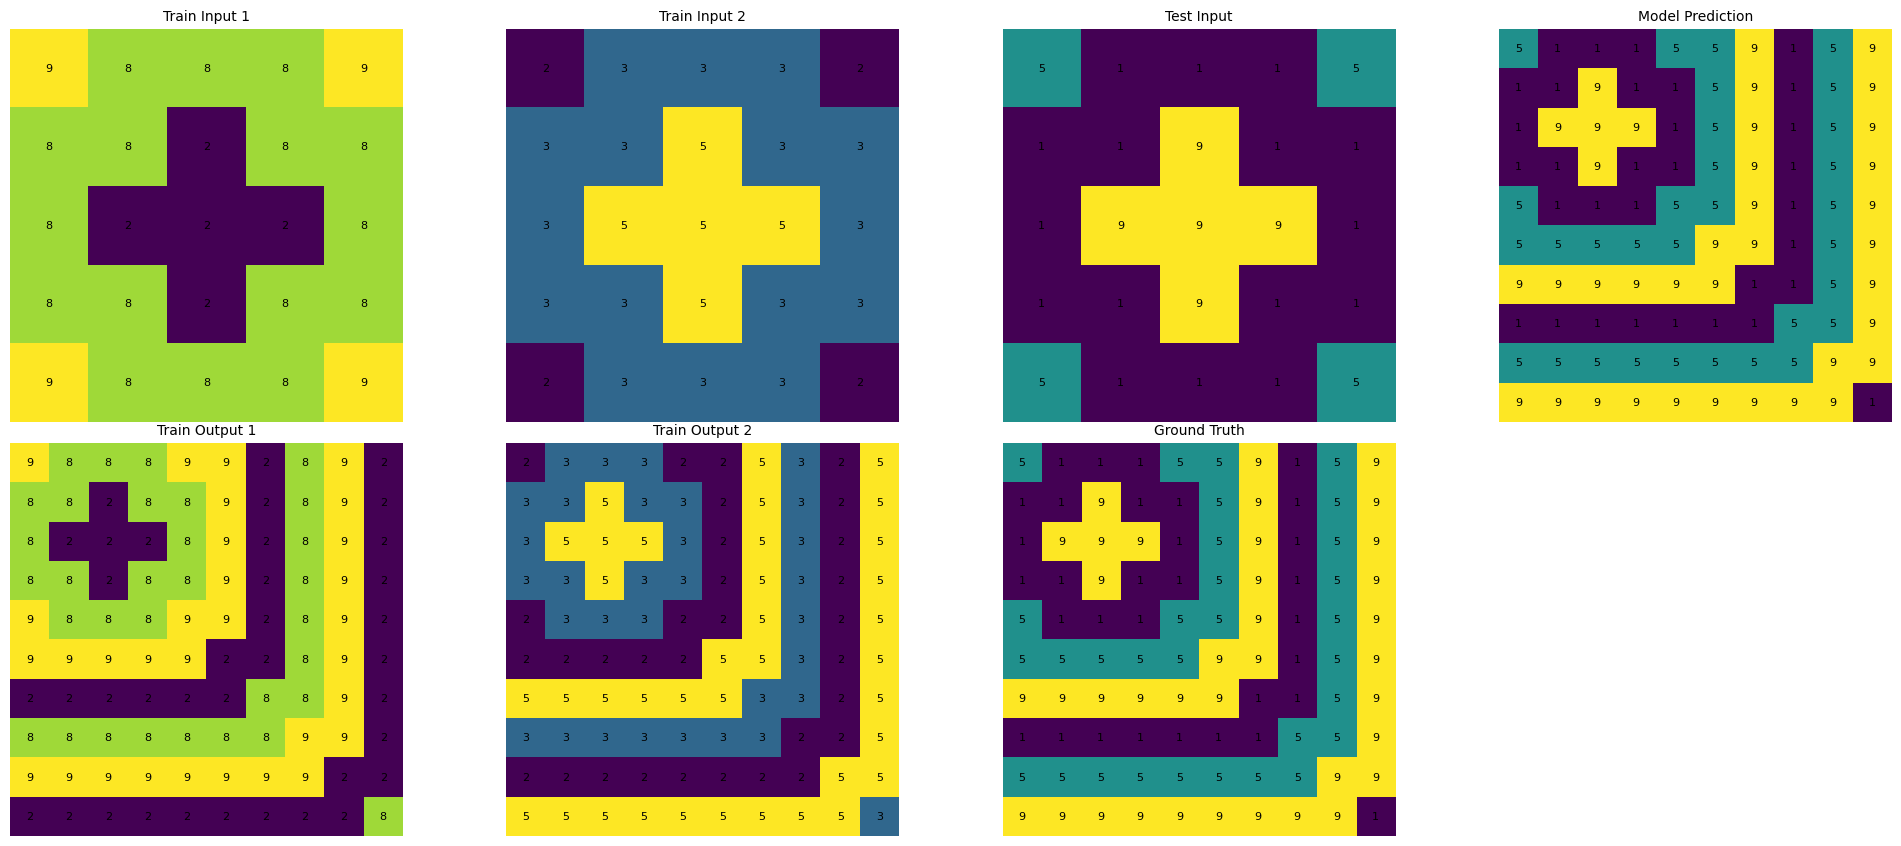


Visualizing Entry 9/24 (Key: 575b1a71)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix has a grid structure with one cell being non-zero. The output matrix is created by adding a value to each cell in the input matrix that has a non-zero neighbor. Dimensions: The input and output matrices have the same dimensions. Values: The input matrix has one non-zero value, 5. Changed Values: The values in the output matrix are not changed, but new values are added to the cells with non-zero neighbors.


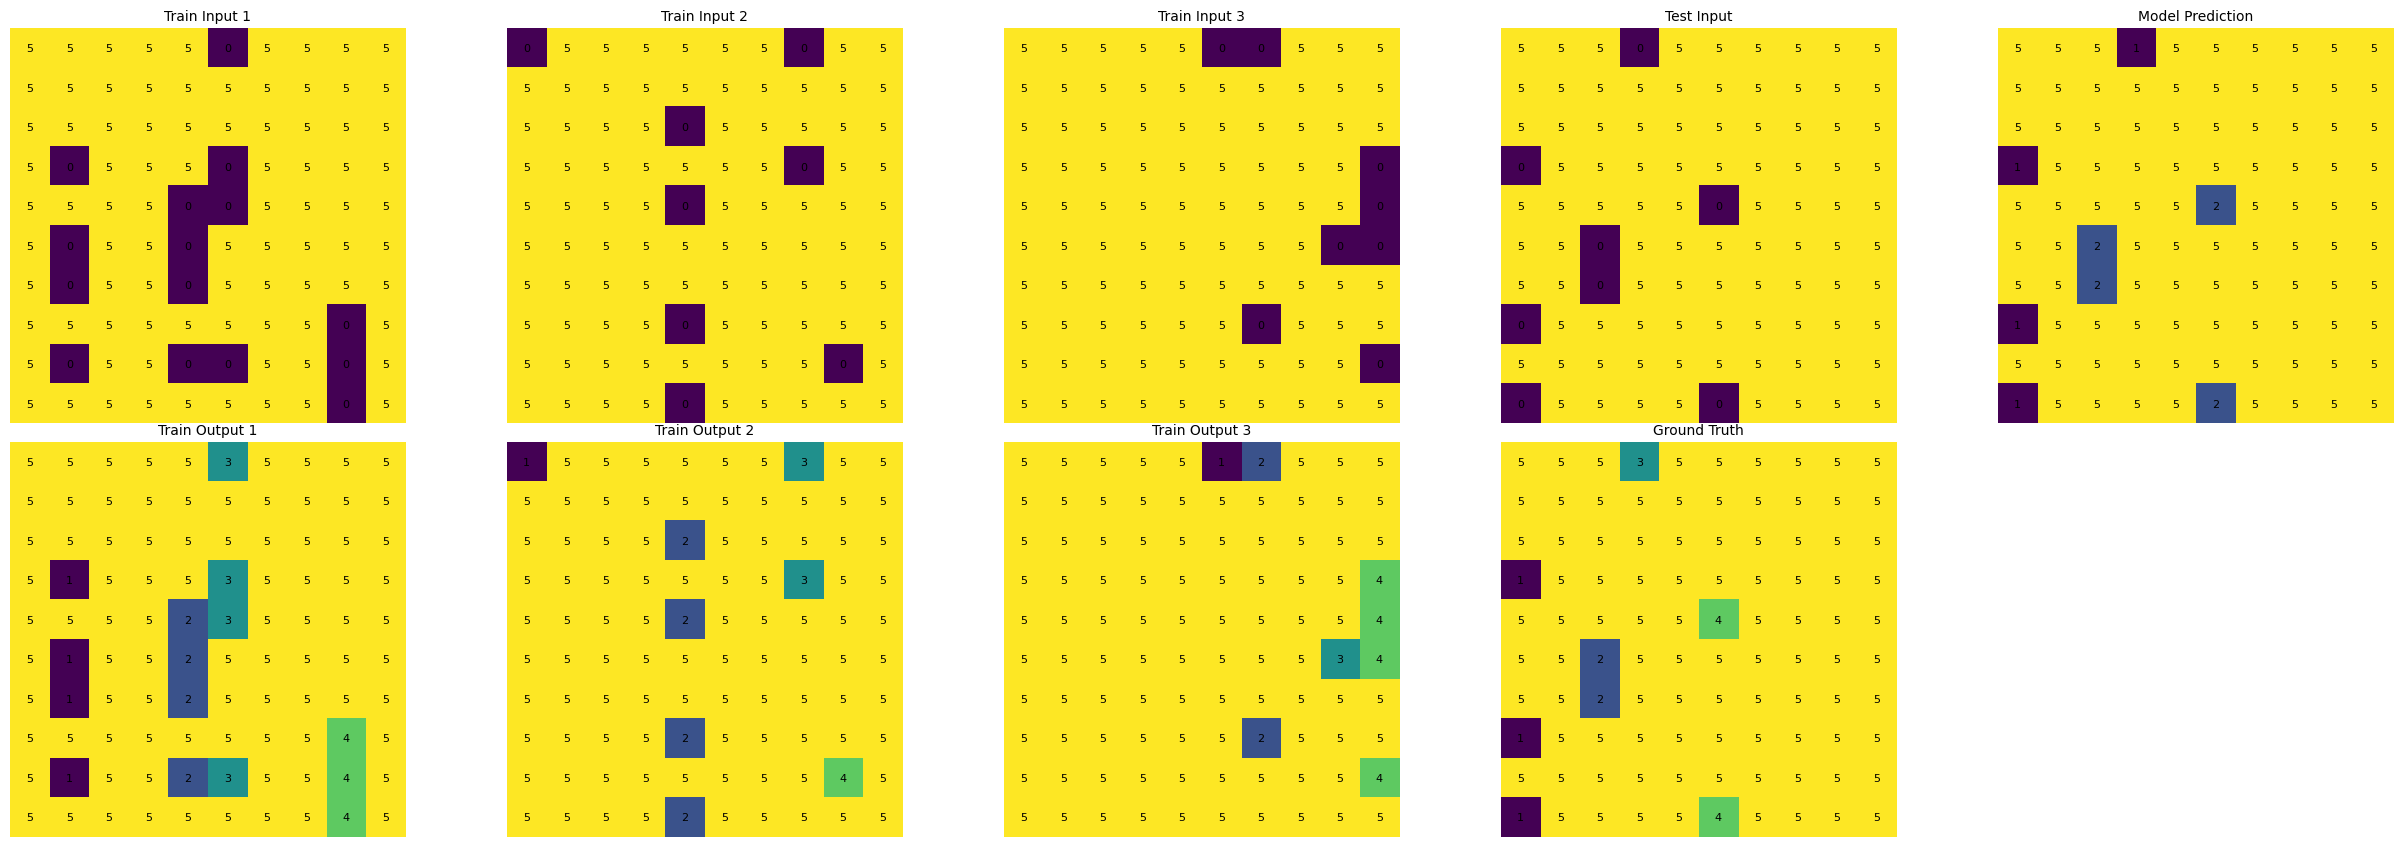


Visualizing Entry 10/24 (Key: 66e6c45b)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. In this case, the non-zero values are rearranged so that each value is placed diagonally from its original position. Dimensions: The input and output dimensions are the same. Values: The input matrix contains non-zero values ranging from 2 to 9. Changed Values: The non-zero values are rearranged diagonally.


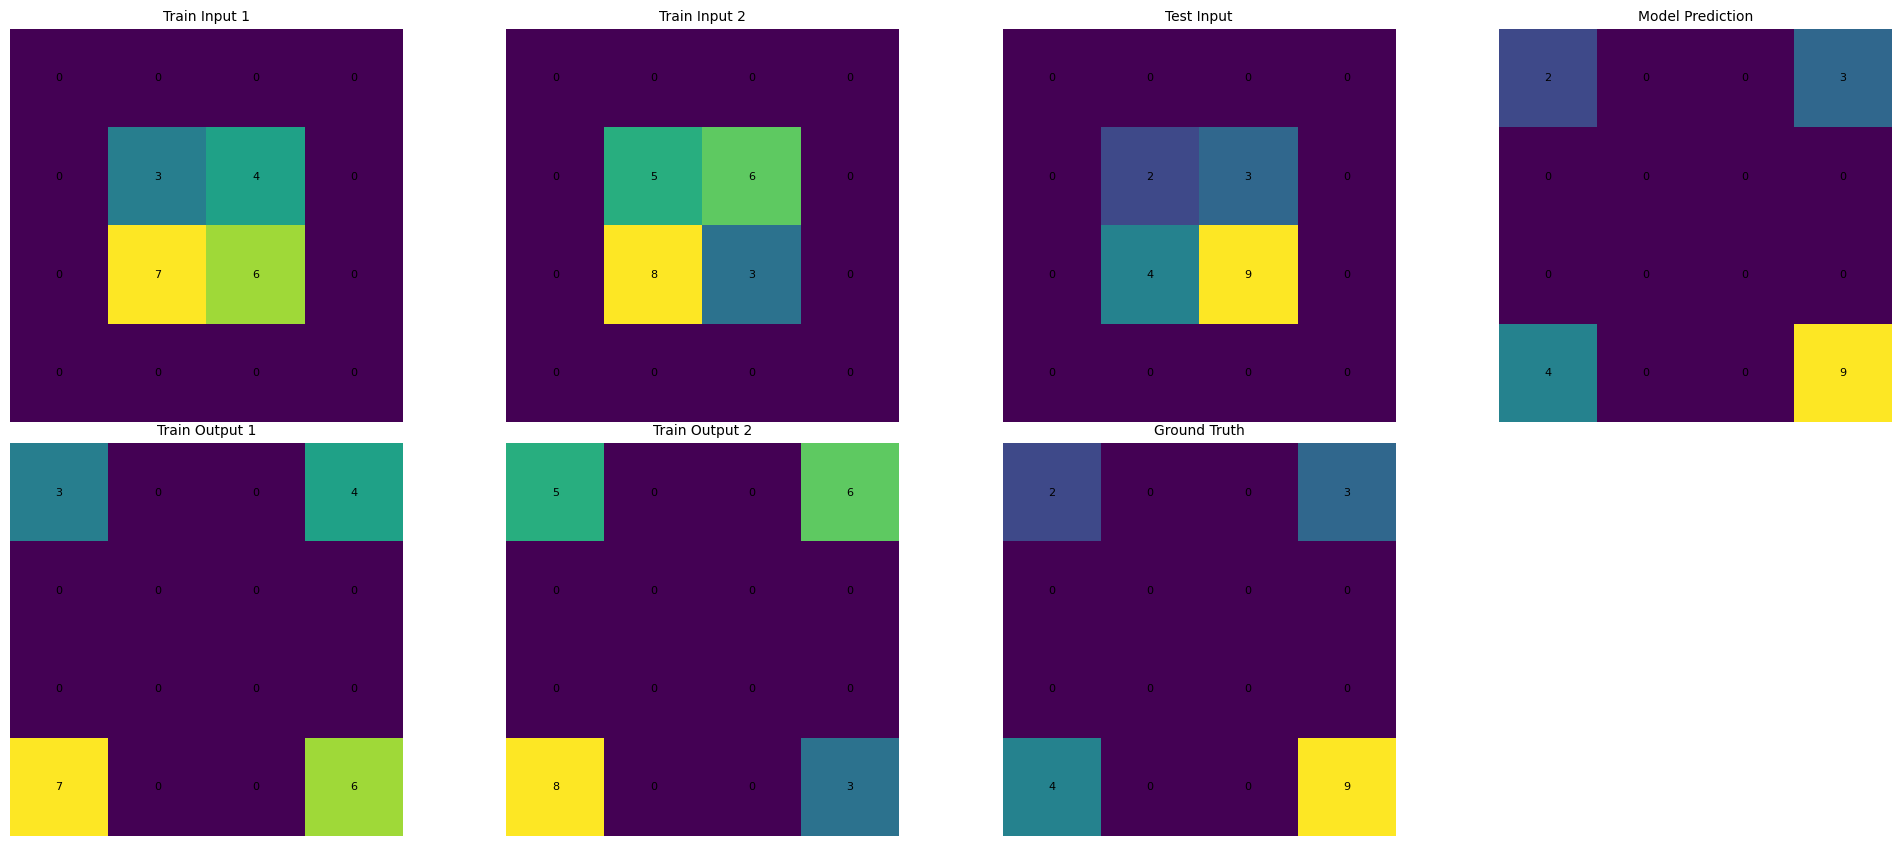


Visualizing Entry 11/24 (Key: 72207abc)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix contains non-zero values 1, 2, 8 and 0. Changed Values: The value 0 in the input matrix is replaced with the non-zero values present in the same row.


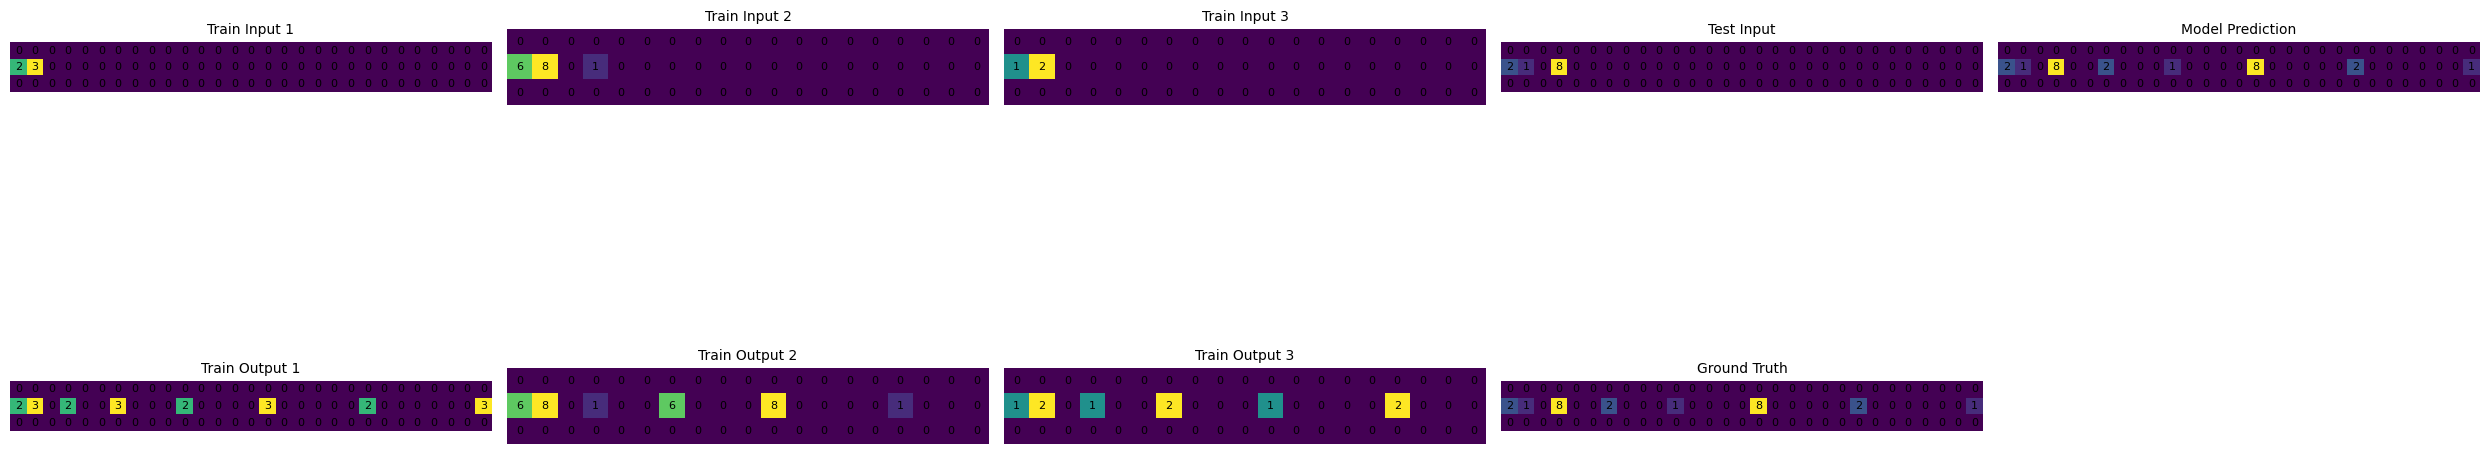


Visualizing Entry 12/24 (Key: 73c3b0d8)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains a 2x2 grid of non-zero values and a 4x4 grid of non-zero values. The output matrix is created by placing the 4x4 grid of non-zero values inside the 2x2 grid of non-zero values. Dimensions: The input and output matrices have the same dimensions. Values: The input matrix contains a 2x2 grid of non-zero values and a 4x4 grid of non-zero values. Changed Values: The 2x2 grid of non-zero values is replaced by the 4x4 grid of non-zero values.


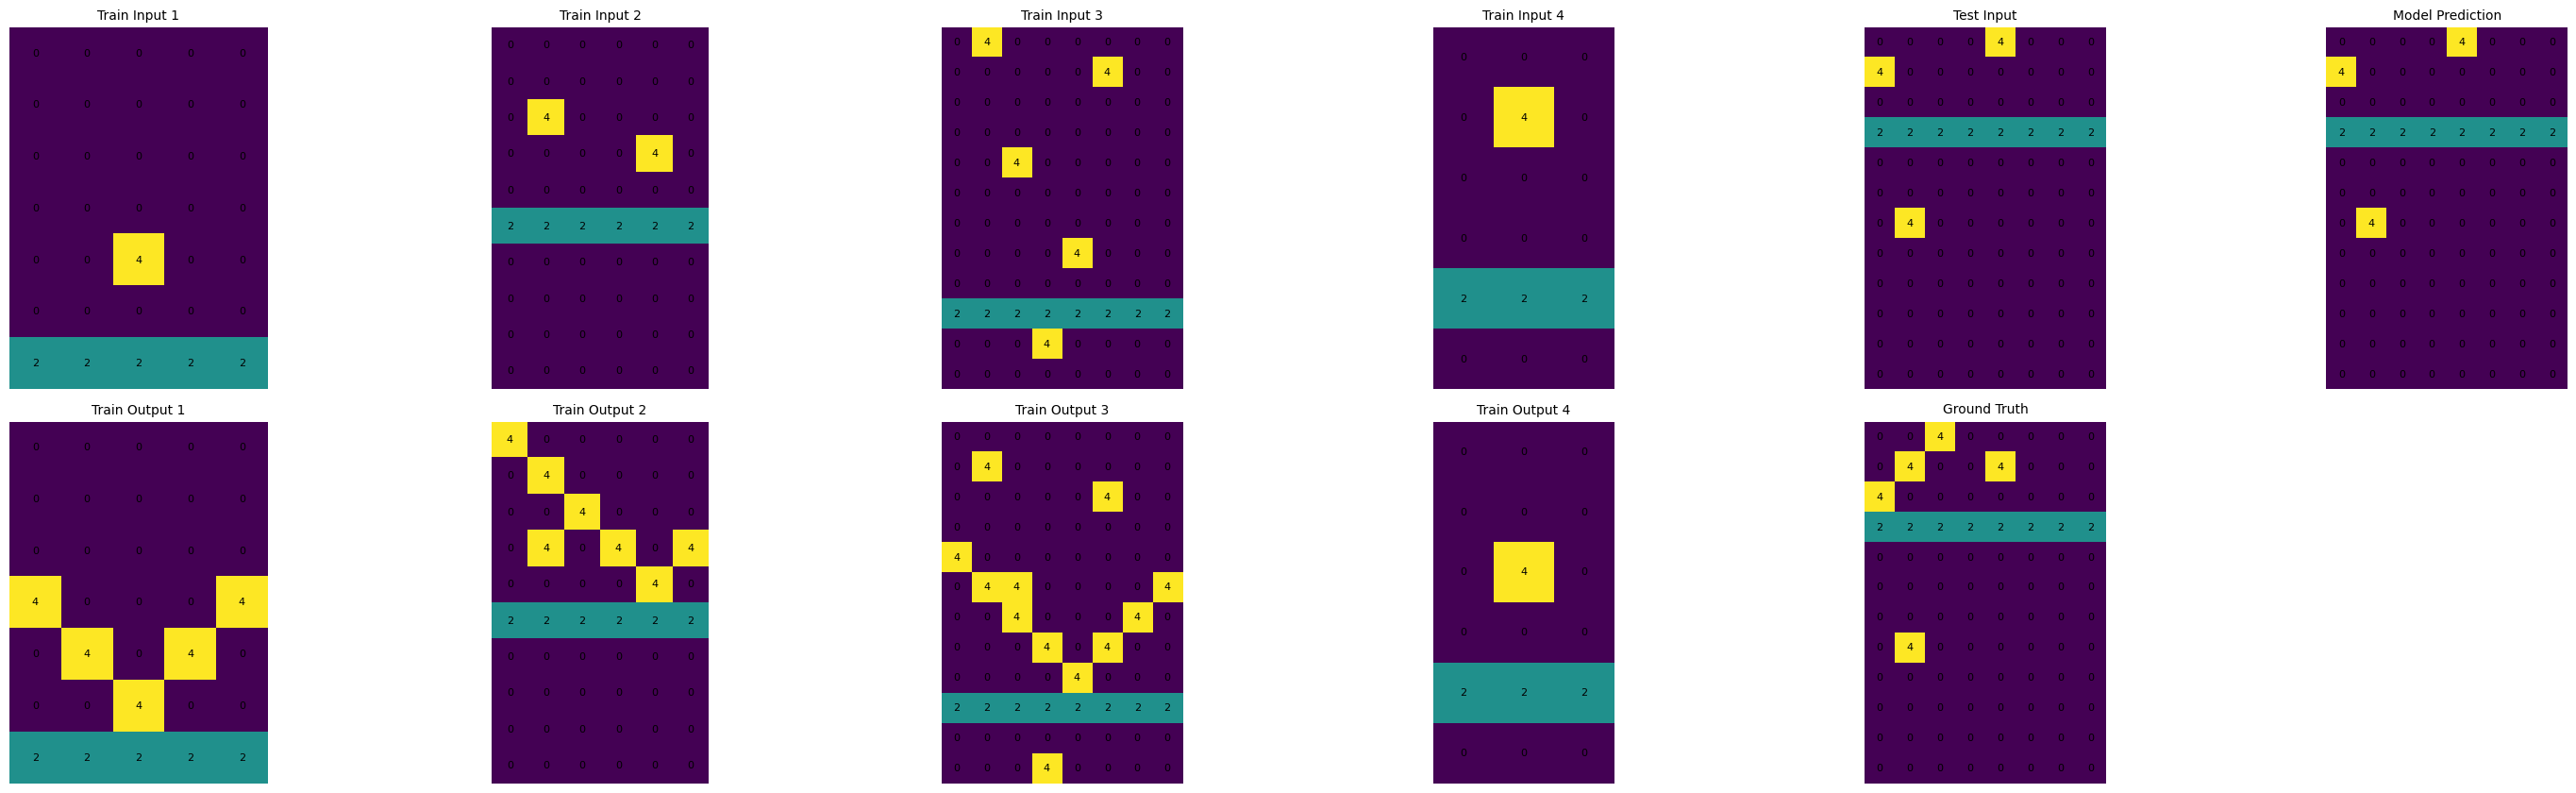


Visualizing Entry 13/24 (Key: af24b4cc)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The output dimension is 3 by 5. Values: The input matrix contains non-zero values 1,3,4,2,5 and 6. Changed Values: The output matrix contains the non-zero values 1,3,4 and 2.


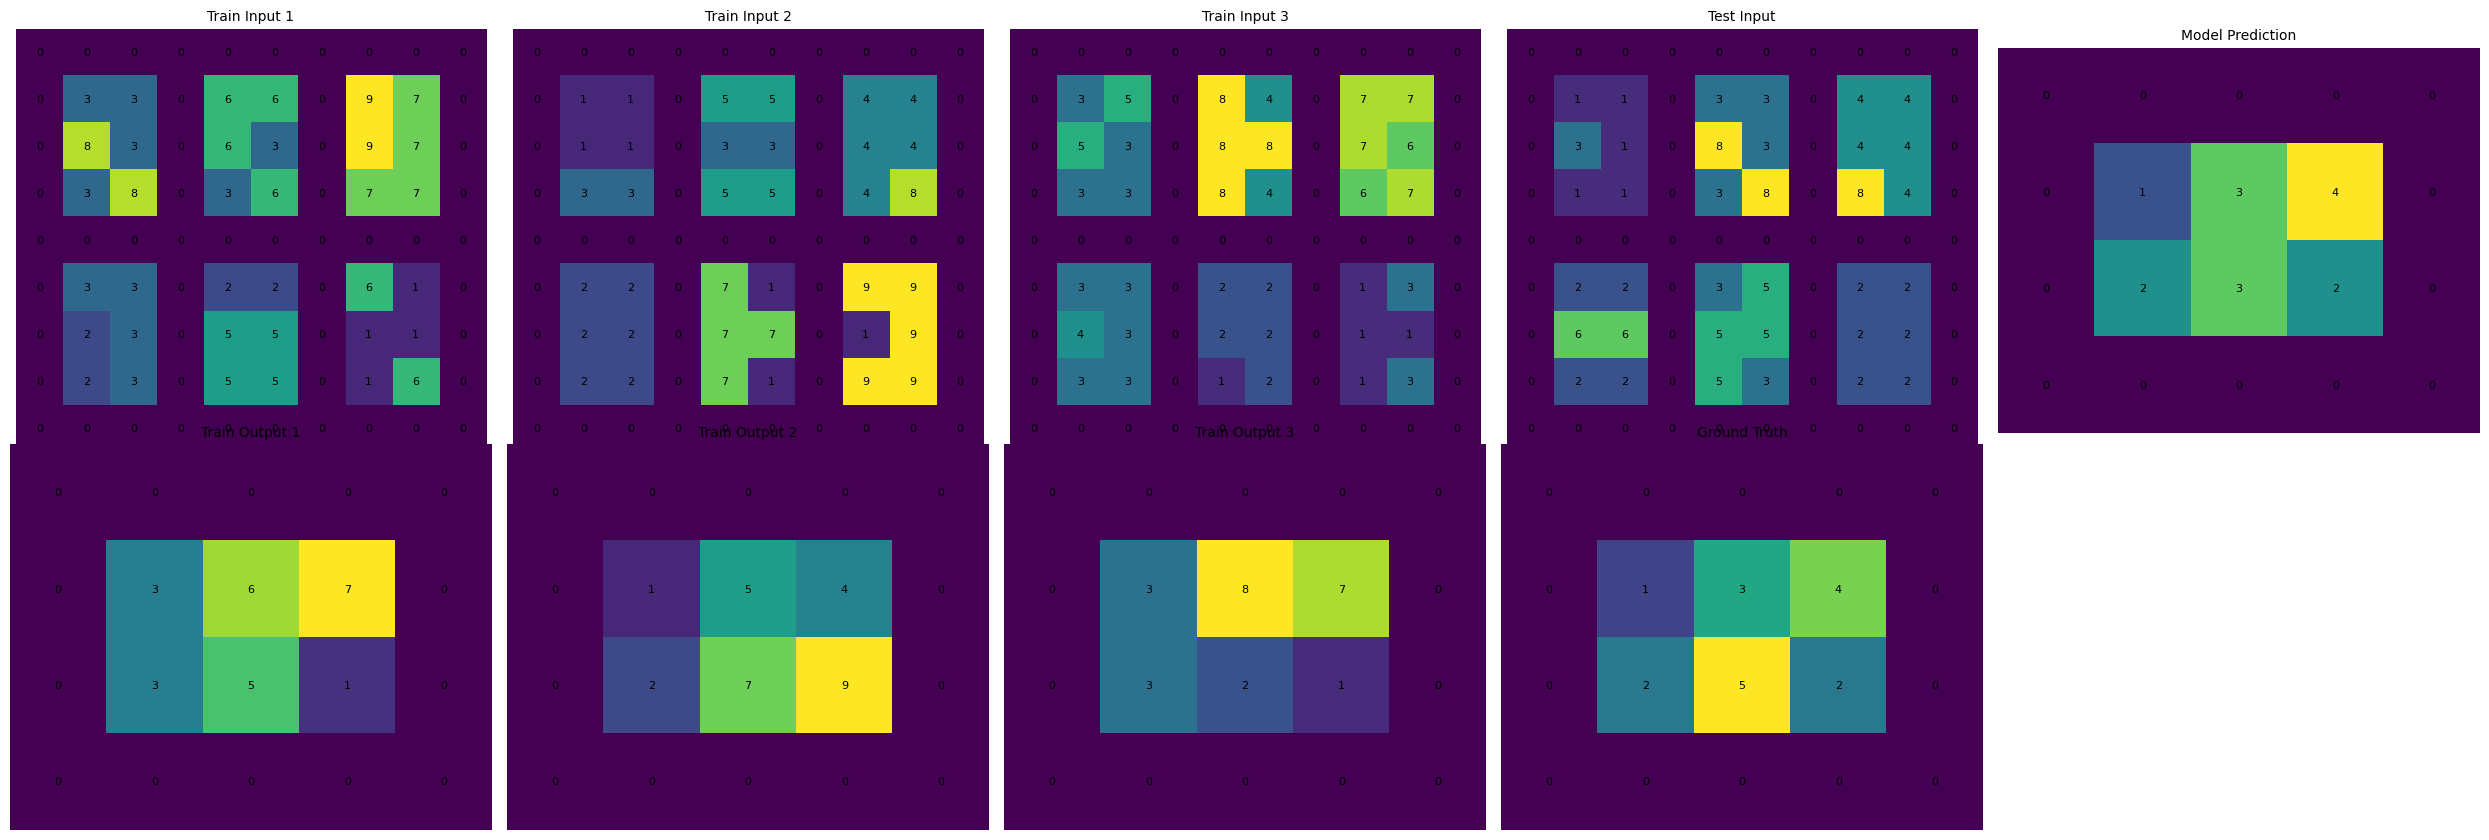


Visualizing Entry 14/24 (Key: b1fc8b8e)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output matrix has the same dimensions. Values: Input matrix has the value 0 and 8. Changed Values: Values do not change, the pattern is copied and extended to the left and right.


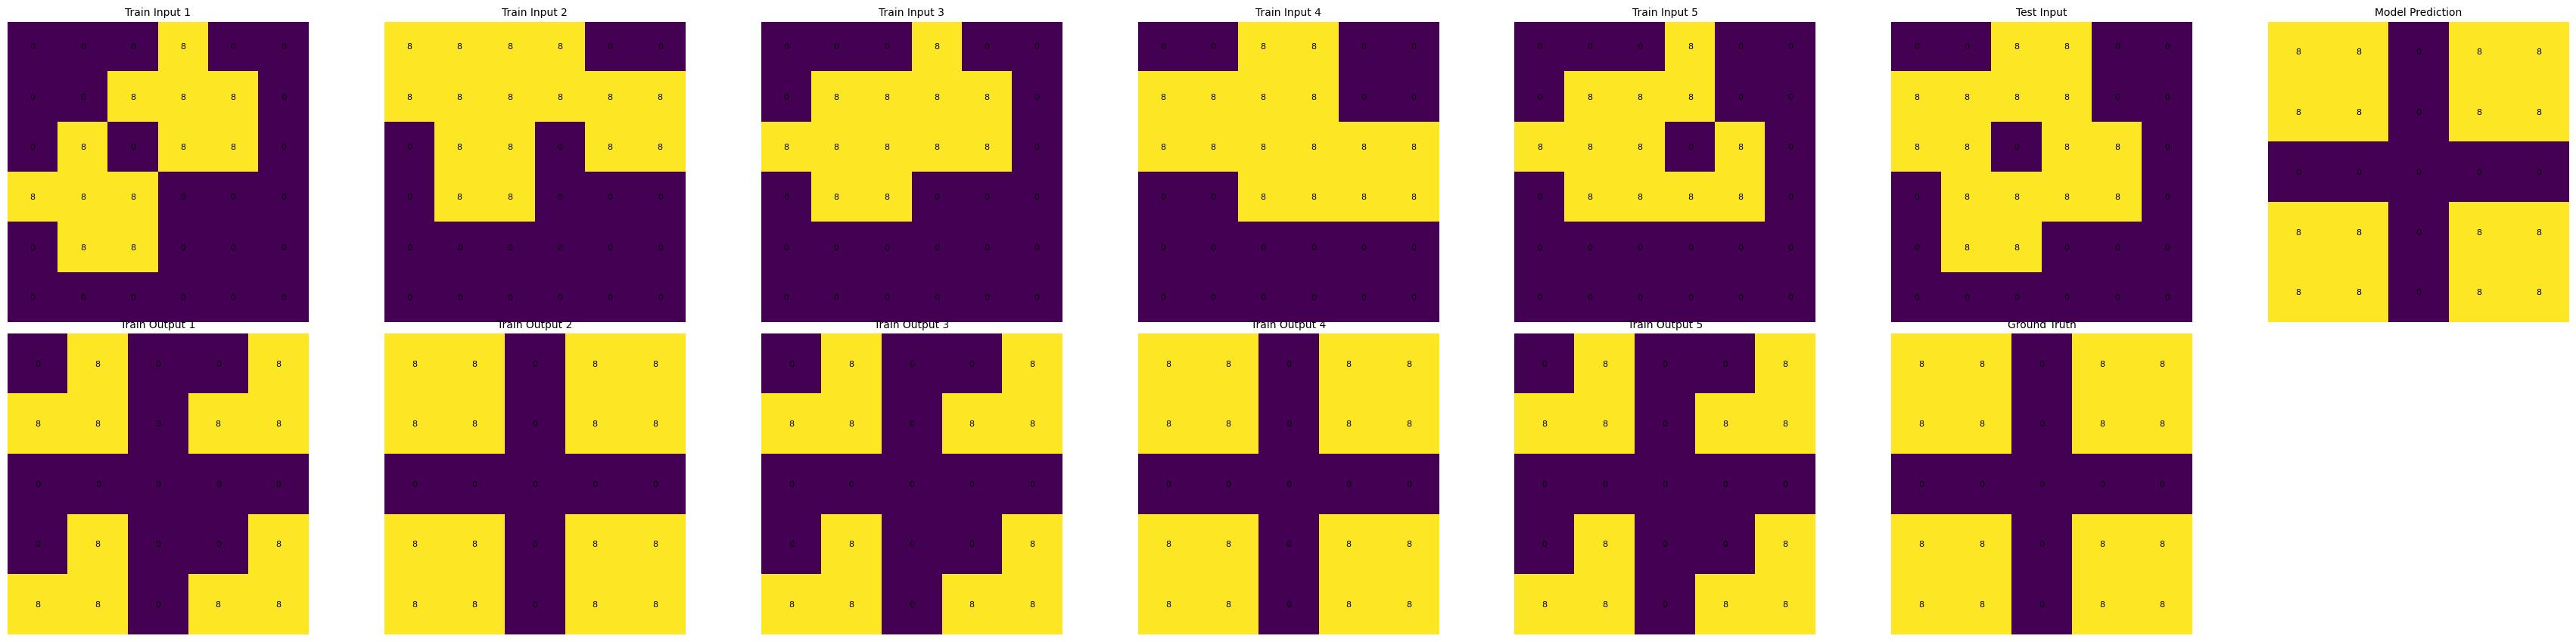


Visualizing Entry 15/24 (Key: bf699163)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimensions: Input and output dimensions are the same. Values: Input matrix has values 5,6,7 and 2. Changed Values: Values 6 are changed to 4 and values 7 are changed to 5.


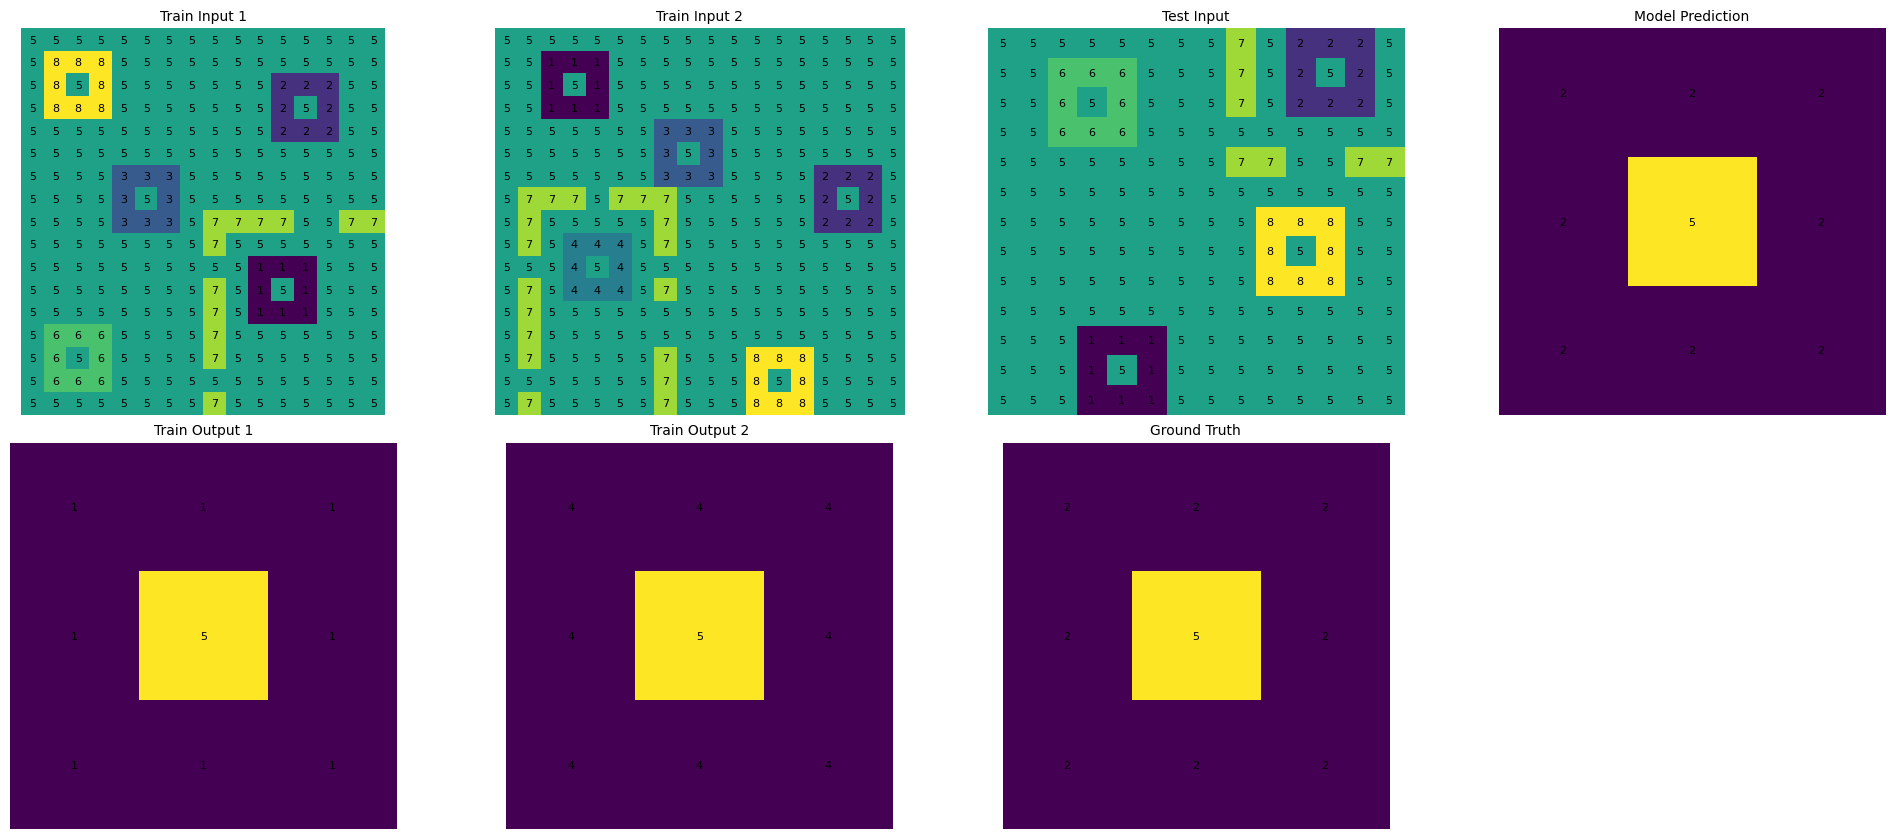


Visualizing Entry 16/24 (Key: c074846d)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output matrices have the same dimension. Values: The input matrix has a value 5 in one position and 2 in 3 positions. Changed Values: The 2s are replaced by 3s in the output matrix.


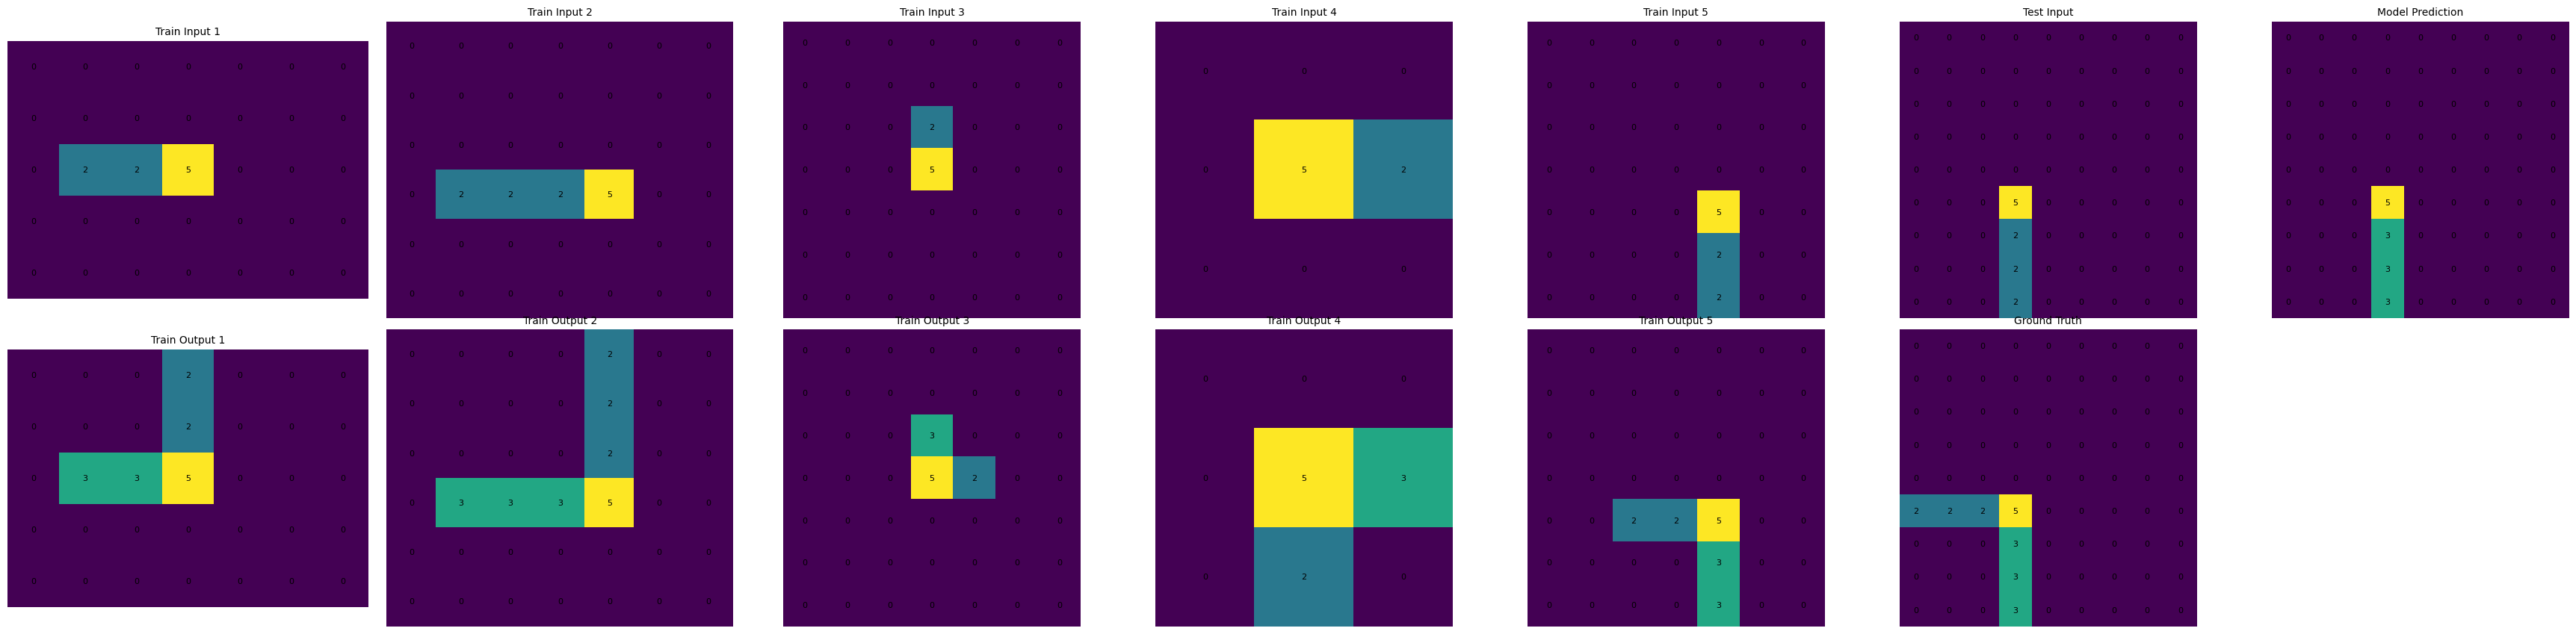


Visualizing Entry 17/24 (Key: ca8de6ea)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix is a 5 by 5 matrix. The output matrix is a 3 by 3 matrix. The output matrix is formed by taking the middle row of the input matrix and the middle column of the input matrix. The middle row is the row with the value 6 and the middle column is the column with the value 6. The output matrix is then filled with the values of the middle row and the middle column. Dimension: The input matrix is 5 by 5 and the output matrix is 3 by 3. Values: The values in the input matrix are 1, 2, 3, 4, 5, 6 and 7. Changed values: The values in the input matrix are not changed but the values of the middle row and the middle column are used to form the output matrix.


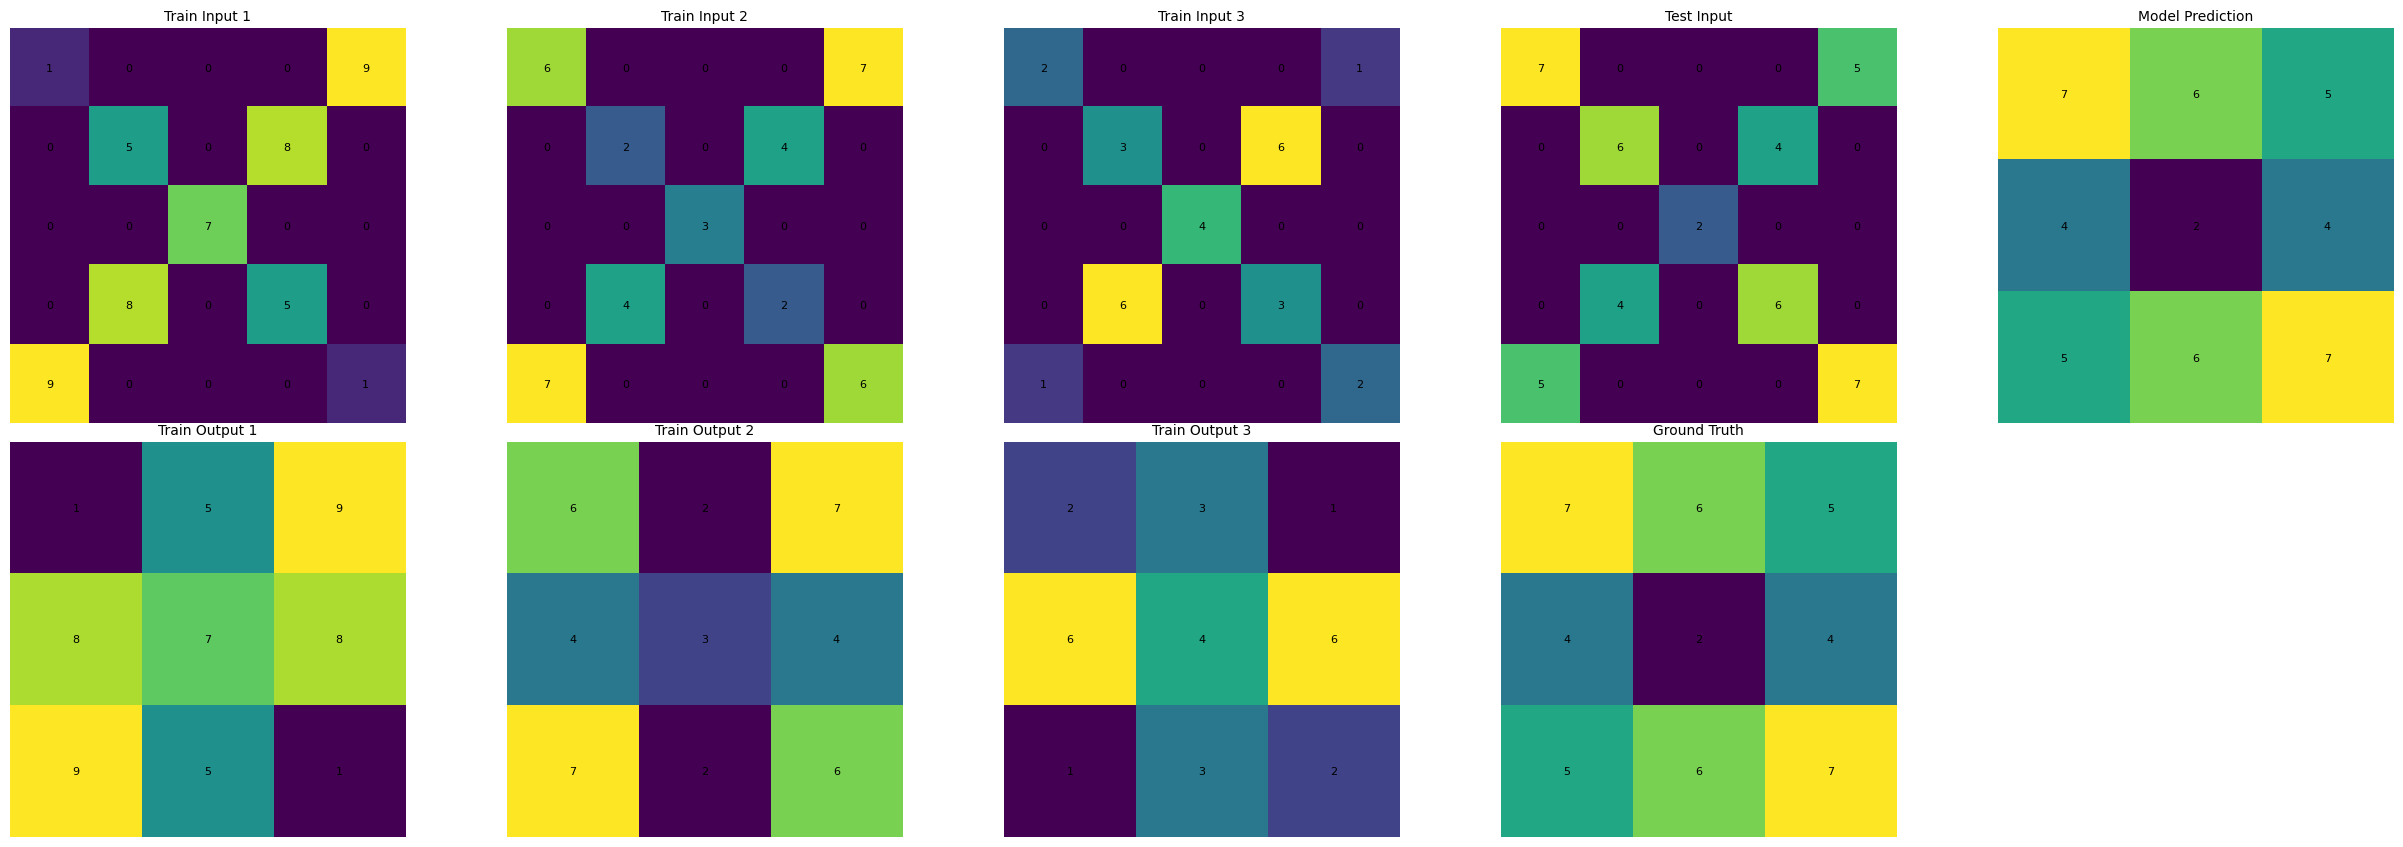


Visualizing Entry 18/24 (Key: ce039d91)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains several non-zero values arranged in a grid-like structure. The output matrix is created by replacing each non-zero value in the input matrix with a 1, effectively turning the non-zero values into a single, uniform structure. Dimensions: The input and output dimensions are the same. Values: The input matrix contains several non-zero values, while the output matrix contains only 1s and 0s. Changed Values: The non-zero values in the input matrix are replaced with 1s in the output matrix.


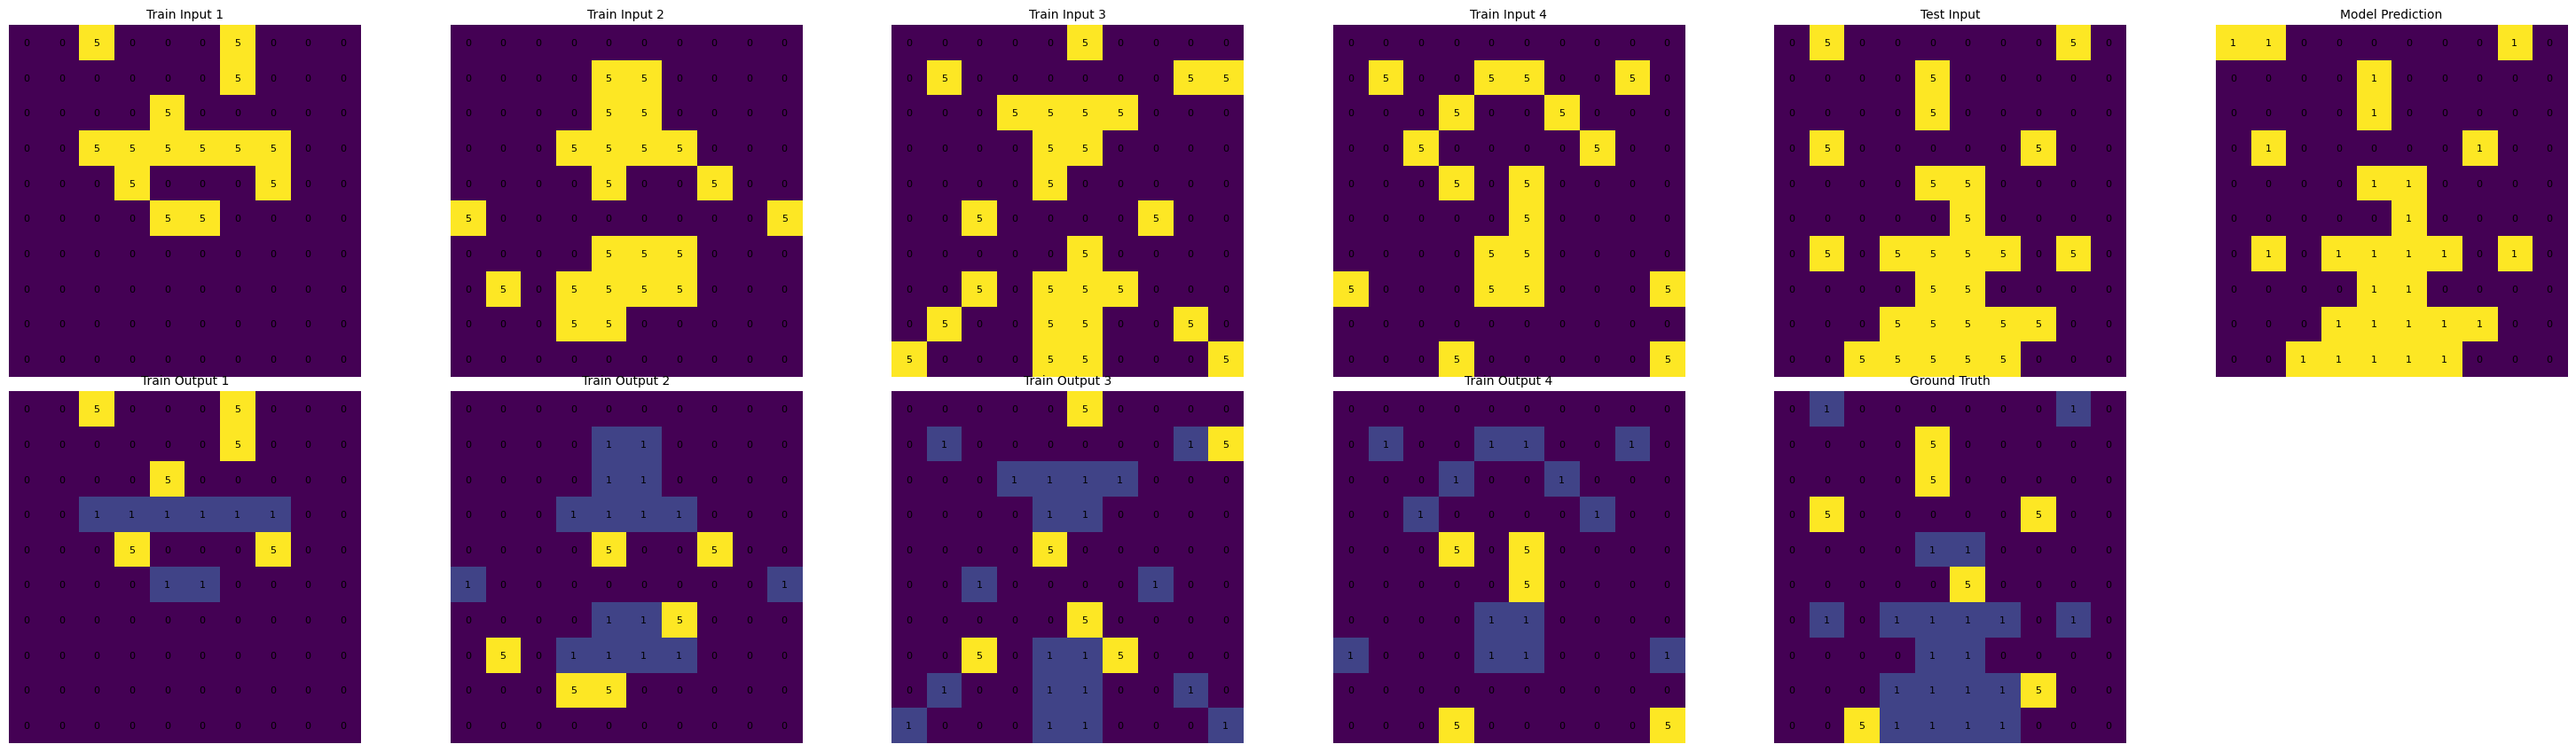


Visualizing Entry 19/24 (Key: da2b0fe3)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix contains only one non-zero value 2. Changed Values: The value 2 is replaced by 3 in the output matrix.


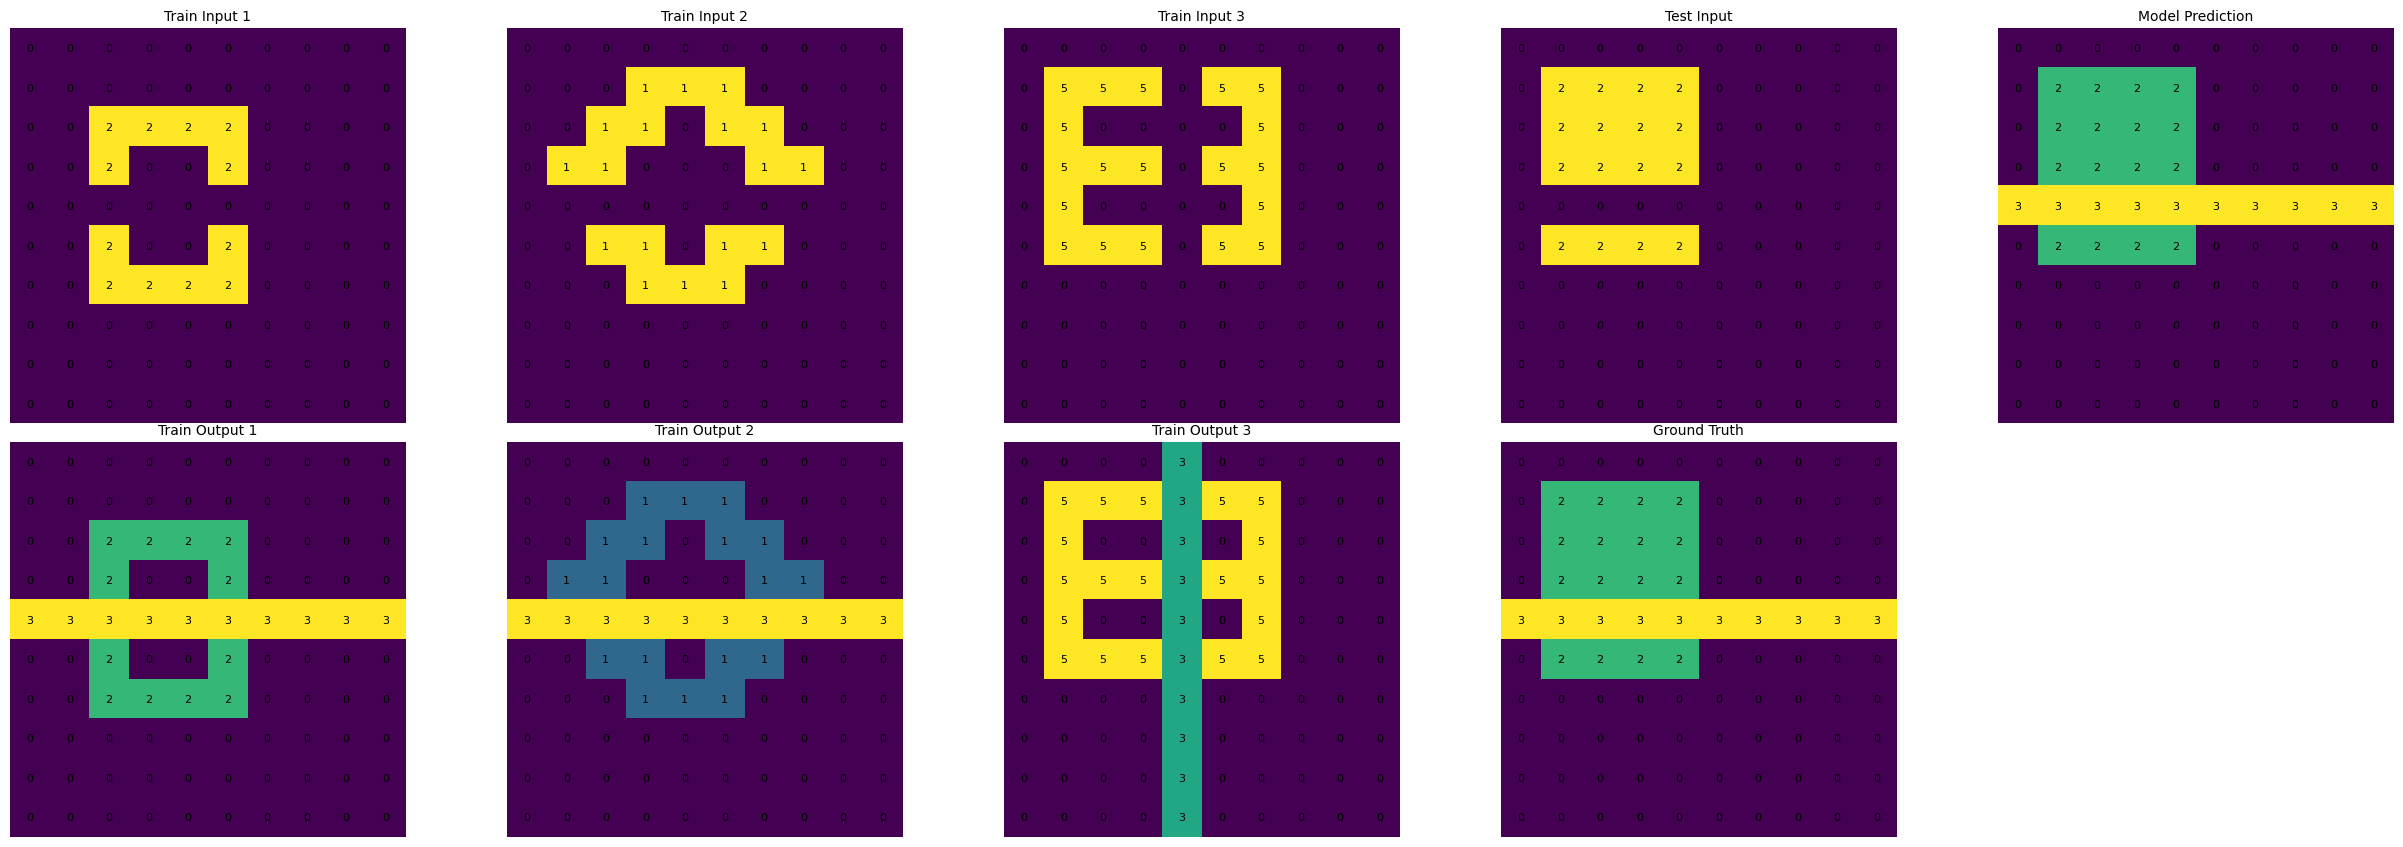


Visualizing Entry 20/24 (Key: dd2401ed)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Copy the input matrix and change the value 5 to 0, while changing the value 2 to 5. Dimension: The input and output dimensions are the same. Values: The input matrix contains the values 0, 1, 2 and 5. Changed Values: Change the value 5 to 0 and the value 2 to 5.


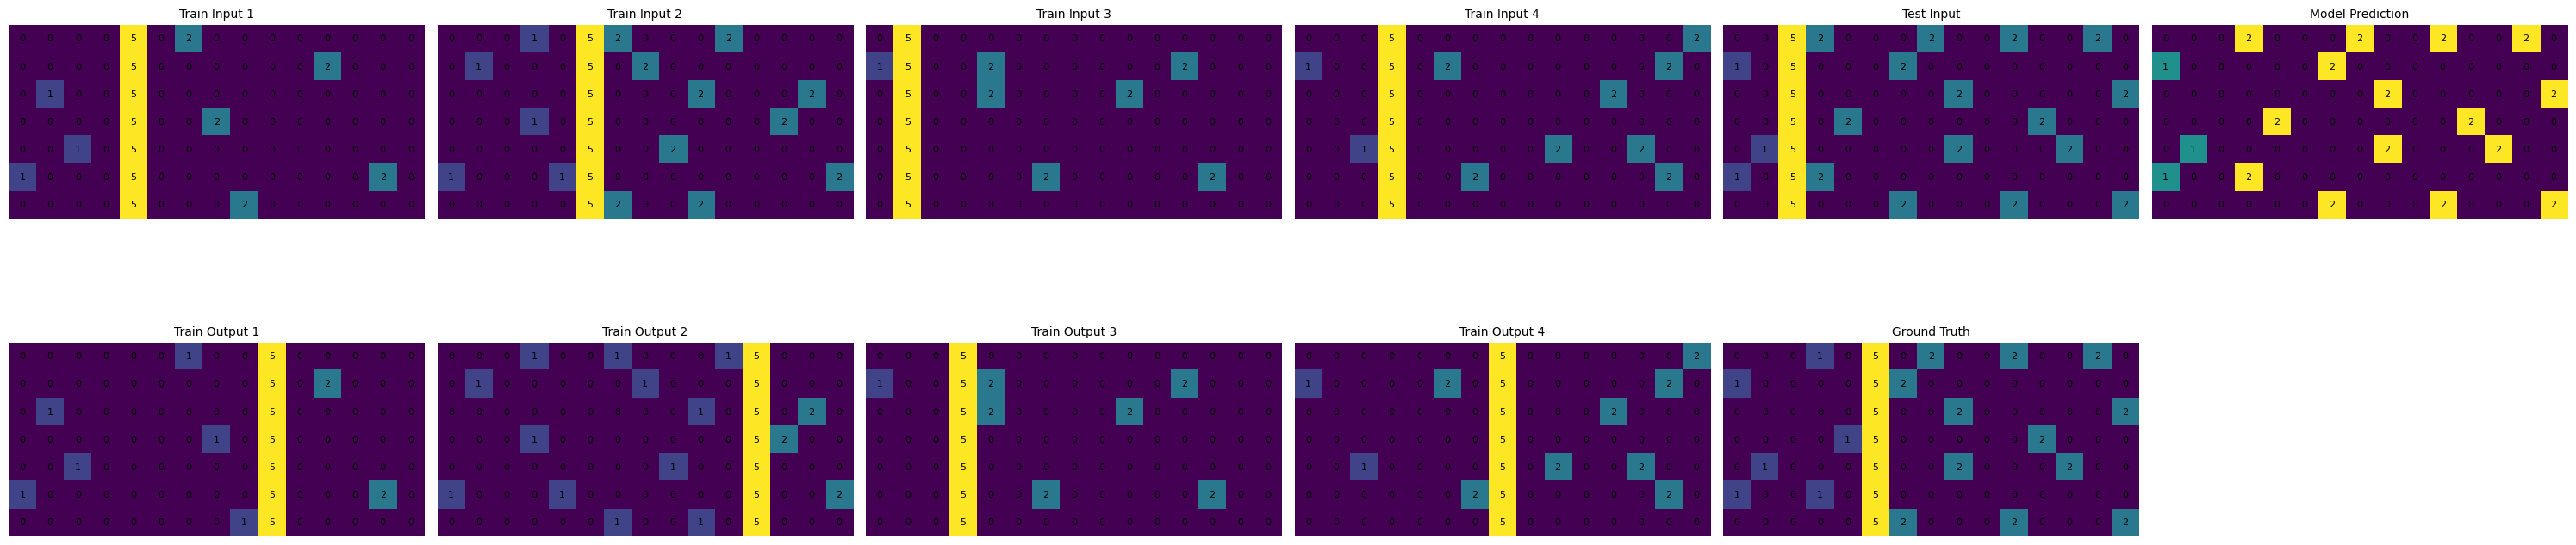


Visualizing Entry 21/24 (Key: e21a174a)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix has values 4, 5, and 6 and the output matrix has values 5 and 6. Changed values: The value 4 in the input matrix is replaced by 5 in the output matrix.


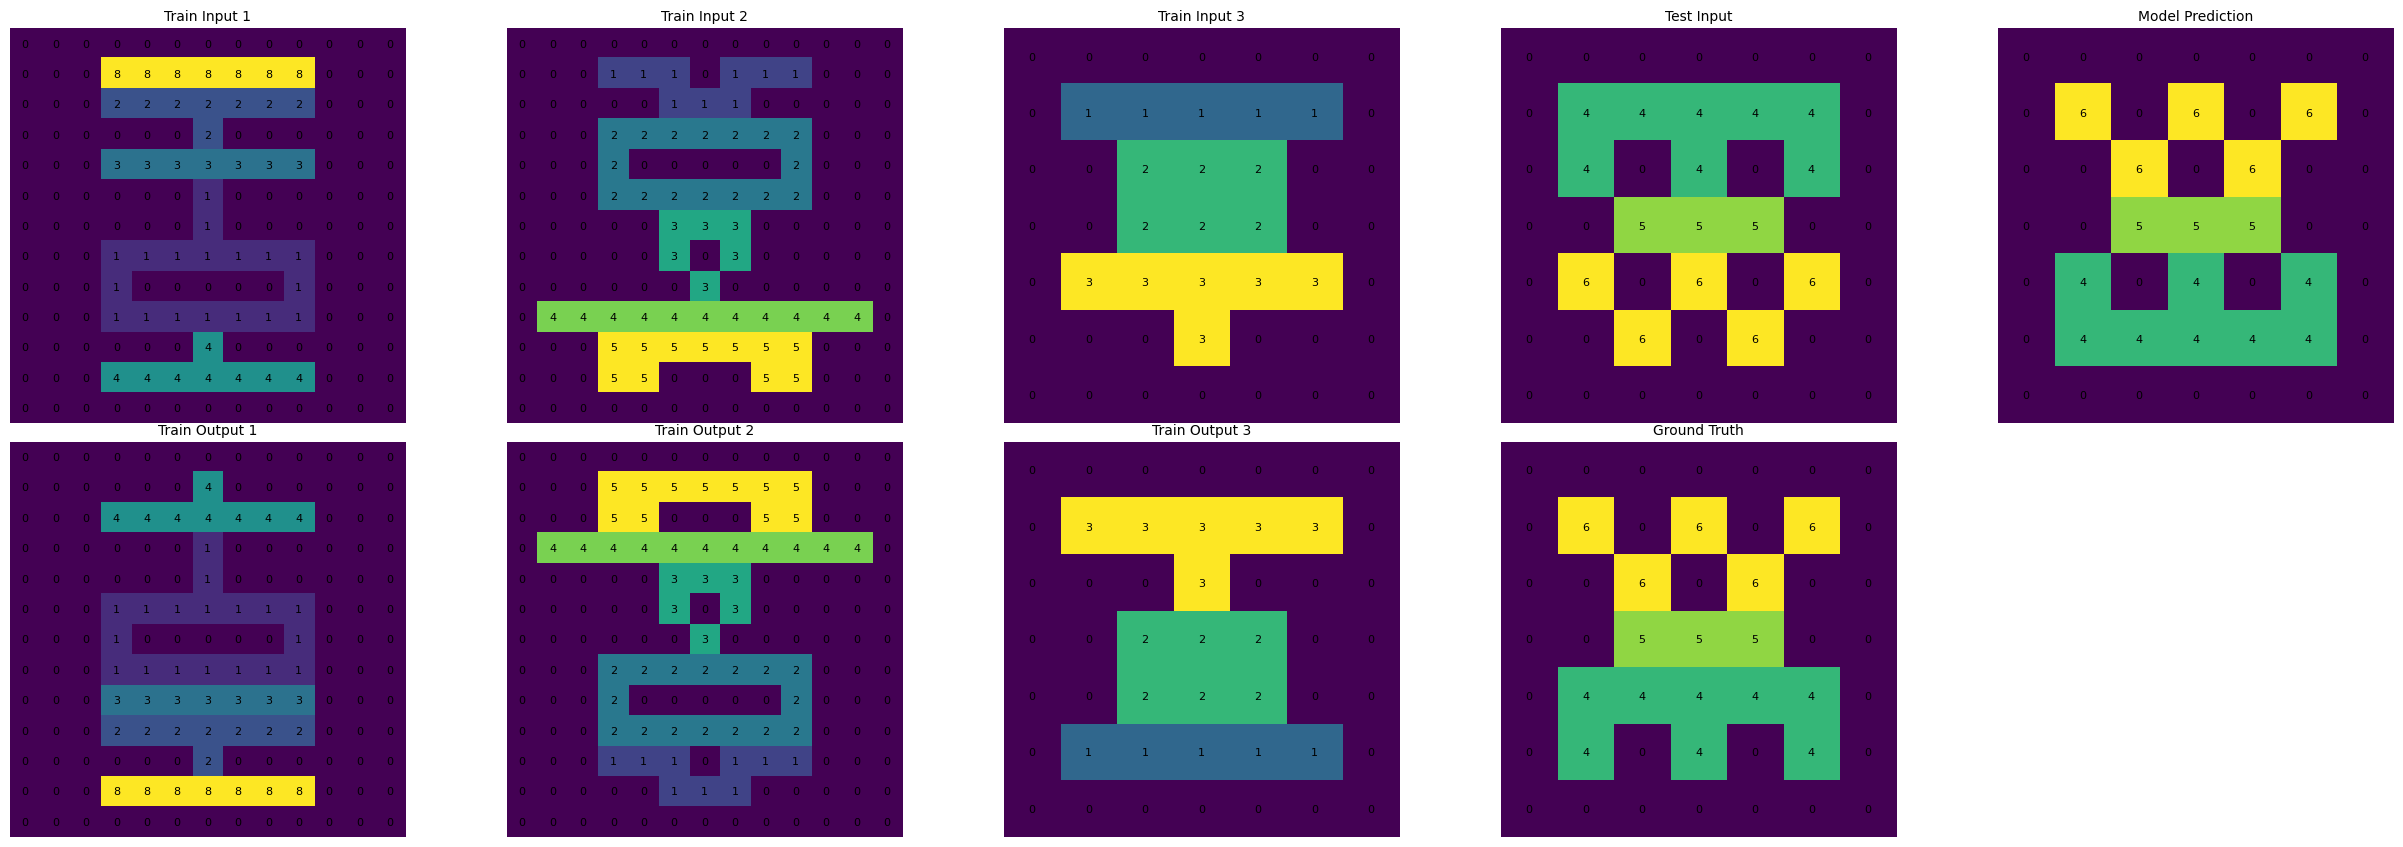


Visualizing Entry 22/24 (Key: e5c44e8f)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output matrices have the same dimension. Values: The input matrix has values 0 and 2, and the output matrix has values 0 and 3. Changed values: Values 2 in the input matrix are replaced with 3 in the output matrix following the logic.


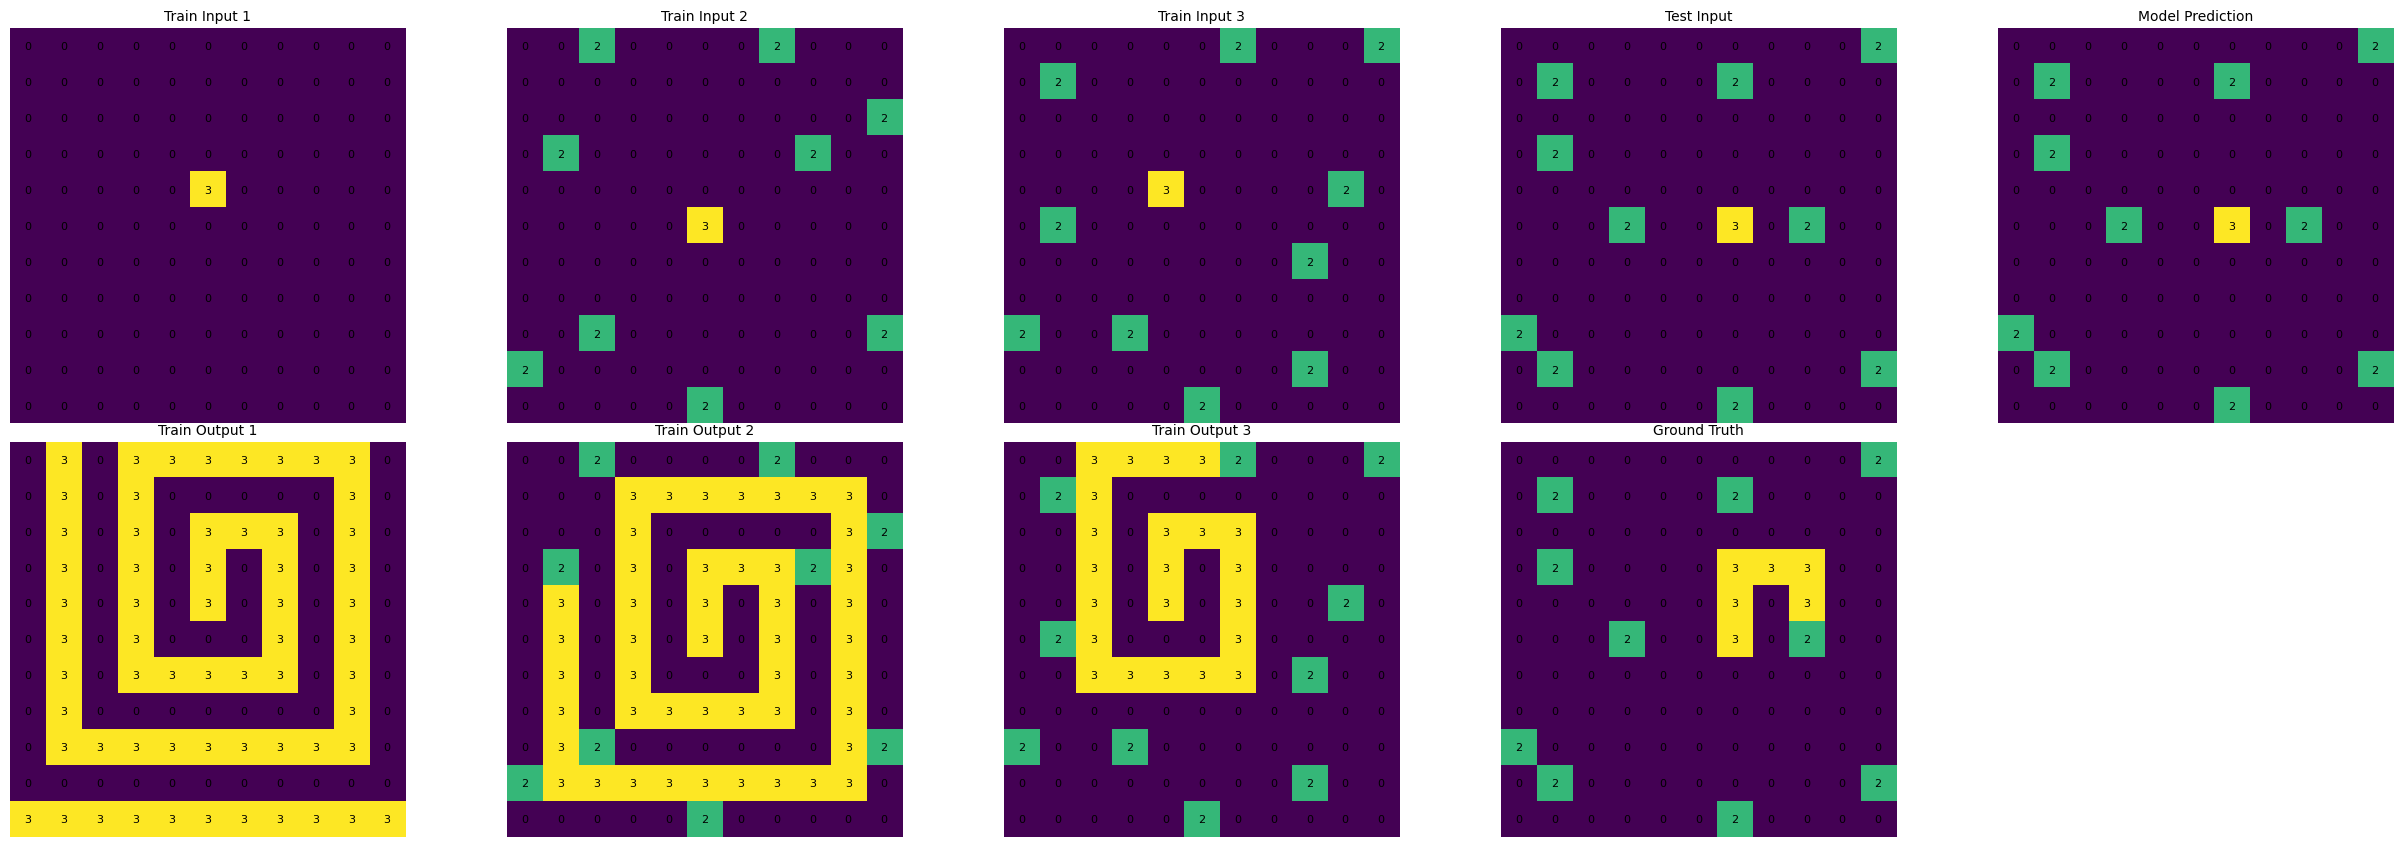


Visualizing Entry 23/24 (Key: e7dd8335)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix has a single non-zero value 1 and the output matrix has two non-zero values 1 and 2. Changed Values: The value 1 is replaced by 2 in the output matrix.


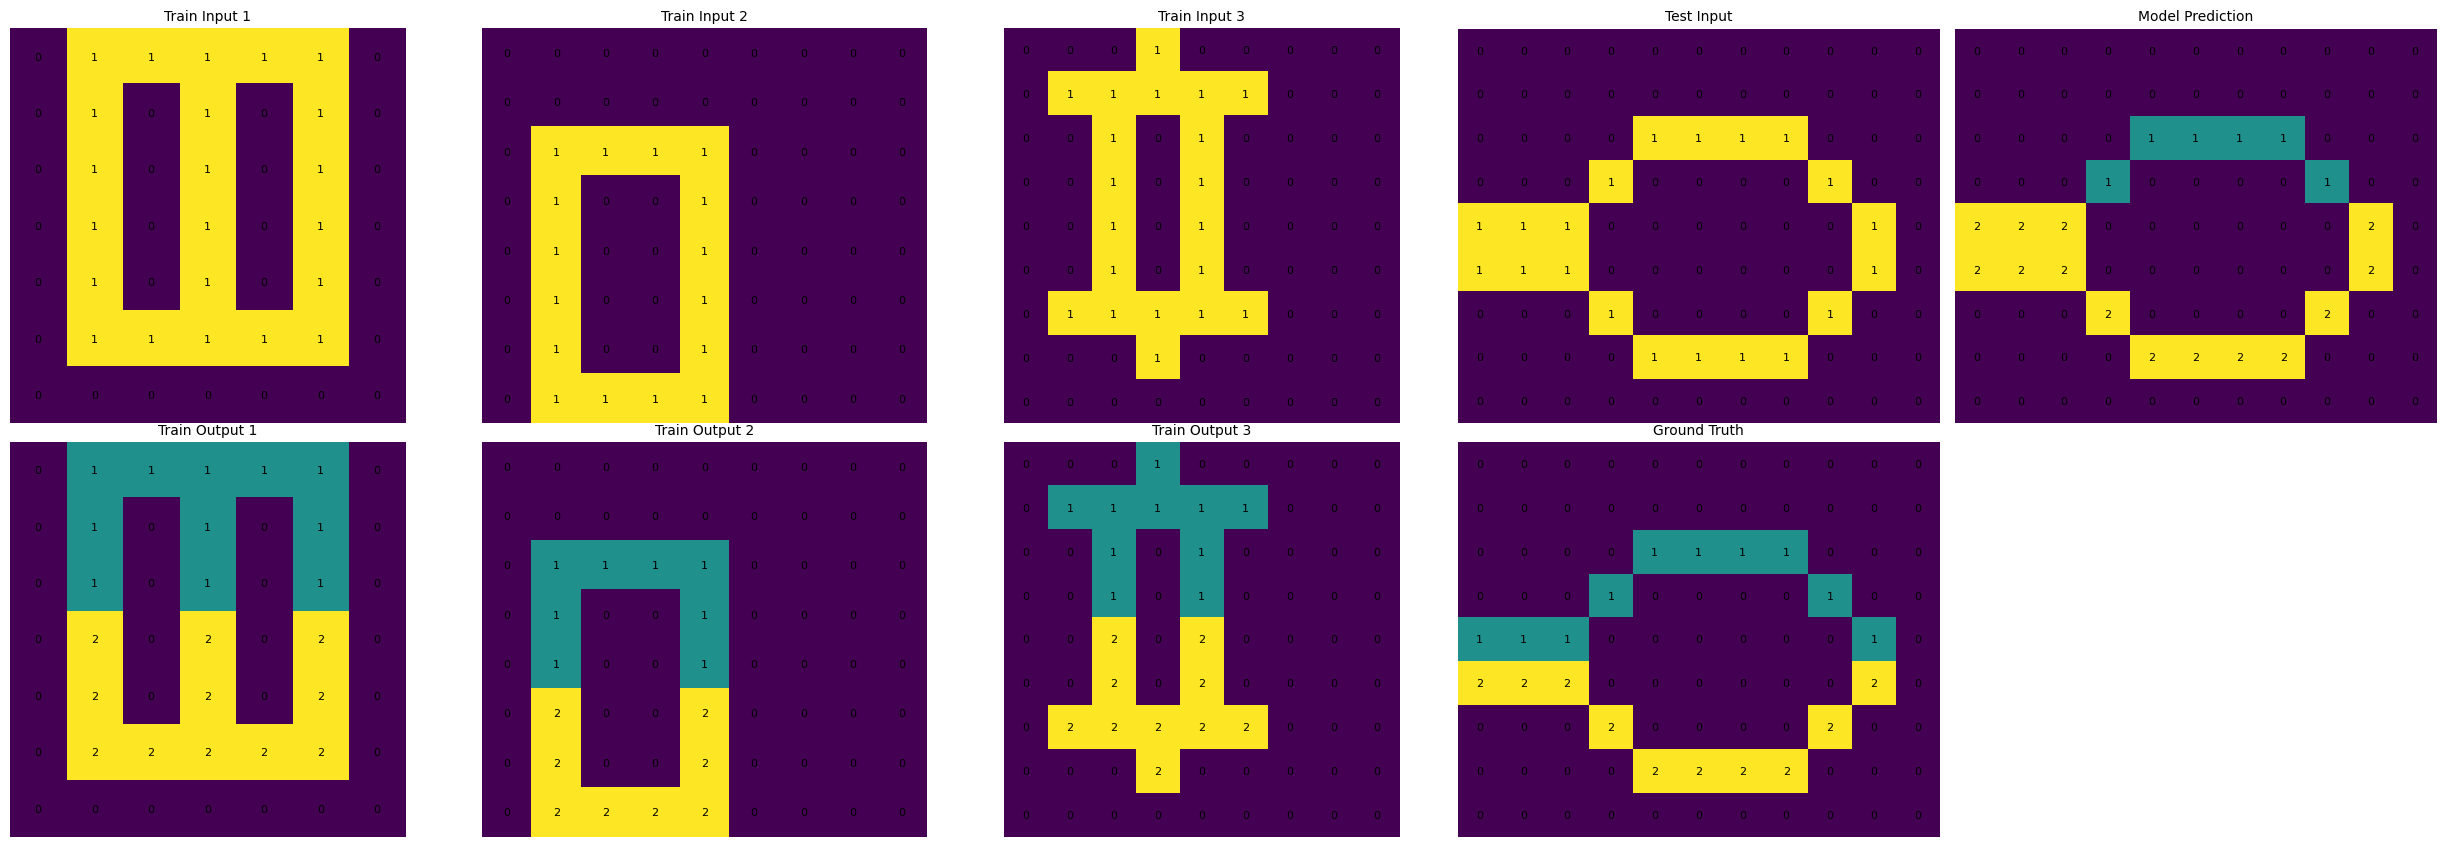


Visualizing Entry 24/24 (Key: f45f5ca7)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains two non-zero values, 2 and 4, arranged in a diagonal pattern. The output matrix is created by rotating the input matrix 90 degrees clockwise, such that the non-zero values now form a diagonal pattern from the top-right to the bottom-left corner. Dimensions: The input and output dimensions are the same. Values: The input matrix contains two non-zero values, 2 and 4. Changed Values: No values are changed, the matrix is simply rotated.


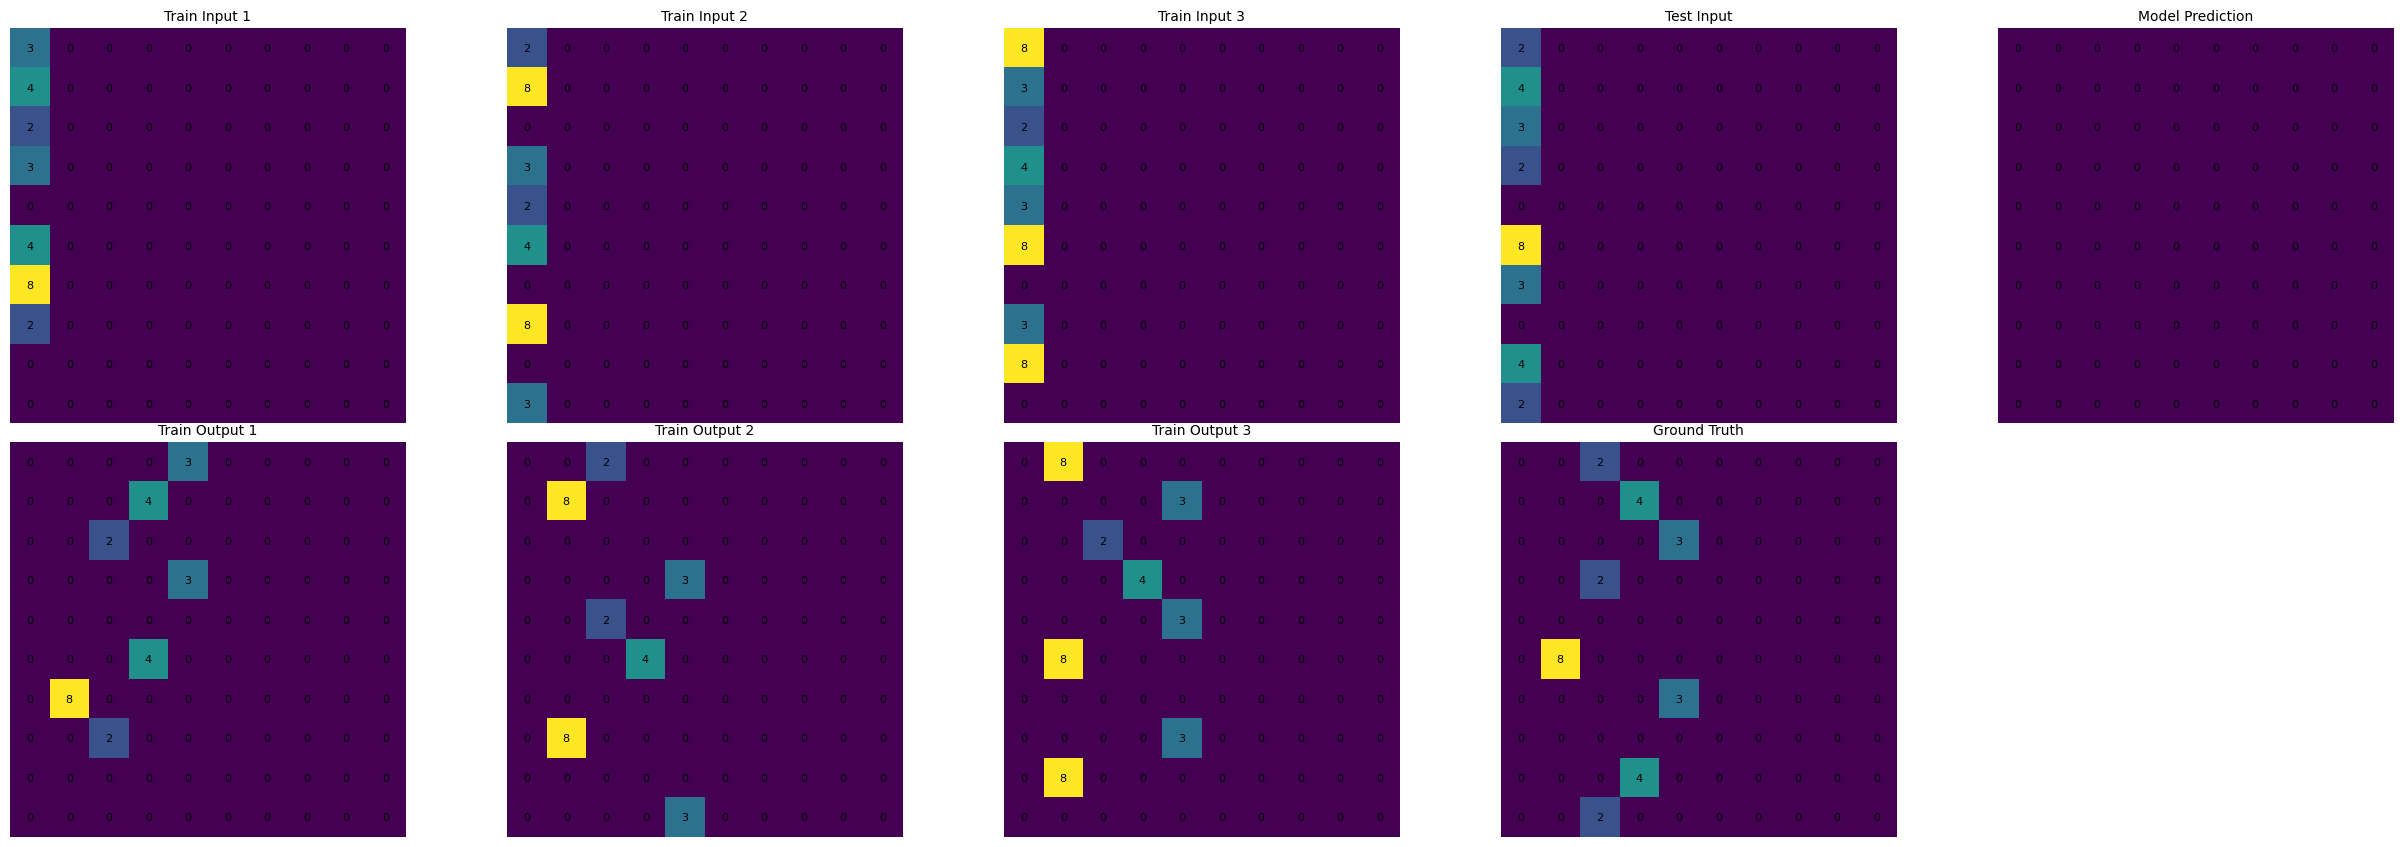

In [116]:
import json
import numpy as np

# Load the evaluation solutions file
evaluation_solutions_file = r"C:\Users\U10093022\Downloads\arc-prize-2024 (1)\arc-agi_evaluation_solutions.json"
with open(evaluation_solutions_file, 'r') as f:
    evaluation_solutions = json.load(f)

# Load the predictions file
predictions_file = r"C:\Users\U10093022\OneDrive - BASF\Desktop\close_to_perfect_predictions_with_reasonings.json"
with open(predictions_file, 'r') as f:
    predictions_data = json.load(f)

# Load the challenges file
challenges_file = r"C:\Users\U10093022\Downloads\arc-prize-2024 (1)\arc-agi_evaluation_challenges.json"
with open(challenges_file, 'r') as f:
    challenges_data = json.load(f)

# Convert challenges_data into a dictionary for easy access
challenges_dict = challenges_data

def find_matching_key(ground_truth, evaluation_solutions):
    """
    Finds the matching key in the evaluation solutions file for the given ground truth matrix.
    """
    for key, solution_matrix in evaluation_solutions.items():
        # Convert solution_matrix to numpy array for comparison
        solution_matrix = np.array(solution_matrix[0])  # Extract the first (and only) matrix
        if np.array_equal(ground_truth, solution_matrix):
            return key
    return None

def visualize_all_close_predictions_fixed(predictions_data, challenges_dict, evaluation_solutions):
    """
    Visualizes all entries in the close predictions file by matching their ground truth matrices
    with the evaluation solutions file and fetching the correct challenge entry.
    """
    for idx, prediction_entry in enumerate(predictions_data):
        # Get the ground truth matrix from the prediction entry
        ground_truth = np.array(prediction_entry['ground_truth'])

        # Find the matching key from the evaluation solutions file
        matching_key = find_matching_key(ground_truth, evaluation_solutions)
        if not matching_key:
            print(f"Skipping Entry {idx + 1}: No matching key found for ground truth.")
            continue

        # Get the corresponding challenge entry
        challenge_entry = challenges_dict.get(matching_key)
        if not challenge_entry:
            print(f"Skipping Entry {idx + 1}: No challenge entry found for key {matching_key}.")
            continue

        # Visualize the entry
        print(f"\nVisualizing Entry {idx + 1}/{len(predictions_data)} (Key: {matching_key})")
        visualize_full_context_fixed(prediction_entry, challenge_entry)

# Run the visualization for all close predictions
visualize_all_close_predictions_fixed(predictions_data, challenges_dict, evaluation_solutions)



Visualizing Entry 1/20 (Key: 15696249)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix is copied and then extended in all directions (up, down, left, right) by one row and one column. The values of the extended rows and columns are set to 0.


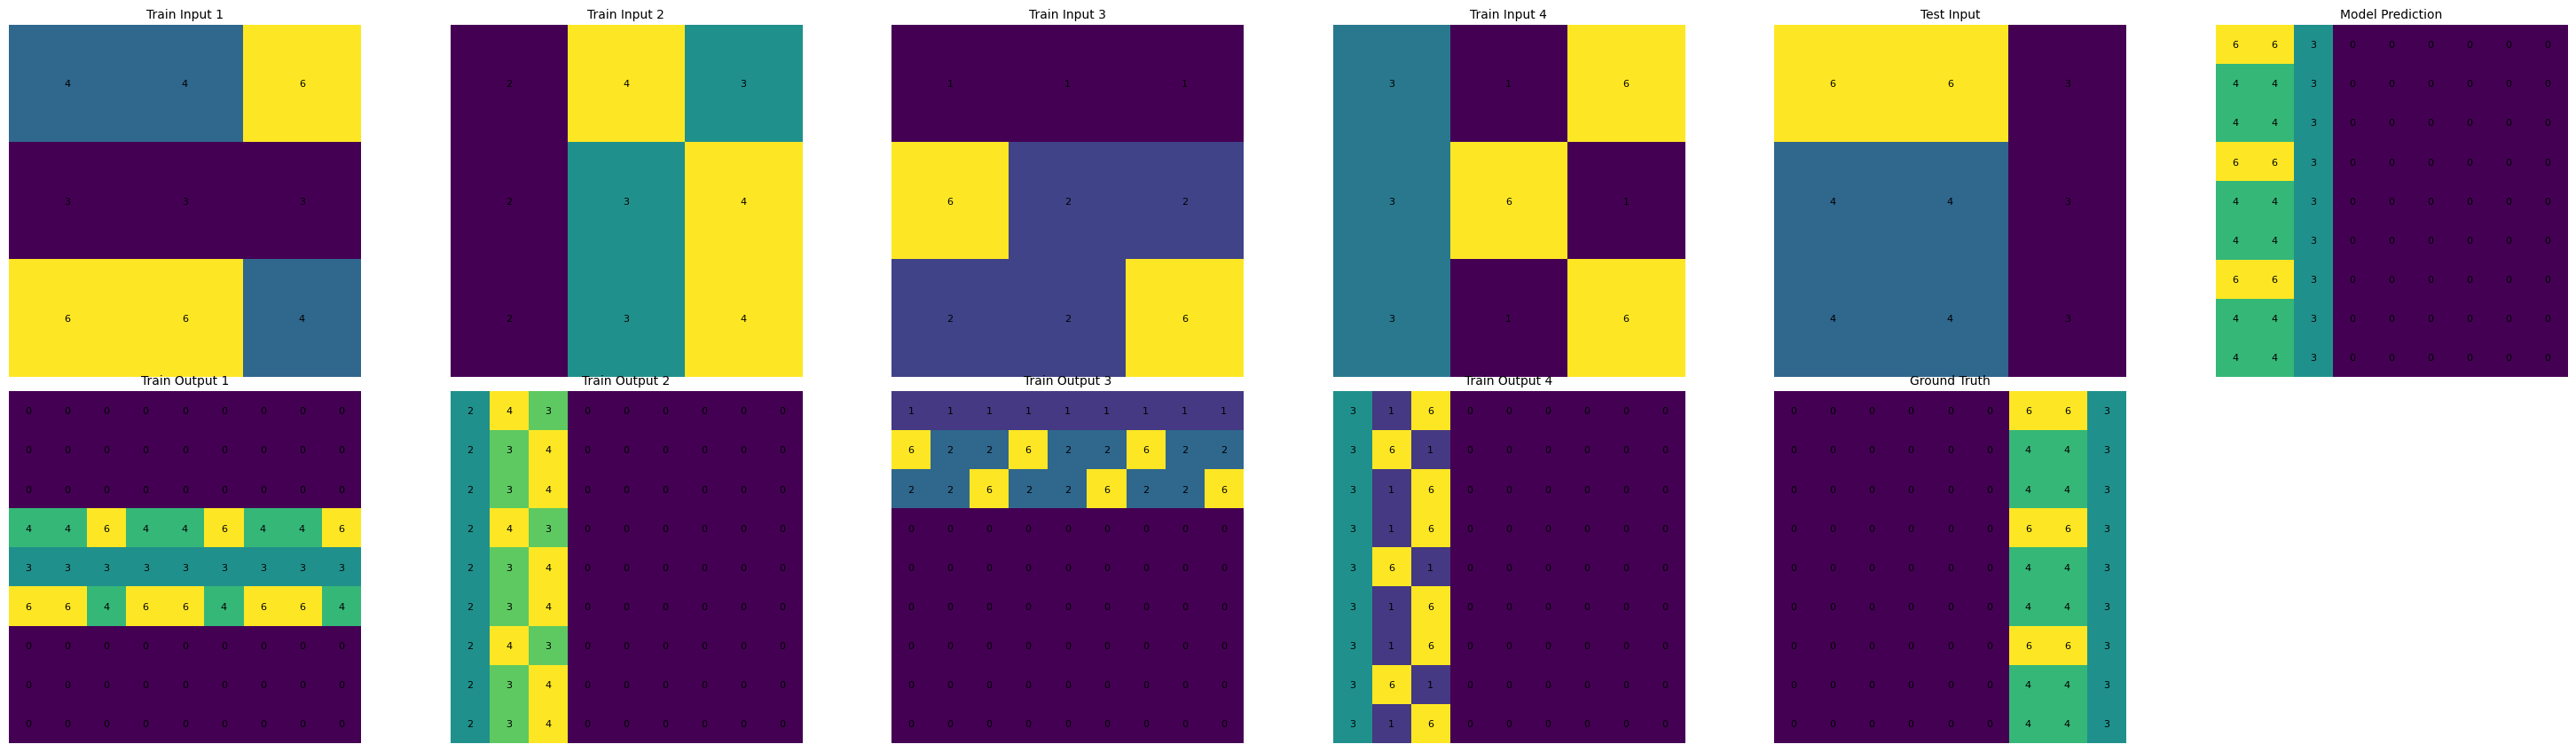


Visualizing Entry 2/20 (Key: 1990f7a8)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains three non-zero values, 2, 0, and 3, arranged in a specific pattern. The output matrix is a 7 by 7 matrix, with 3 being the dominant value. The 2s are positioned such that they form the frame of a 3 by 3 square, and the 0s are positioned to fill the remaining cells in the 7 by 7 matrix. Dimension: The input matrix has dimensions 17 by 17 and the output matrix has dimensions 7 by 7. Values: The input matrix contains the values 0, 2, and 3. Changed Values: The 0s are replaced by 3s to form the output matrix.


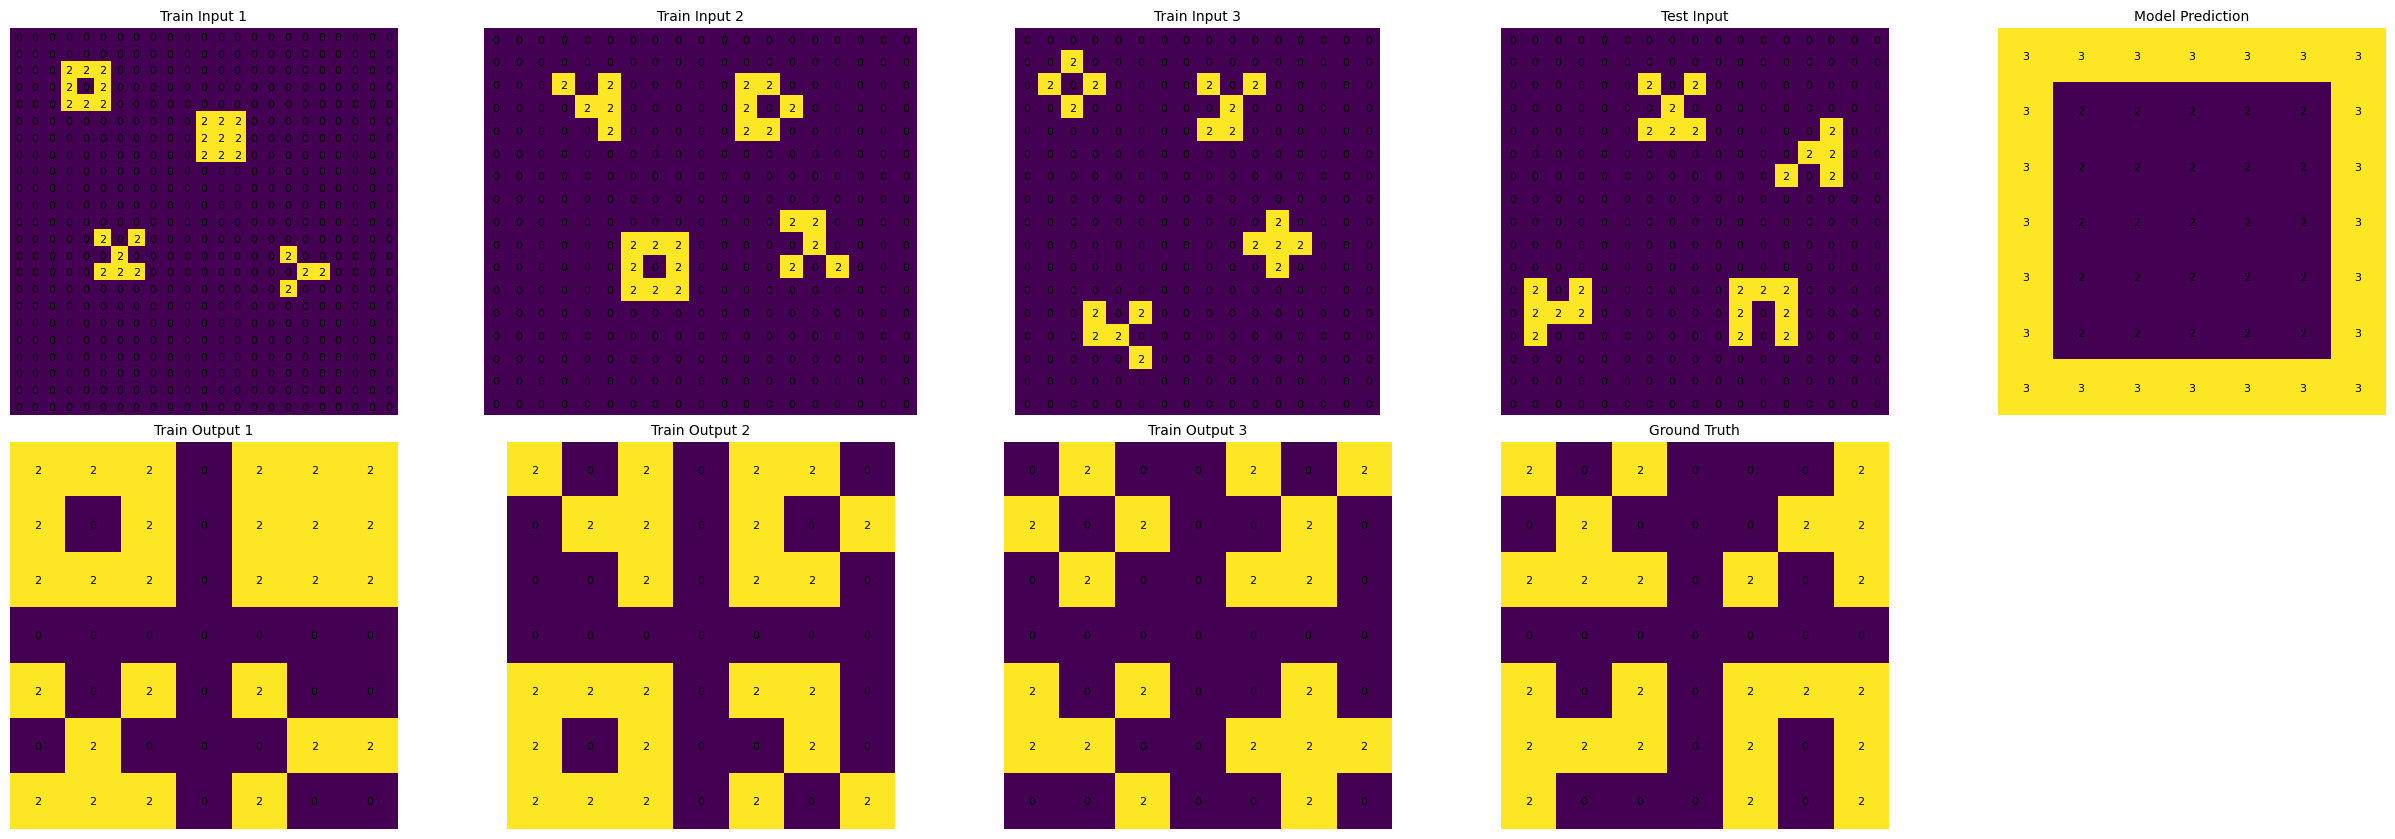


Visualizing Entry 3/20 (Key: 27f8ce4f)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. In this case, the input matrix is copied and then each non-zero value is replicated in a 3x3 matrix, with the resulting matrices being arranged in a 4x4 matrix. Dimensions: The output matrix has dimensions 4x4. Values: The output matrix has the same non-zero values as the input matrix, with the values being replicated in 3x3 matrices. Changed values: There are no changed values, the output matrix is created by copying the input matrix and then replicating each non-zero value in a 3x3 matrix.


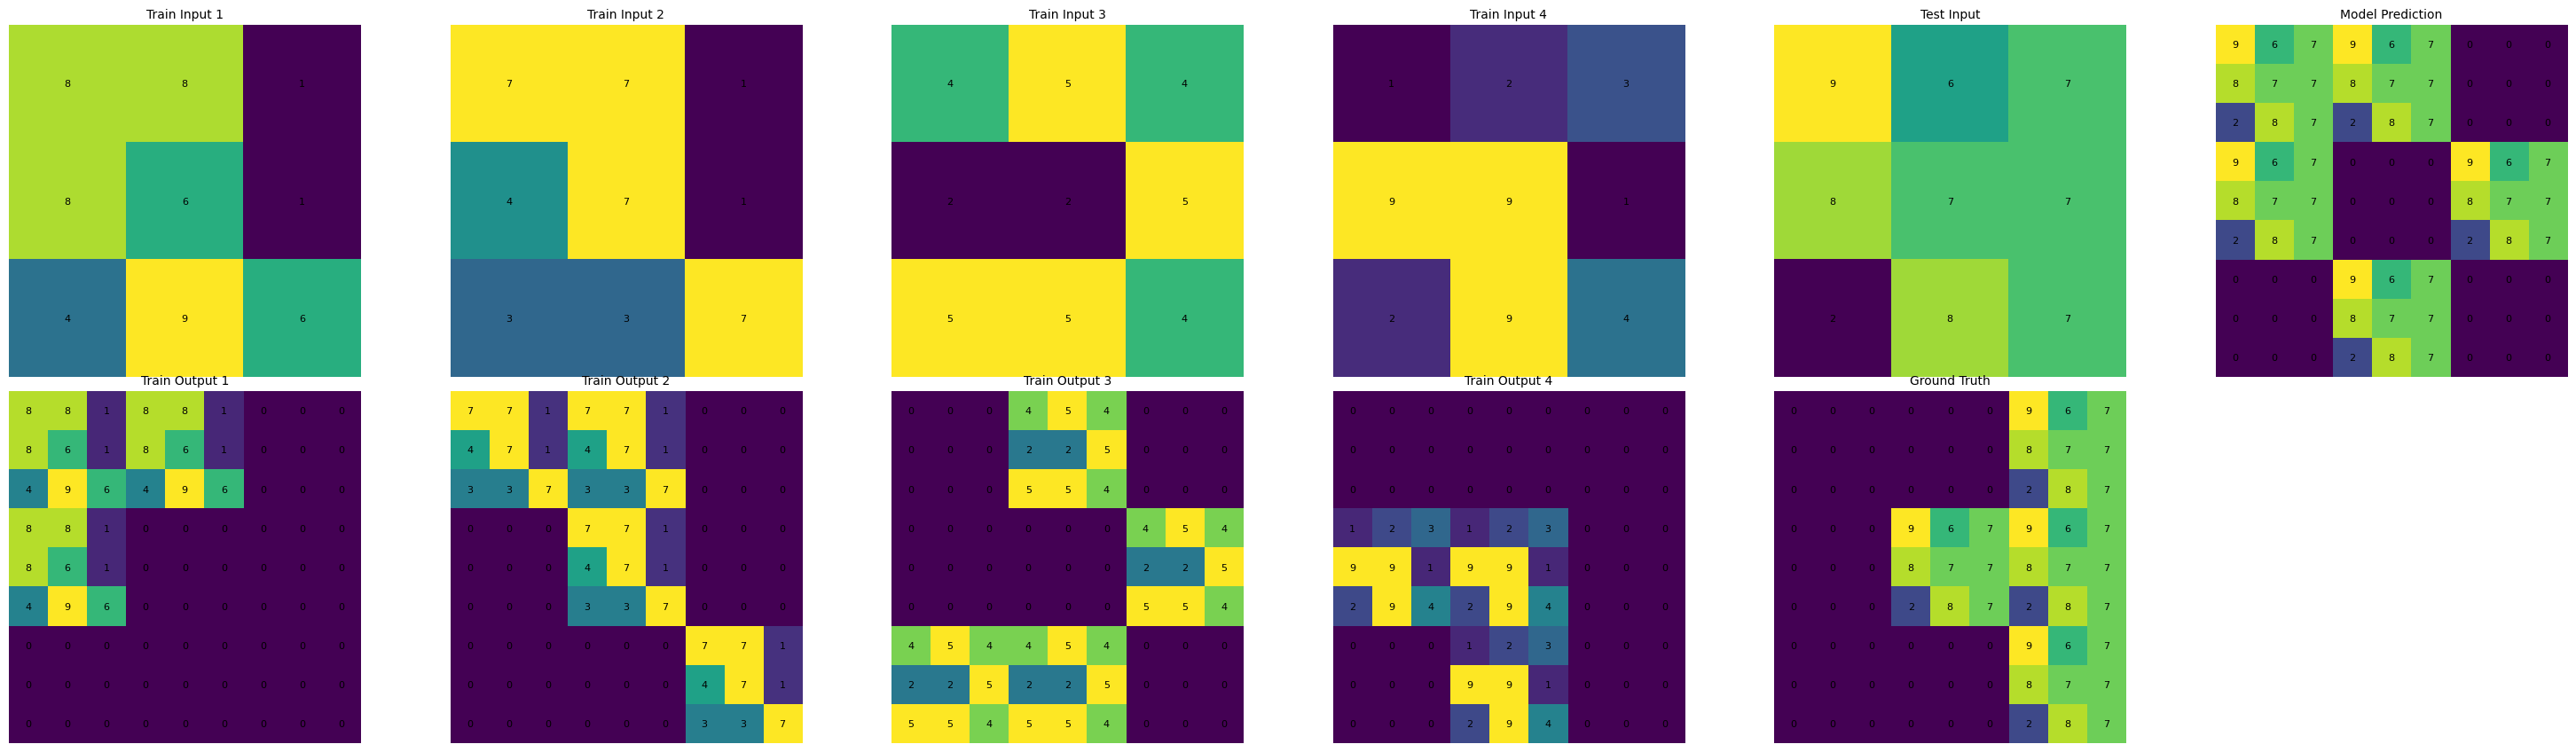


Visualizing Entry 4/20 (Key: 281123b4)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains a non-zero value (8) and a non-zero value (3) arranged in a specific pattern. The output matrix is created by reversing the direction of the non-zero value (3) while keeping the non-zero value (8) in its original position. Dimensions: The input and output matrices have the same dimensions. Values: The input matrix contains two non-zero values (8 and 3) and a zero value. Changed Values: The non-zero value (3) is reversed in direction.


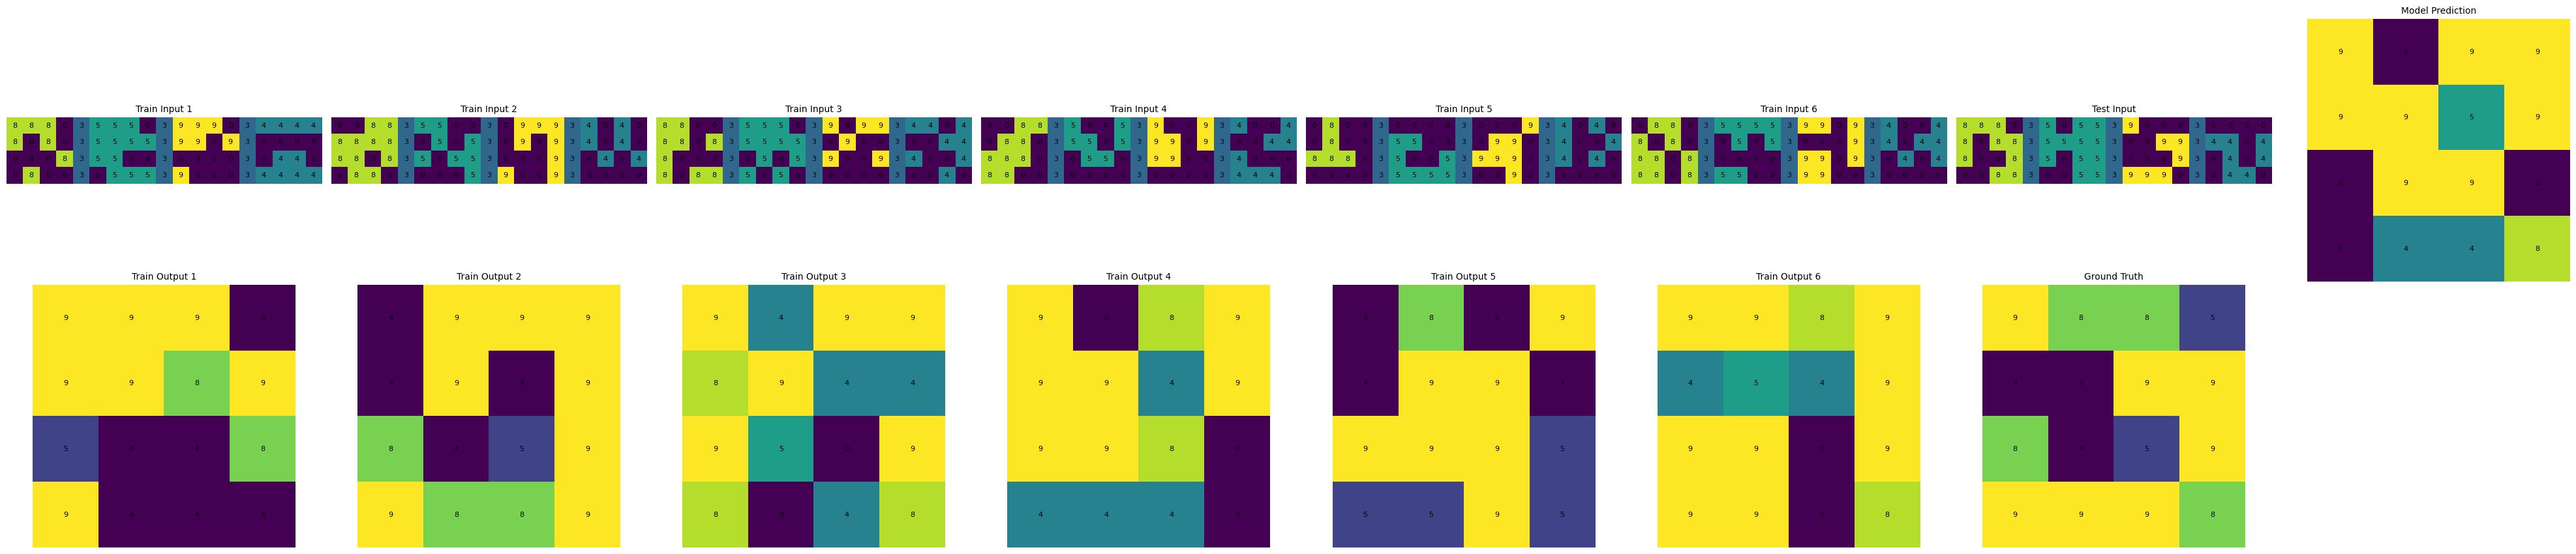


Visualizing Entry 5/20 (Key: 3ee1011a)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains a grid of non-zero values. The output matrix will have the same grid but with the non-zero values being arranged in a different order. Dimensions: The input and output dimensions are the same. Values: The input matrix has non-zero values 3, 7 and 6 and 8, the output matrix has the same non-zero values but arranged in a different order. Changed Values: There is no change in values but the arrangement of values is changed


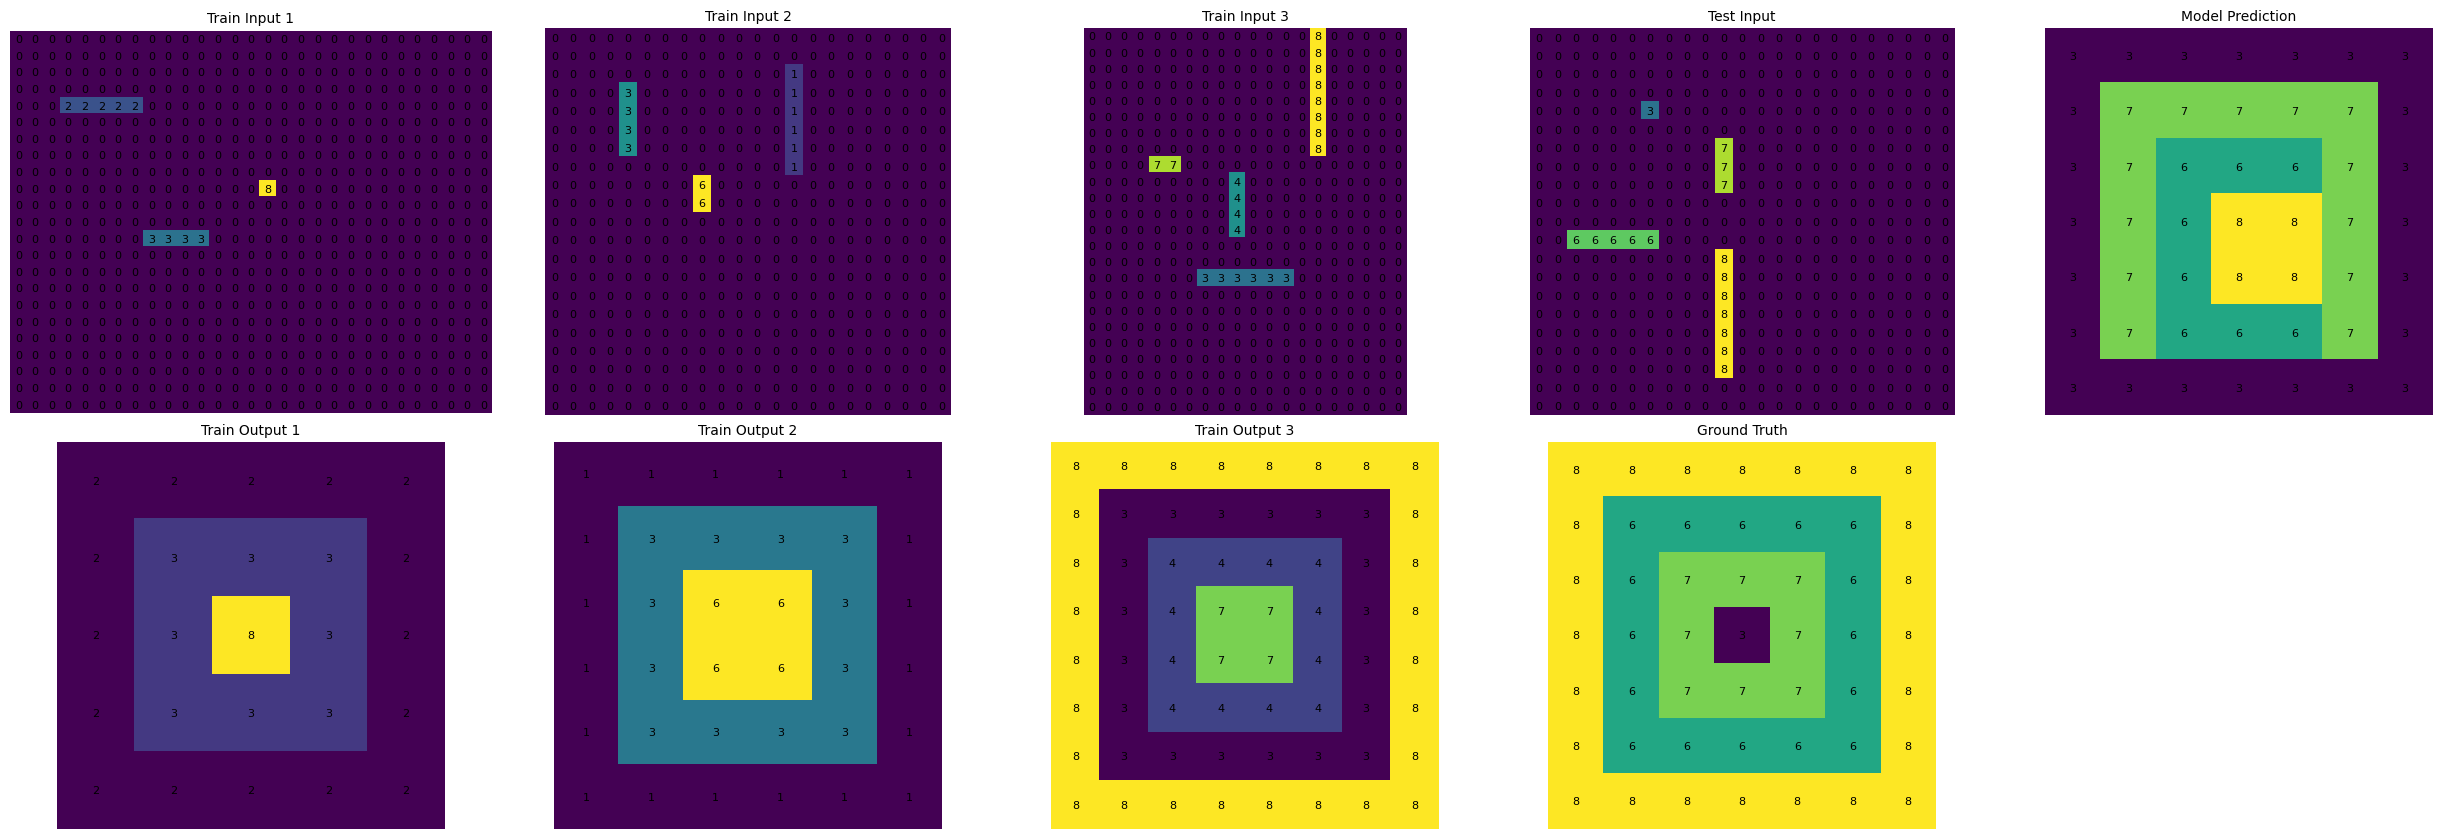


Visualizing Entry 6/20 (Key: 48131b3c)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: Input matrix contains 0 and 1. Changed Values: Values are not changed, the matrix is copied and then filled with 1s following the reasoning logic.


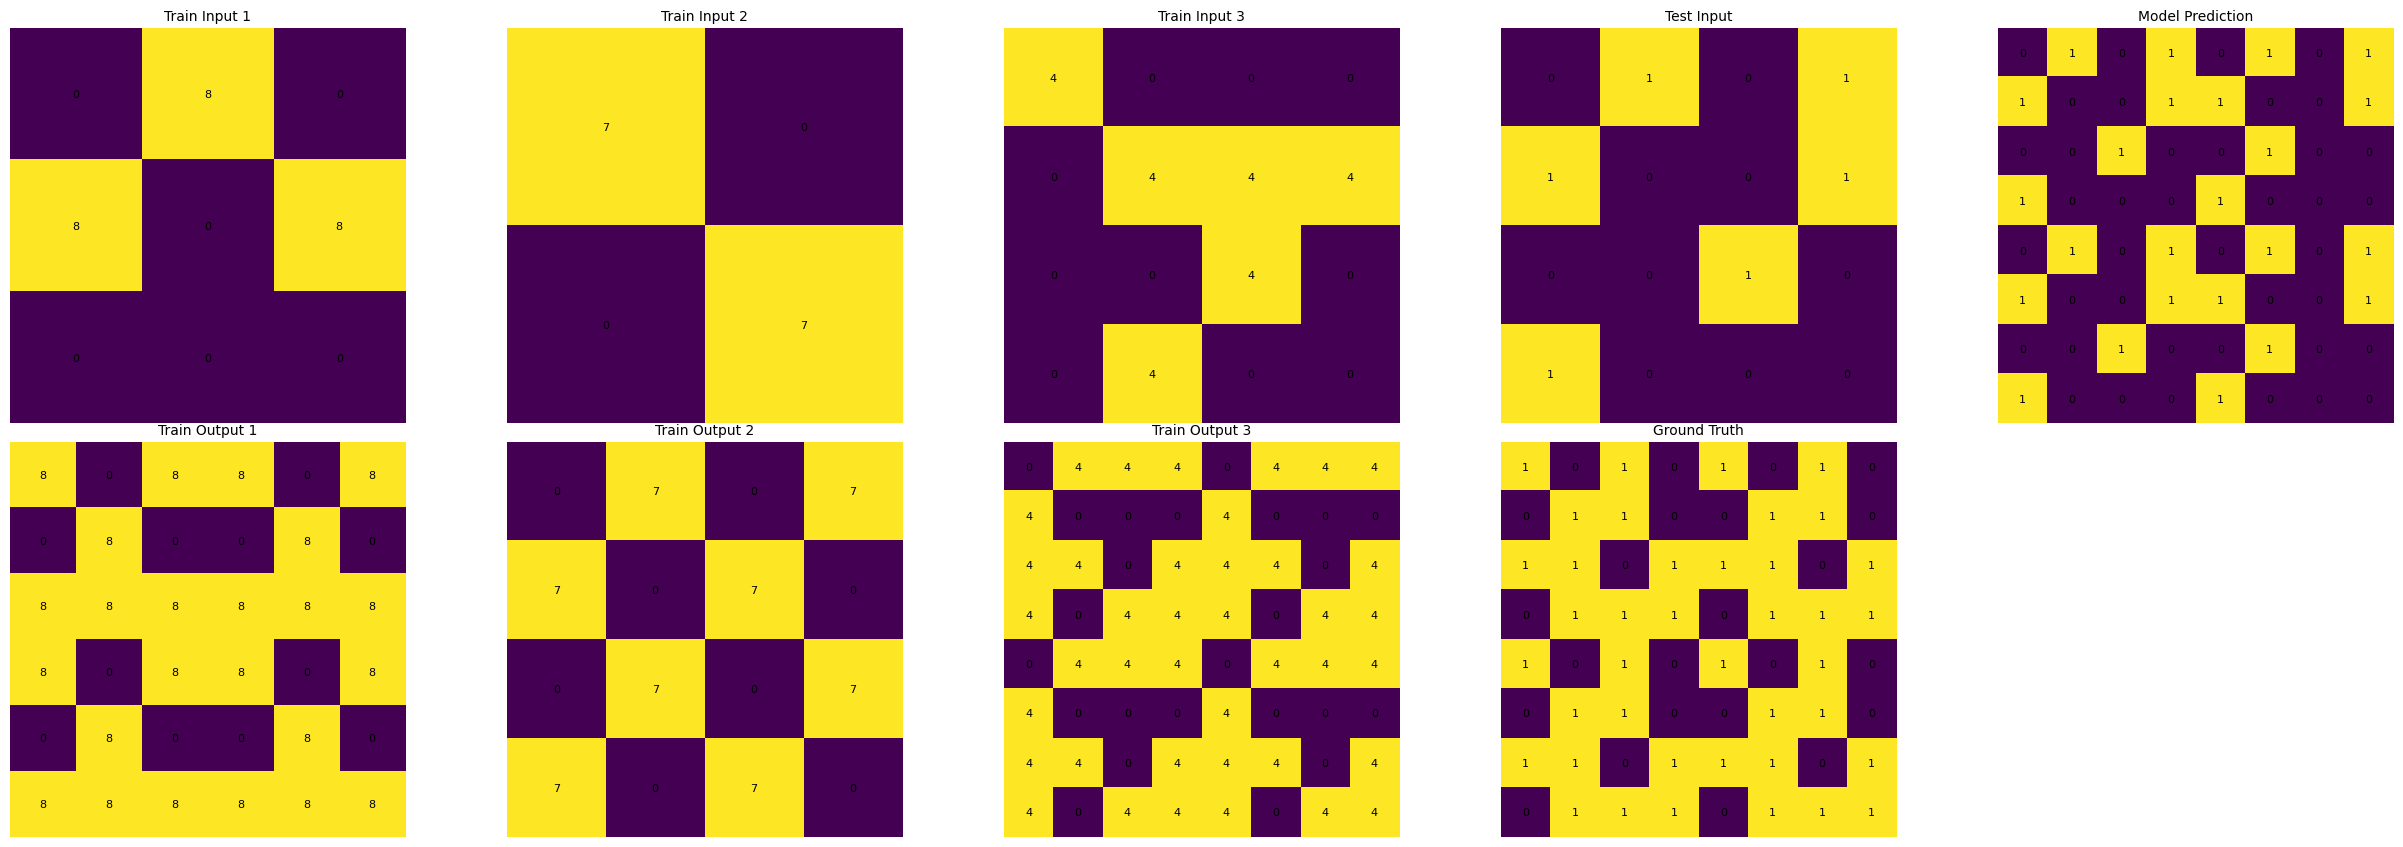


Visualizing Entry 7/20 (Key: 48f8583b)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The output matrix is 3 times the size of the input matrix. Values: Input matrix has the values 7, 9 and output matrix has the values 0 and the input matrix values. Changed Values: Values of the output matrix are 0 and the input matrix values.


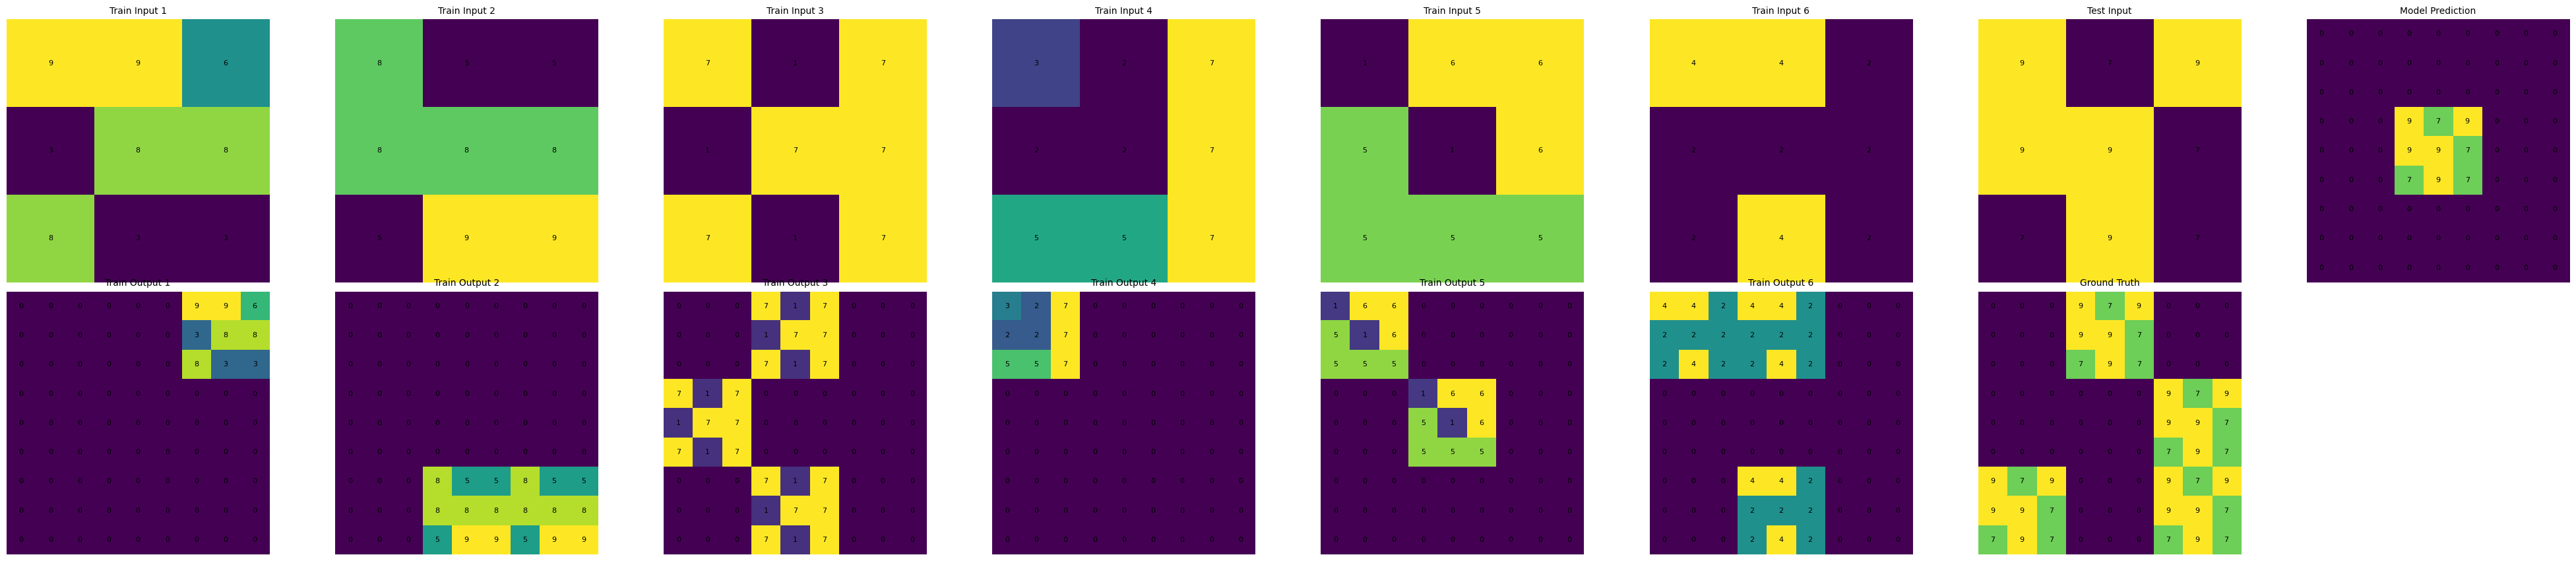


Visualizing Entry 8/20 (Key: 4cd1b7b2)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output dimensions are the same. Values: Input matrix contains 0s and 1-4. Changed Values: Values are not changed, but the positions are swapped according to the reasoning logic.


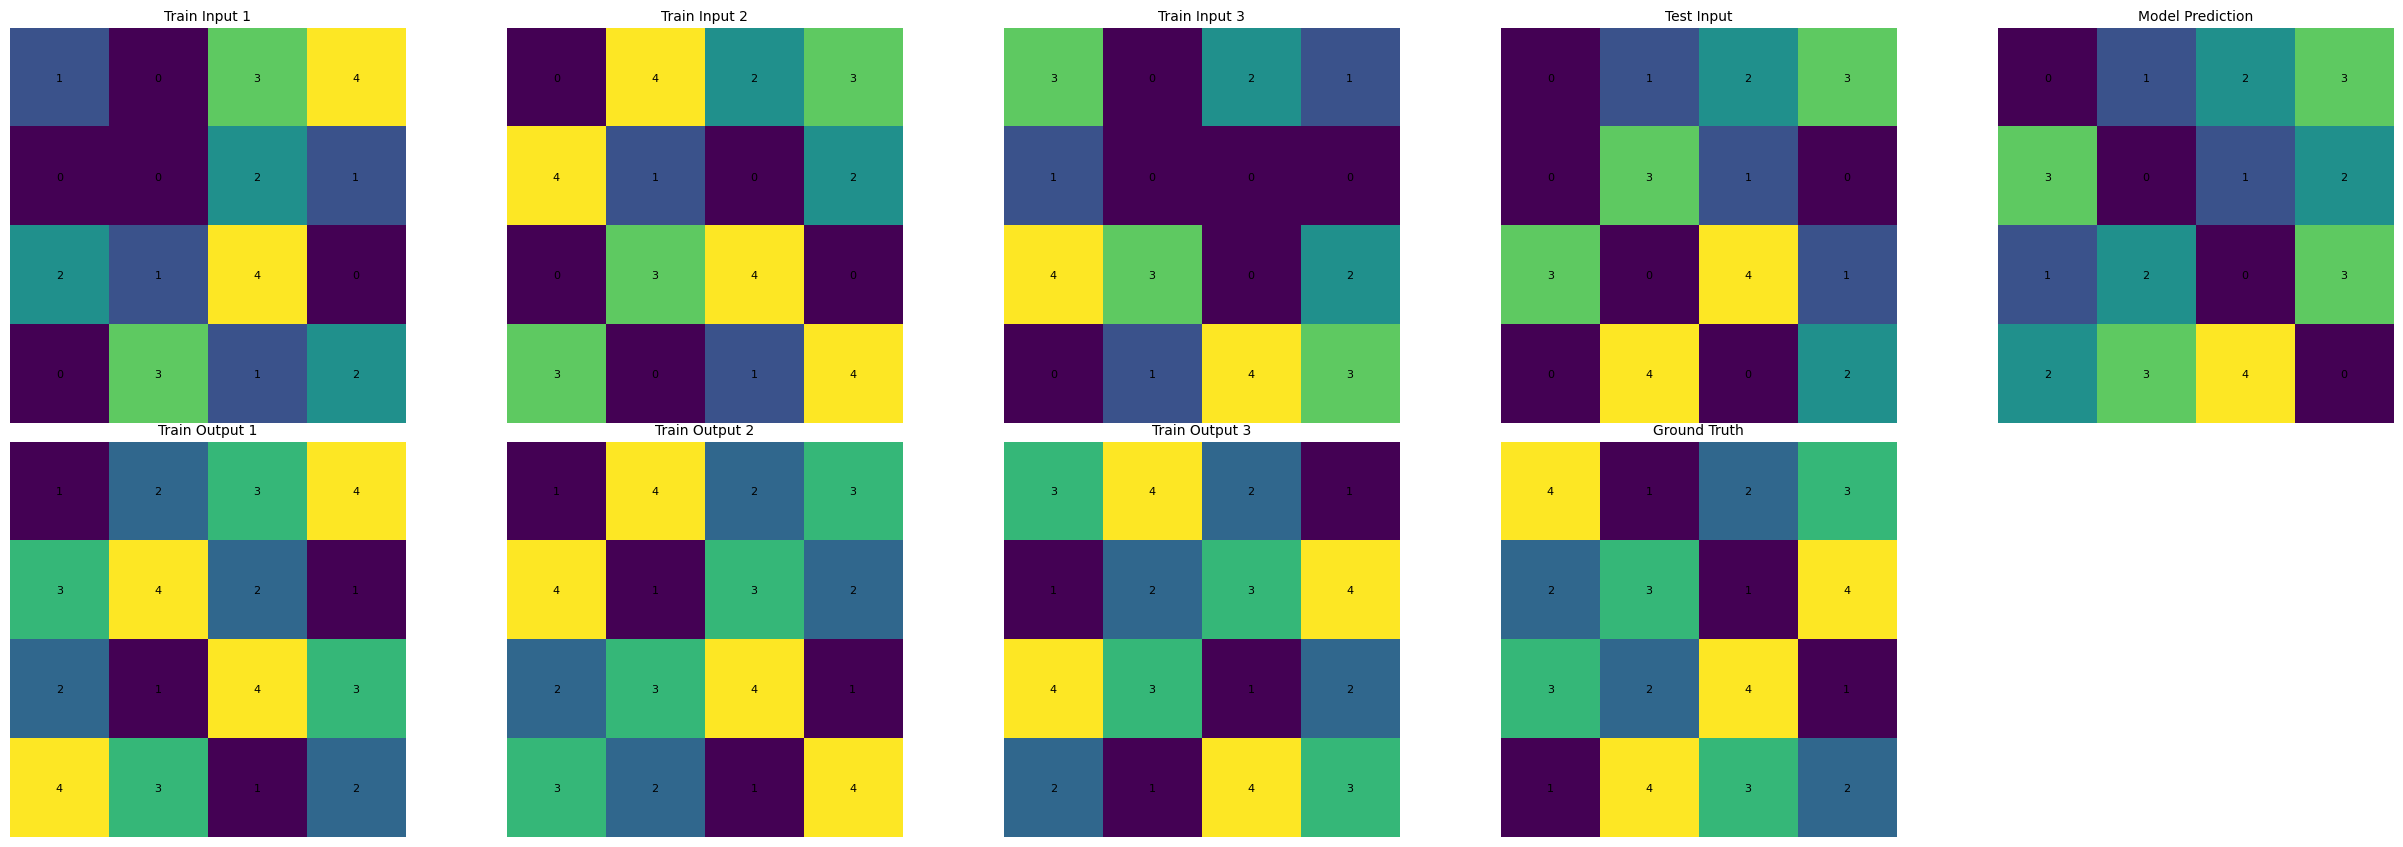


Visualizing Entry 9/20 (Key: 5783df64)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix has 0s and 9 non-zero values. Changed Values: The 9 non-zero values are rearranged to form a 3 by 3 matrix.


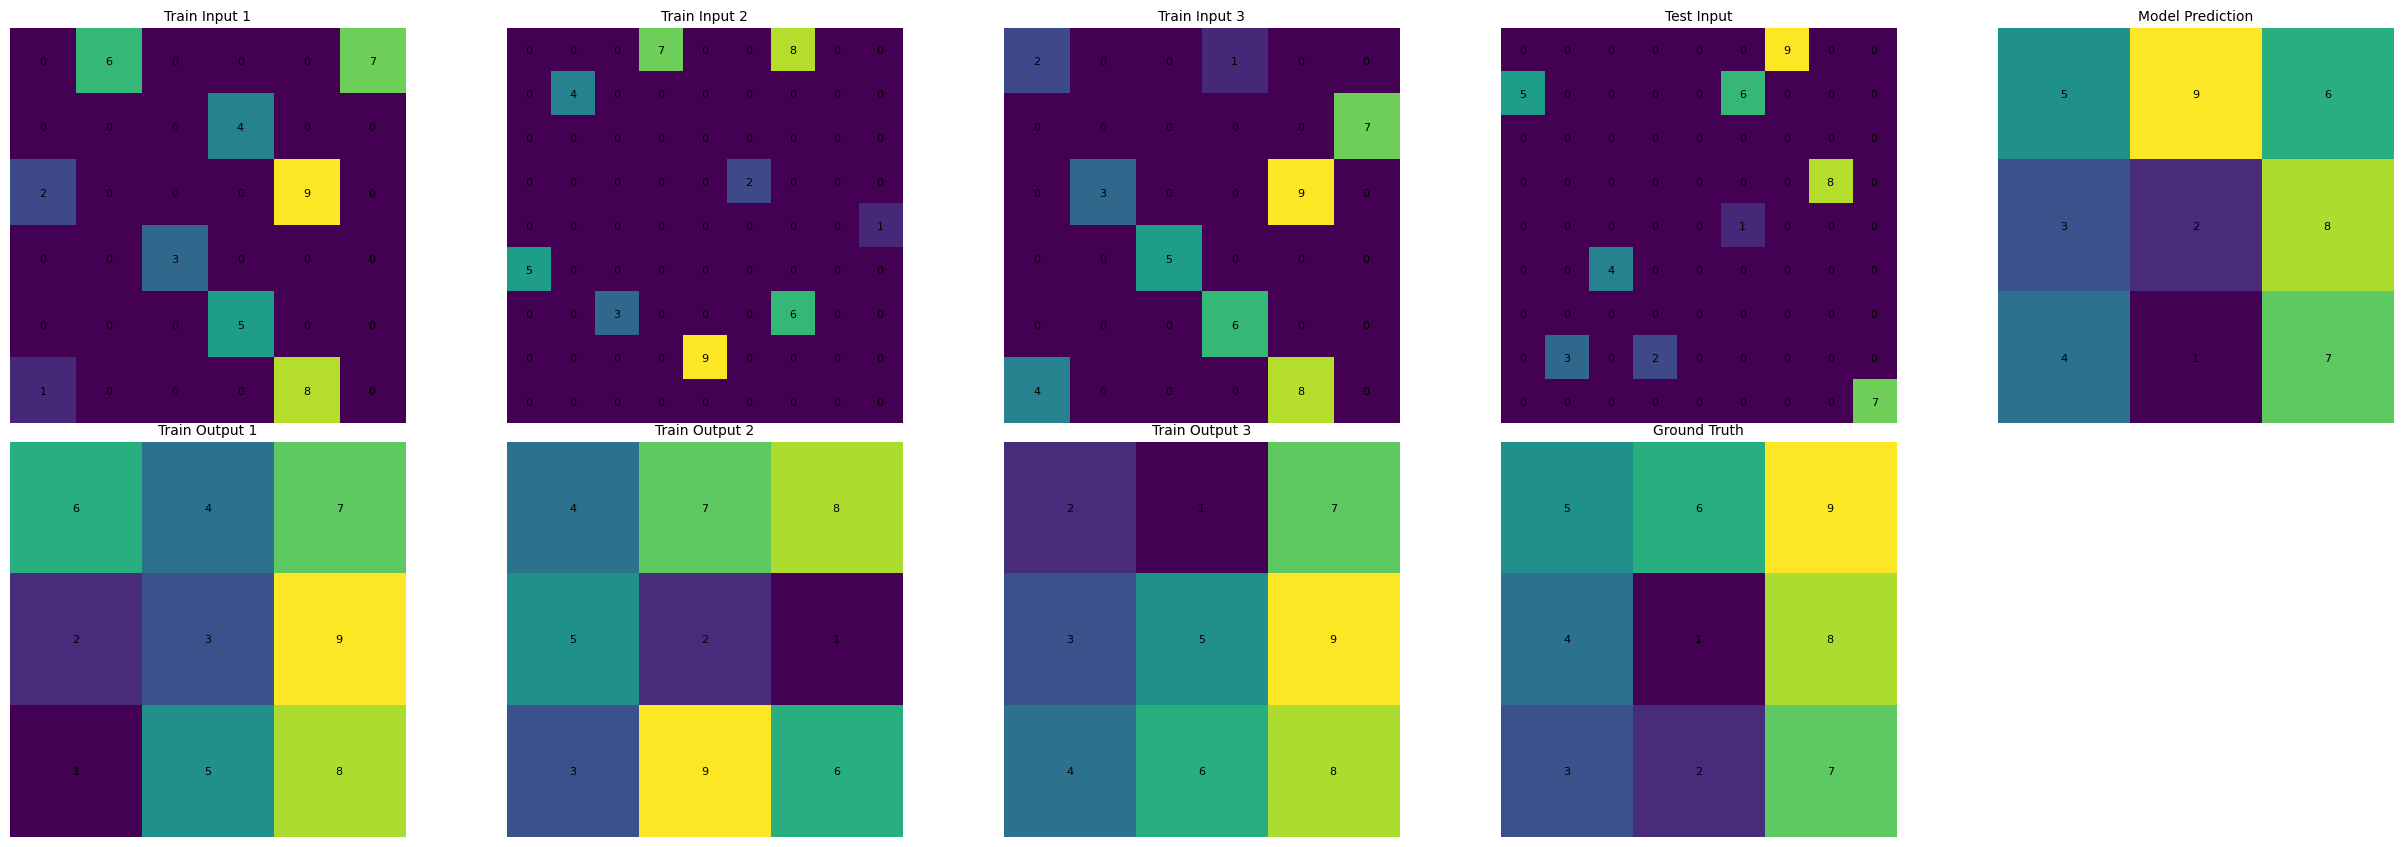


Visualizing Entry 10/20 (Key: 6a11f6da)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output dimensions remain the same. Values: Input matrix has values 0 and 1, and 8 and 6 in other parts. Changed Values: The values in the output matrix are the same as the input matrix but the position of the values are changed according to the reasoning.


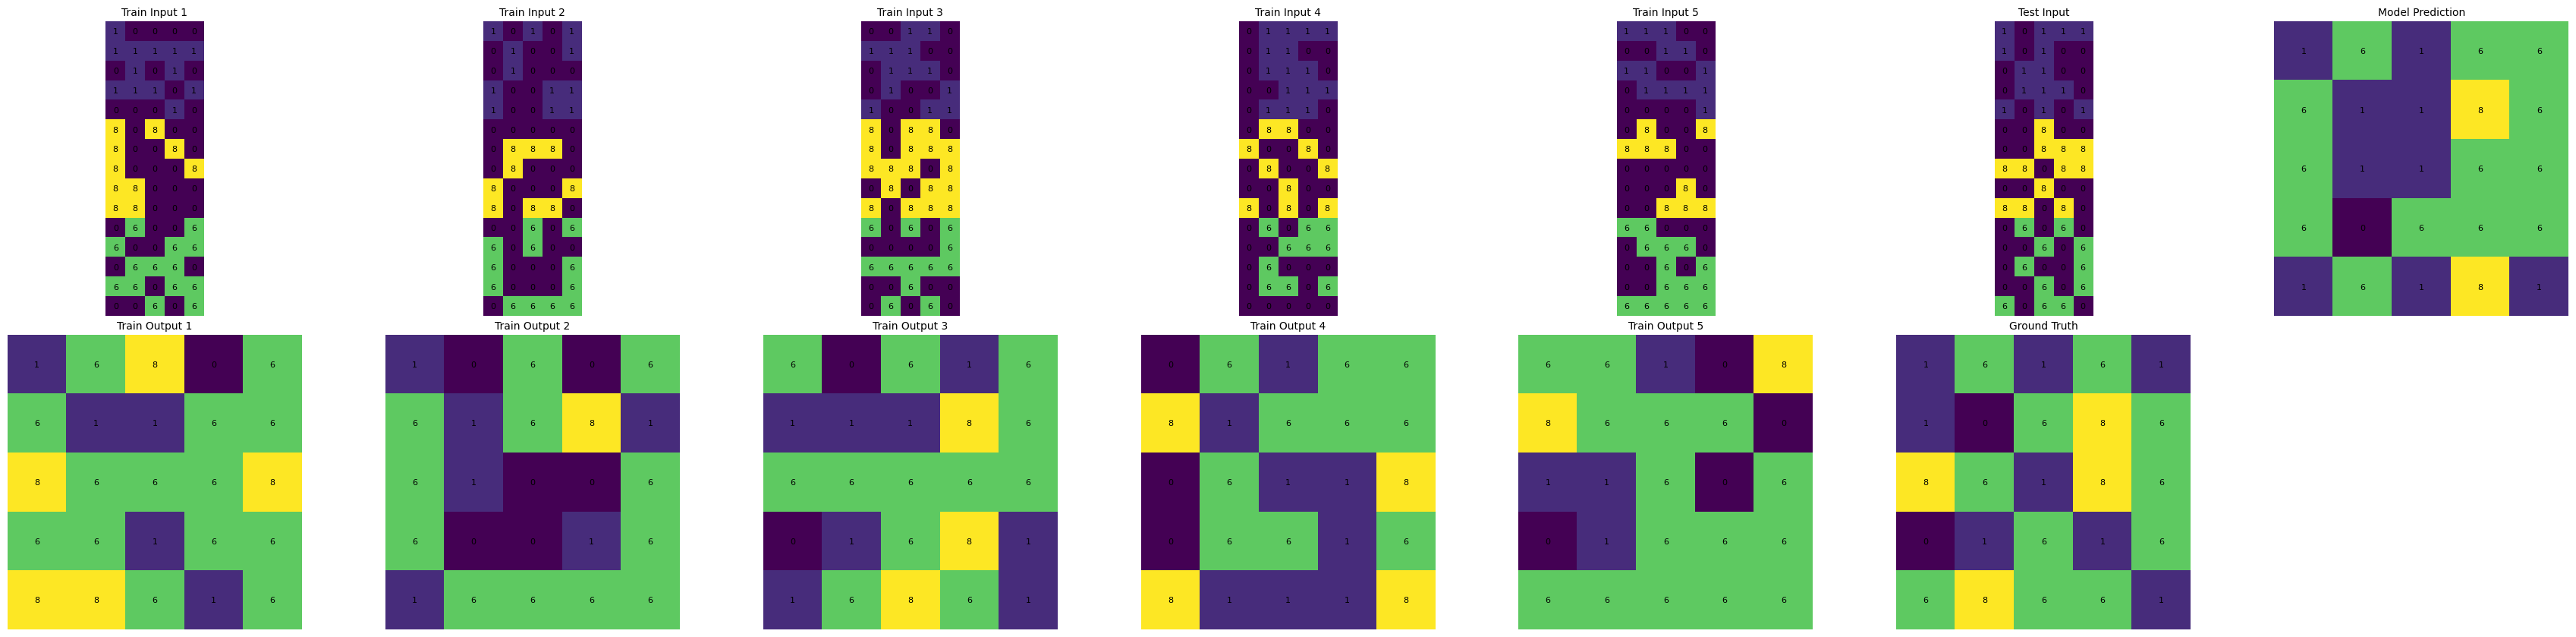


Visualizing Entry 11/20 (Key: 6ea4a07e)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output dimensions remain the same. Values: Input matrix contains a single non-zero value 3 and the output matrix contains the values 0 and 1. Changed values: Values are not changed but the position of the values are changed to form the output matrix.


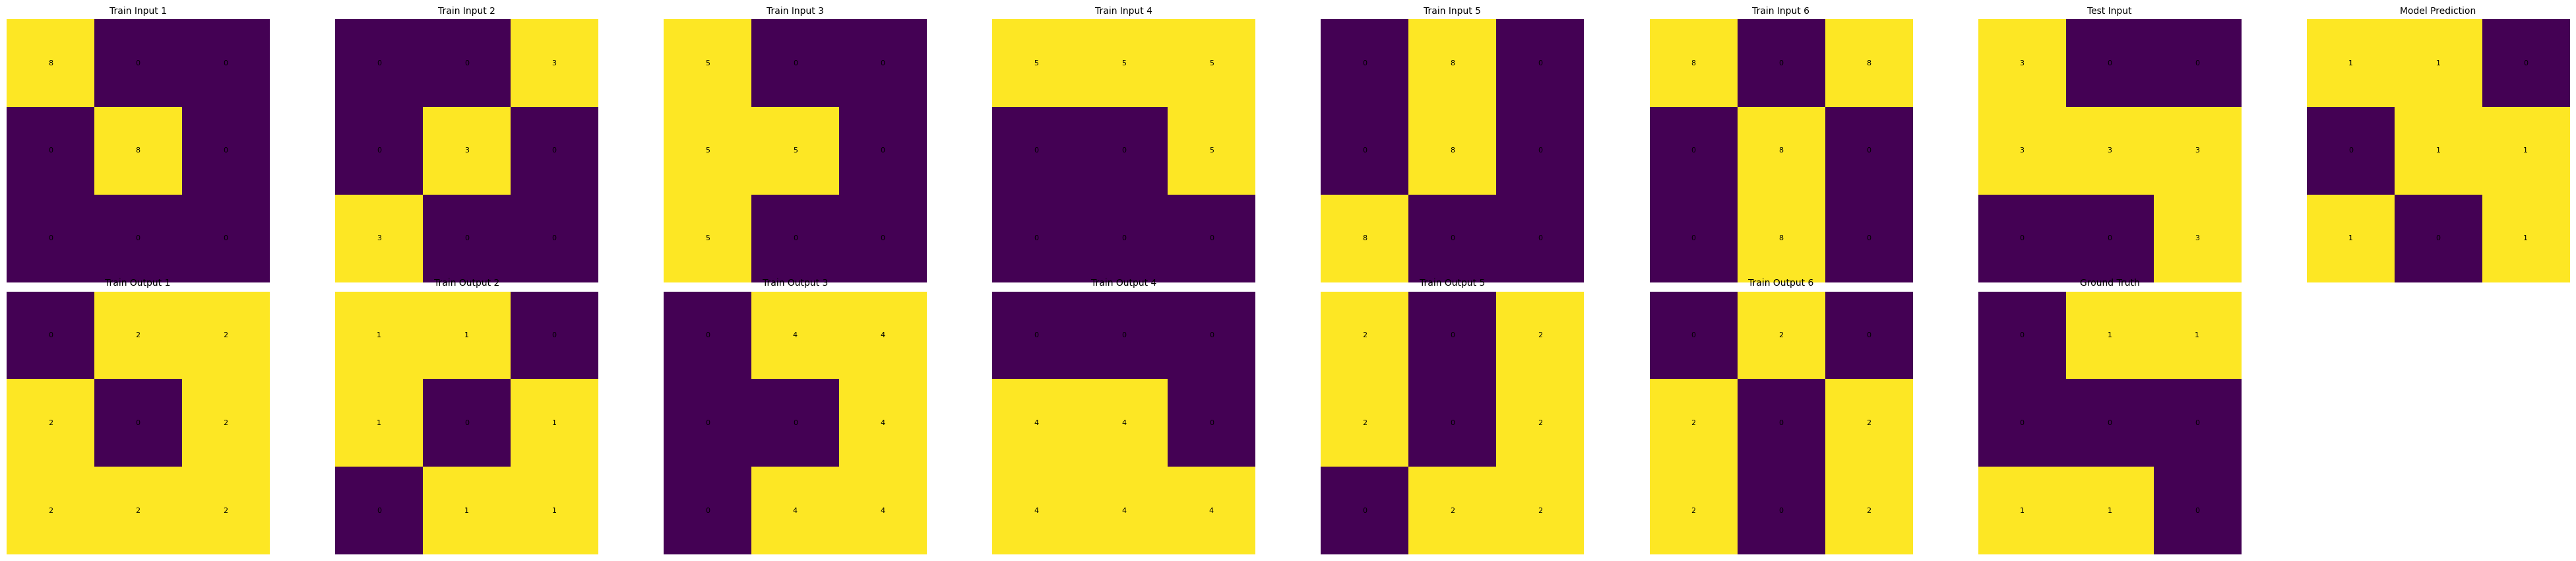


Visualizing Entry 12/20 (Key: 782b5218)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output matrices have the same dimension. Values: The input matrix contains the values 0, 9, and 2. Changed Values: The value 2 is replaced by 0 in the output matrix. Changed Grids: The entire input matrix is copied and the value 2 is replaced by 0 in the output matrix.


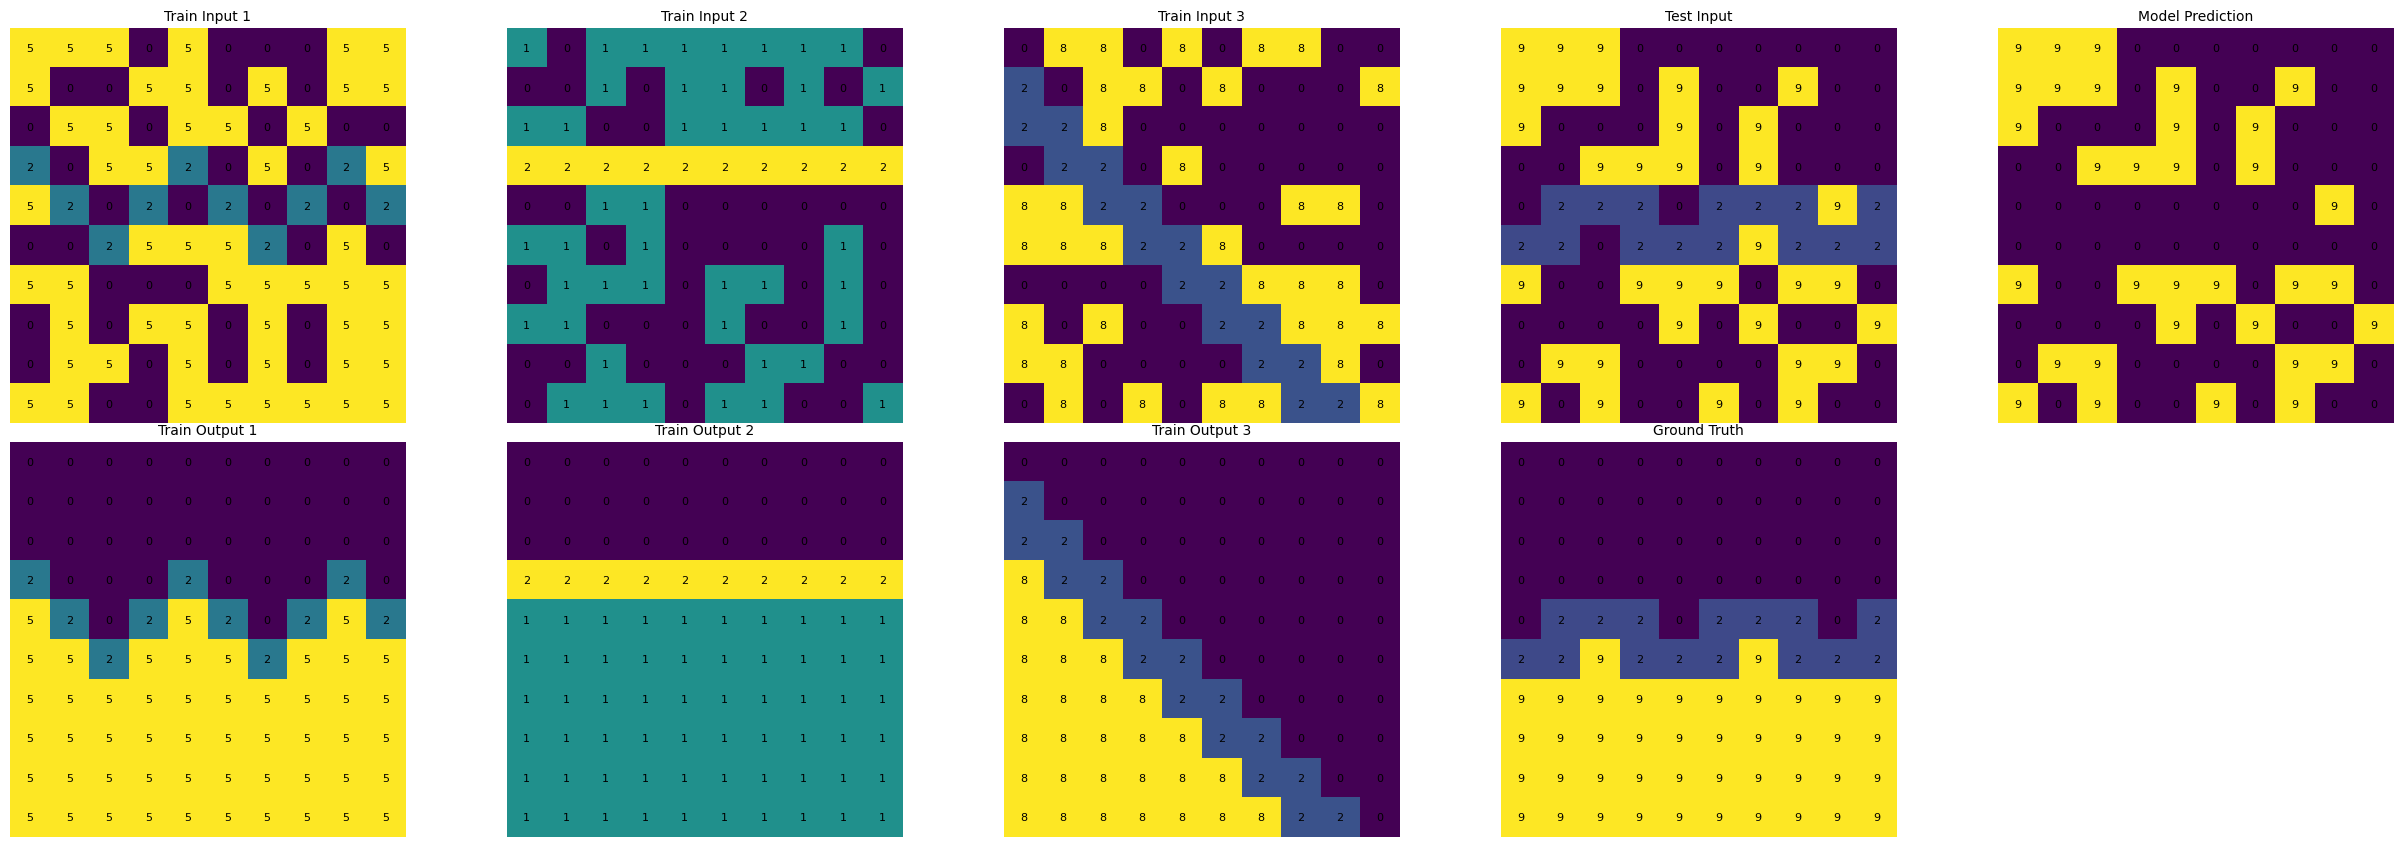


Visualizing Entry 13/20 (Key: 7d18a6fb)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output matrices have the same dimensions. Values: The input matrix contains a non-zero value 8 in a non-zero pattern and a non-zero value 2 in a non-zero pattern. Changed Values: The input matrix is copied and the non-zero value 8 is replaced by the non-zero value 5 and the non-zero value 2 is replaced by the non-zero value 4. Values: The output matrix contains non-zero values 5, 4, and 3. Changed Values: The non-zero value 8 is replaced by the non-zero value 5 and the non-zero value 2 is replaced by the non-zero value 4.


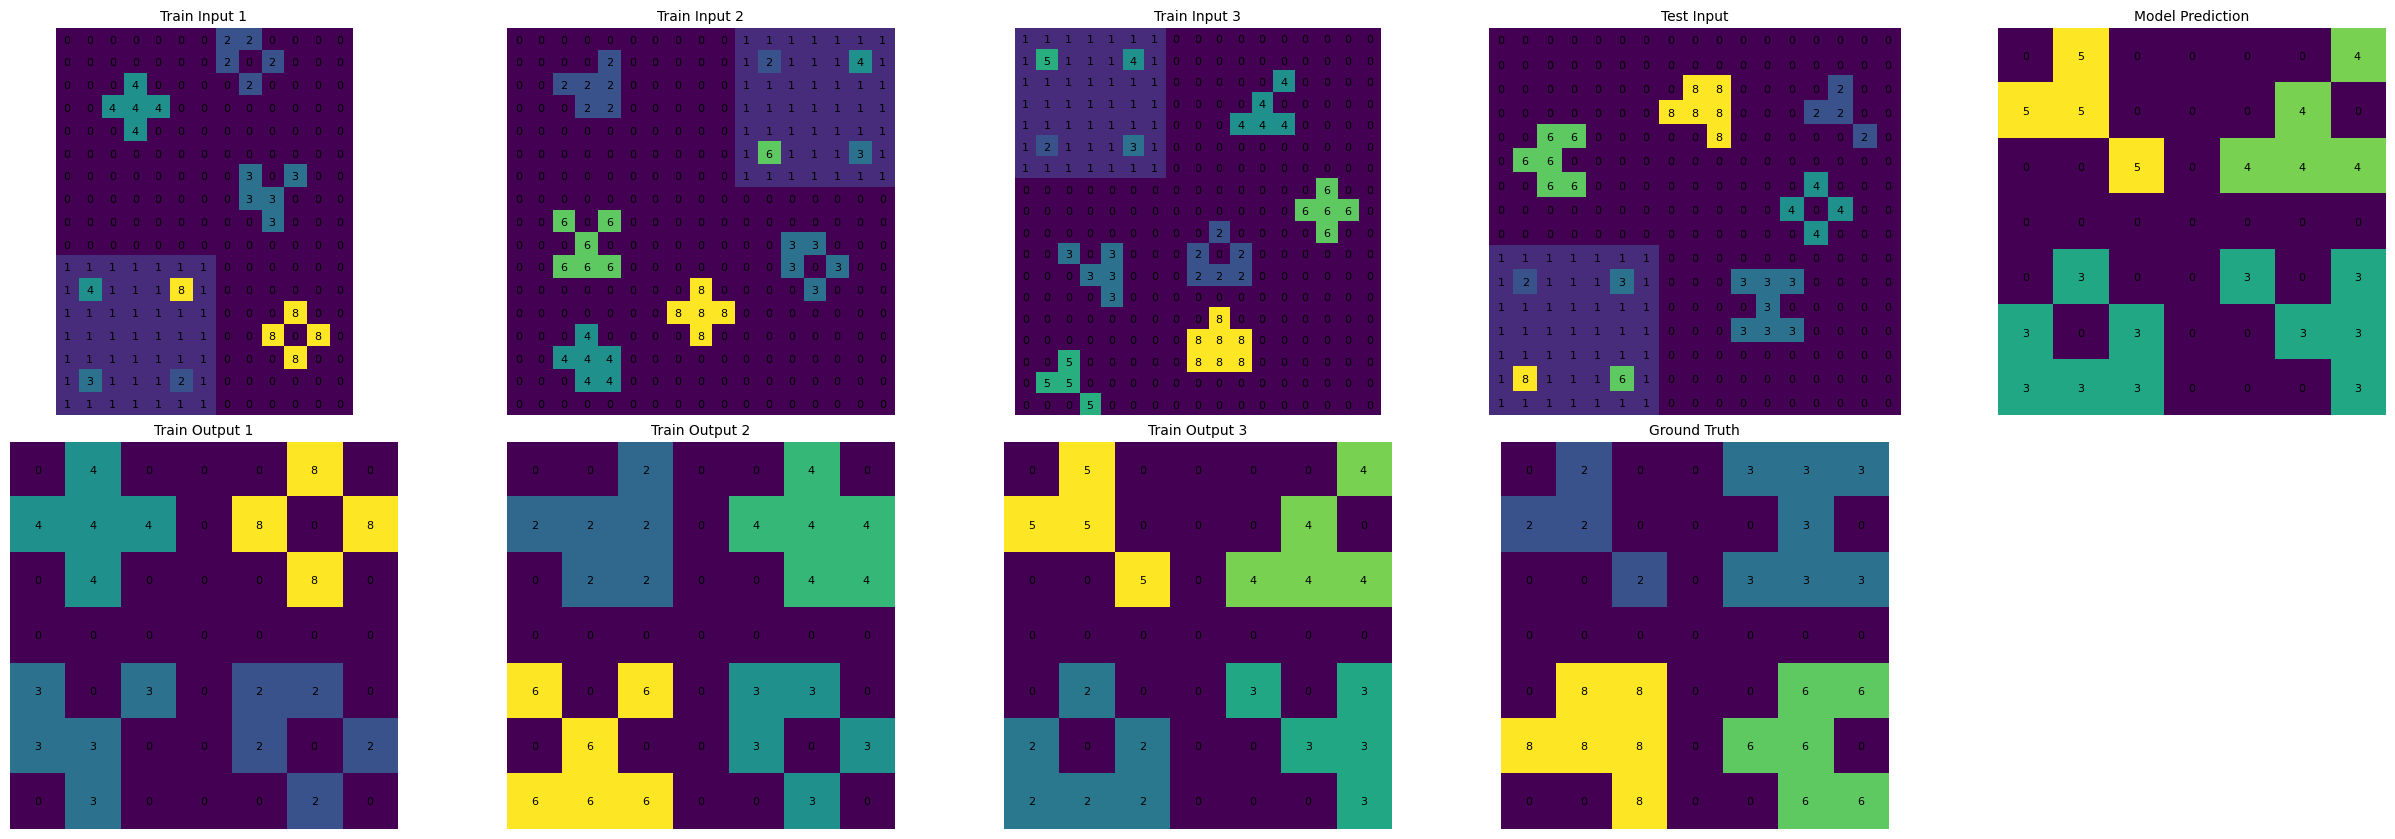


Visualizing Entry 14/20 (Key: 85fa5666)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: Input and output matrices have the same dimension. Values: Input matrix has 0,2,3,6,7,8 and output matrix has 0,2,3,6,7,8. Changed Values: The values are not changed in the output matrix, the position of the values is changed.


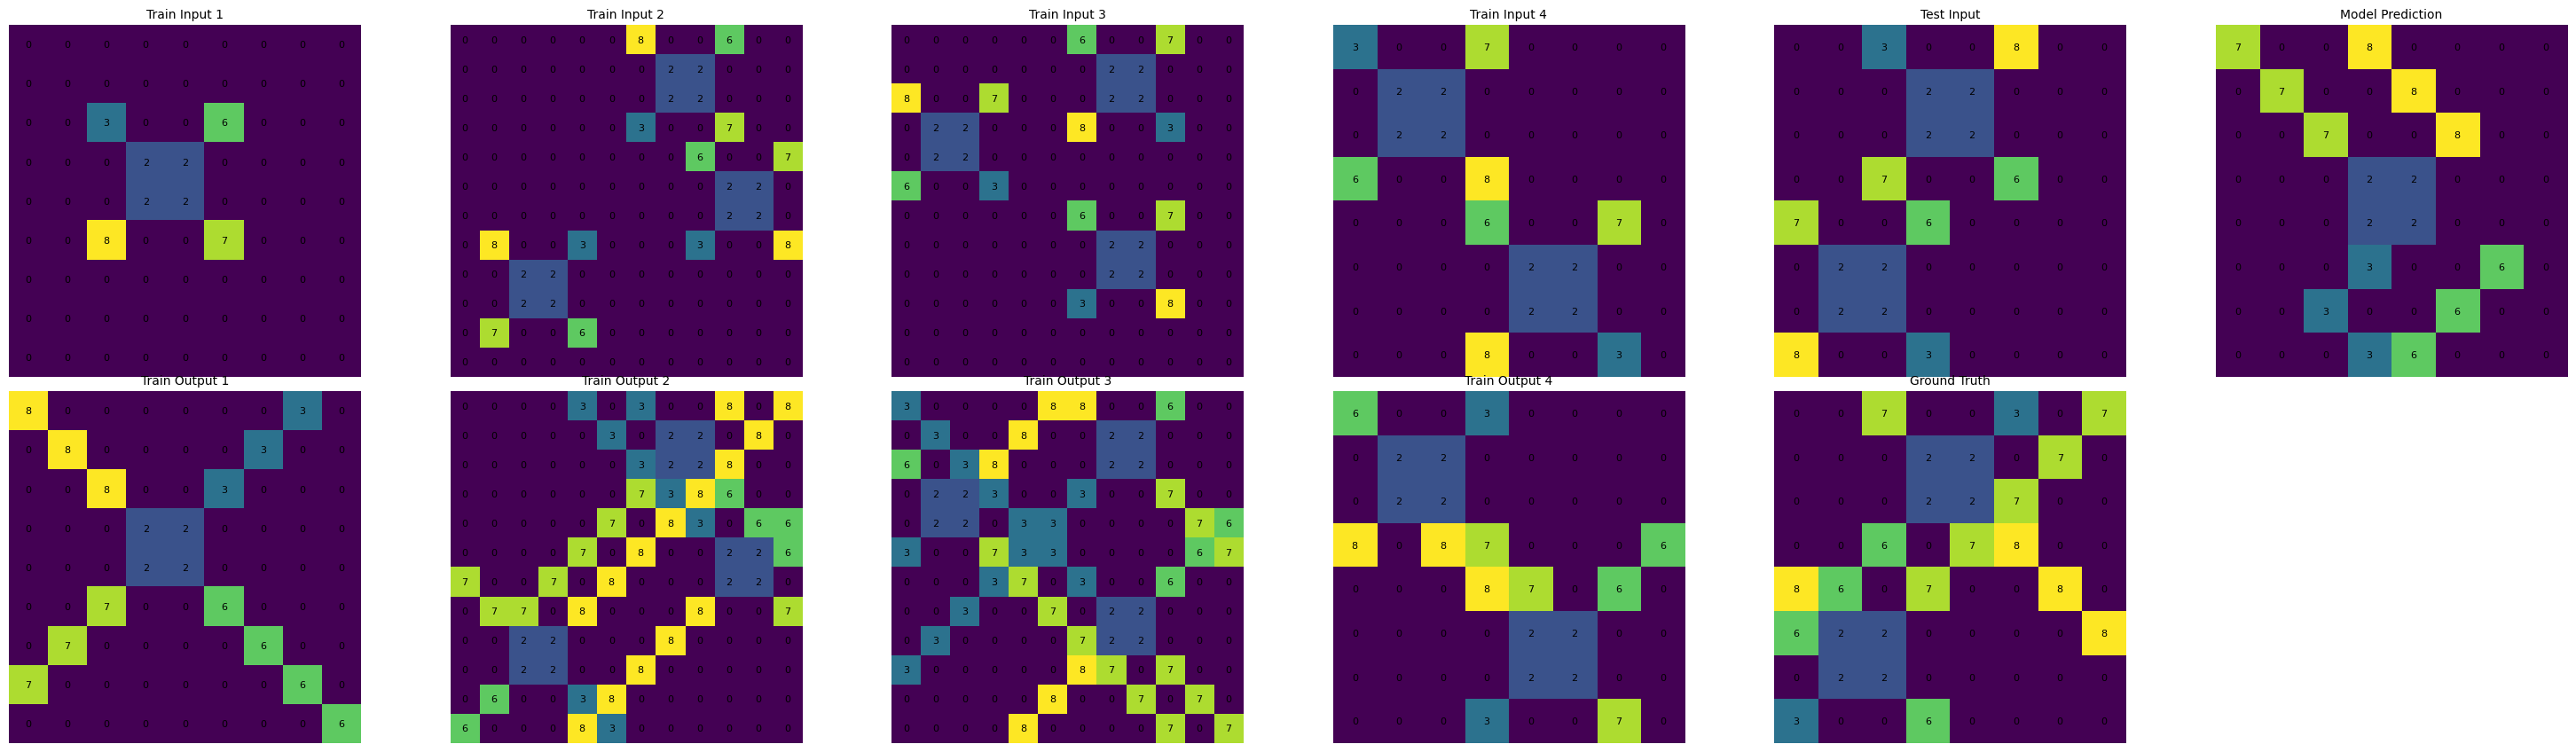


Visualizing Entry 15/20 (Key: 8ba14f53)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimensions: The input and output dimensions are the same. Values: The input matrix has a non-zero value 4 and 7 and the output matrix has a non-zero value 4 and 7. Changed Values: The value 4 and 7 are not changed in the output matrix. Values 4 and 7 are arranged in a diagonal structure and the non-zero values outside this diagonal structure are changed to 0.


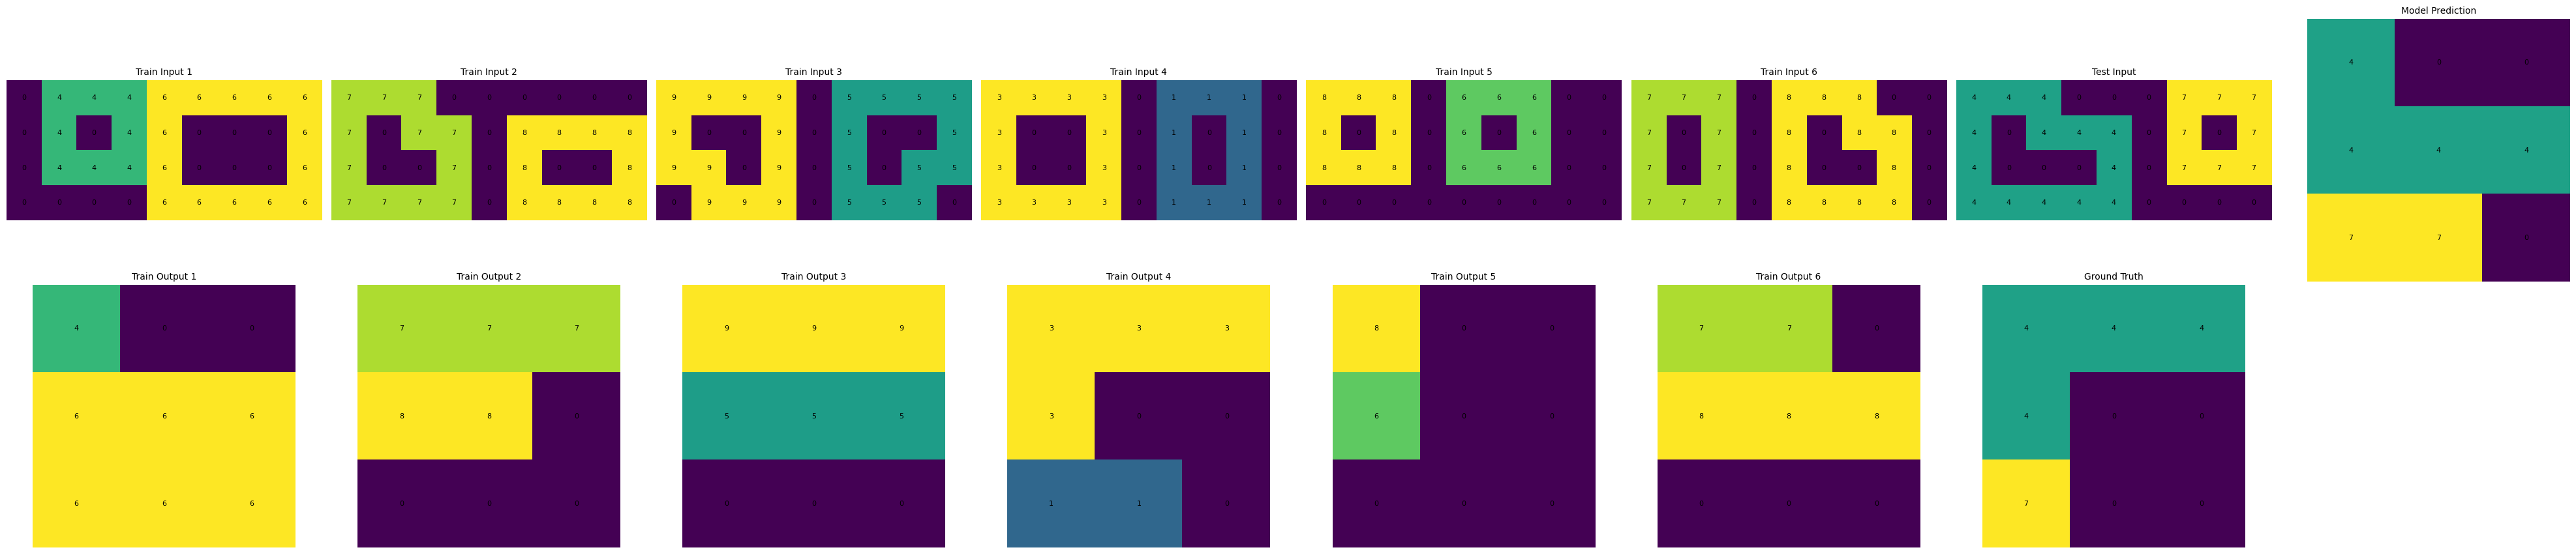


Visualizing Entry 16/20 (Key: aa18de87)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains a single non-zero value, 6. In the output matrix, the value 6 is replaced by the value 2. The value 2 will be present in the positions where the value 6 is present in the input matrix, and the value 6 will be present in the positions where the value 2 is present in the input matrix. Dimensions: Input and output dimensions are the same. Values: The input matrix contains a single non-zero value, 6. Changed Values: The value 6 is replaced by the value 2 in the output matrix.


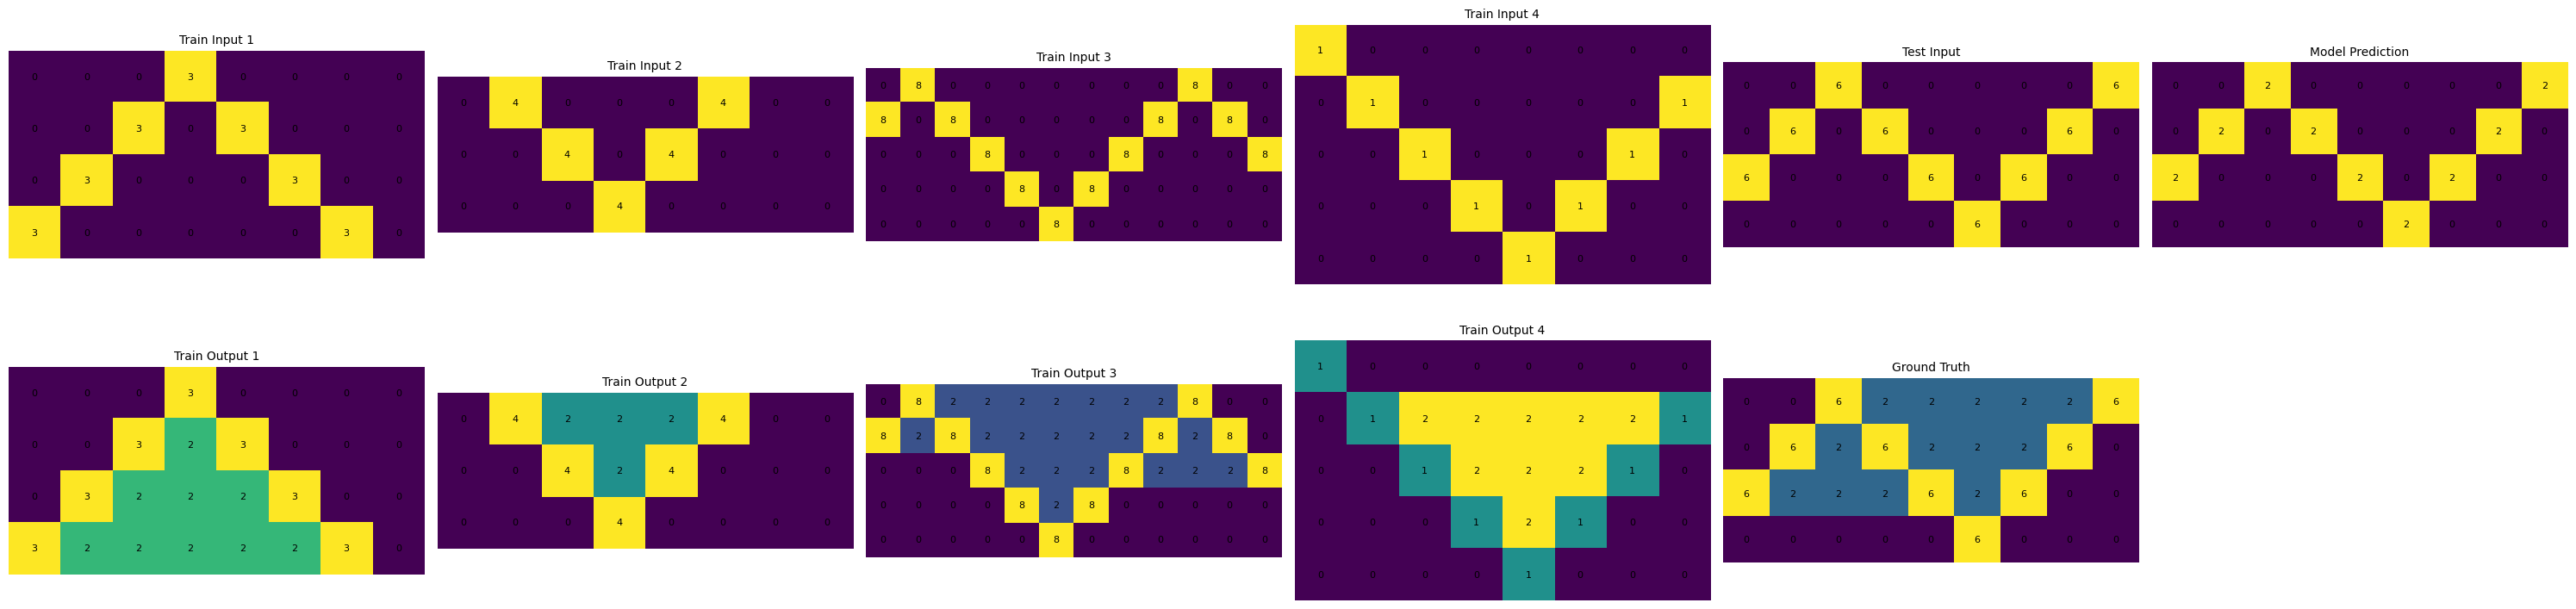


Visualizing Entry 17/20 (Key: b15fca0b)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. In this case, the input matrix contains a non-zero value and a zero value arranged in a specific pattern. The output matrix is created by adding a non-zero value to the regions where the input matrix contains the zero value. Dimensions: The input and output dimensions are the same. Values: The input matrix contains two non-zero values, one of which is 2 and the other is 1. Changed Values: The zero value in the input matrix is replaced by the non-zero value 4 in the output matrix.


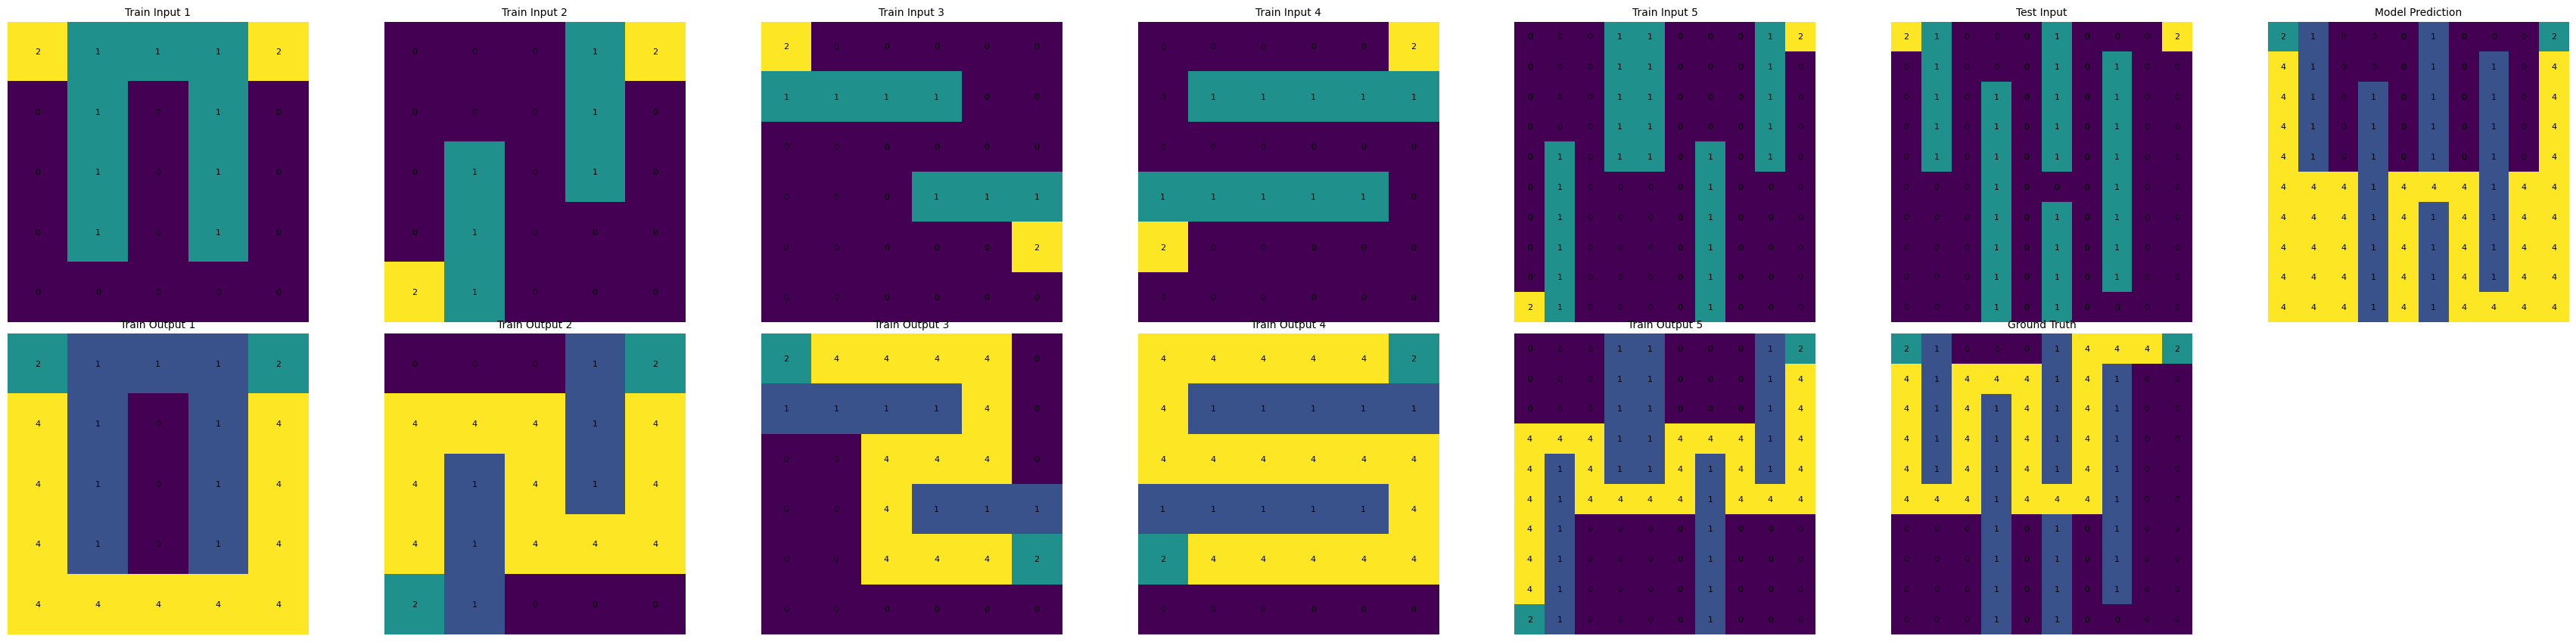


Visualizing Entry 18/20 (Key: c35c1b4c)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix is copied and the value 9 is replaced by 2 and 6 is replaced by 4. Dimensions: The input and output dimensions are the same. Values: Input matrix contains 0,2,6 and 9. Changed Values: 9 is replaced by 2 and 6 is replaced by 4.


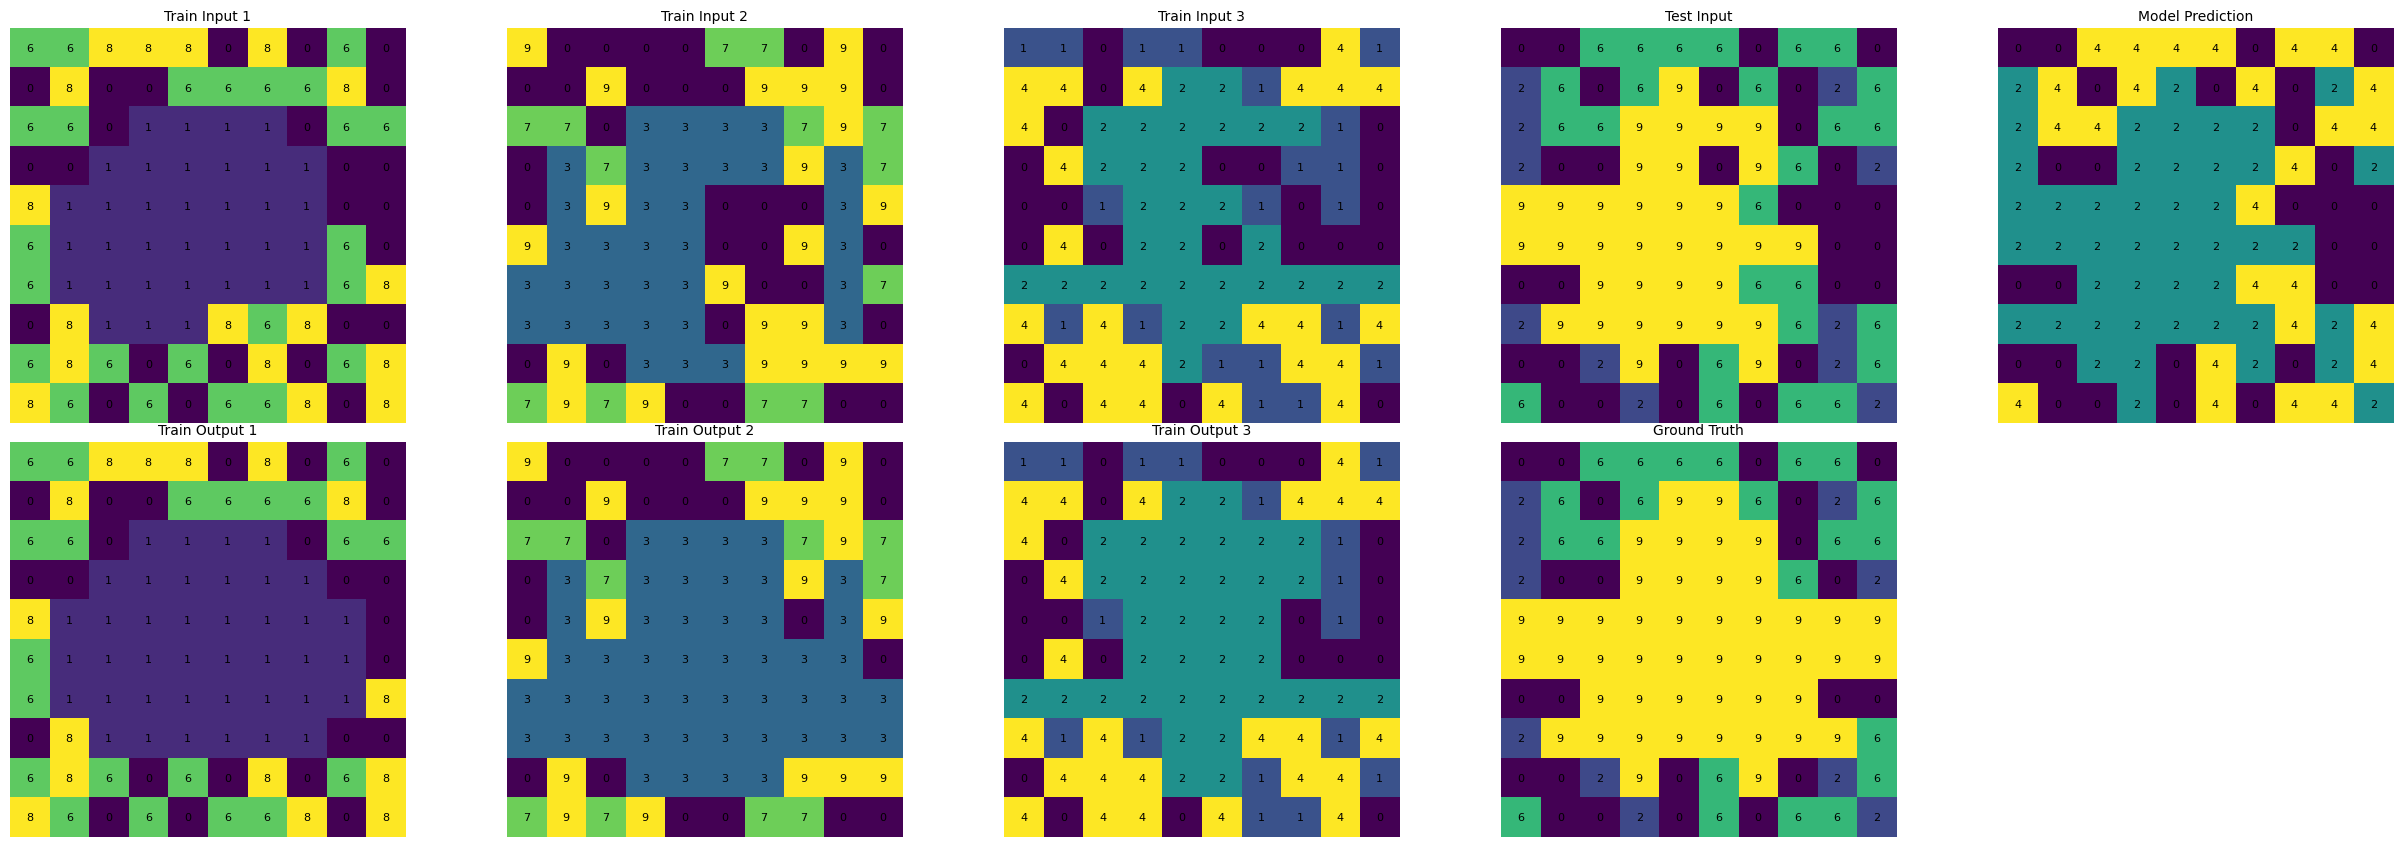


Visualizing Entry 19/20 (Key: e133d23d)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: Input matrix has non-zero values 0,4,6,8 and the output matrix has 0 and 2. Changed Values: The value 4 is replaced by 2 in the output matrix


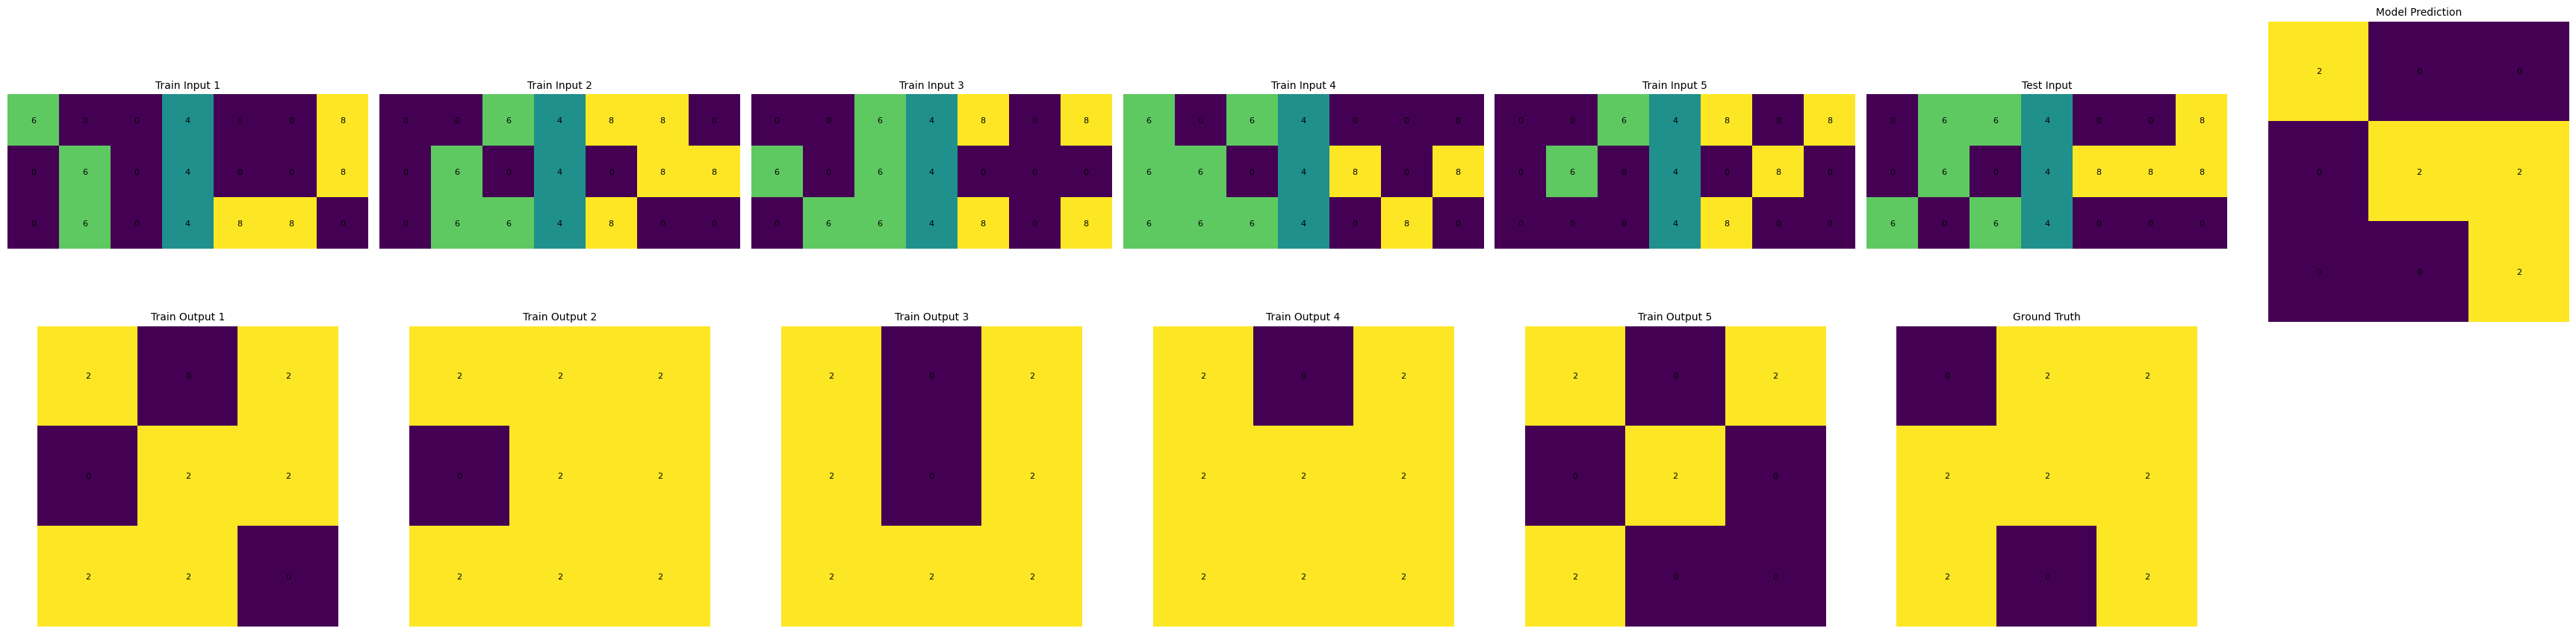


Visualizing Entry 20/20 (Key: ed74f2f2)

Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. The input matrix contains a non-zero value of 5 in a specific pattern. The output matrix is formed by creating a 3 by 3 matrix with the value 1, where the middle value of the matrix is 0. The position of the 1 values in the output matrix is determined by the pattern of 5 values in the input matrix. The 1 values in the output matrix are placed in such a way that they form a 3 by 3 matrix, with the middle value being 0. Dimensions: The input matrix has a dimension of 5 by 9 and the output matrix has a dimension of 3 by 3. Values: The input matrix contains the non-zero value 5 and the output matrix contains the non-zero value 1. Changed Values: The value 0 is changed to 1 in the output matrix based on the reasoning logic.


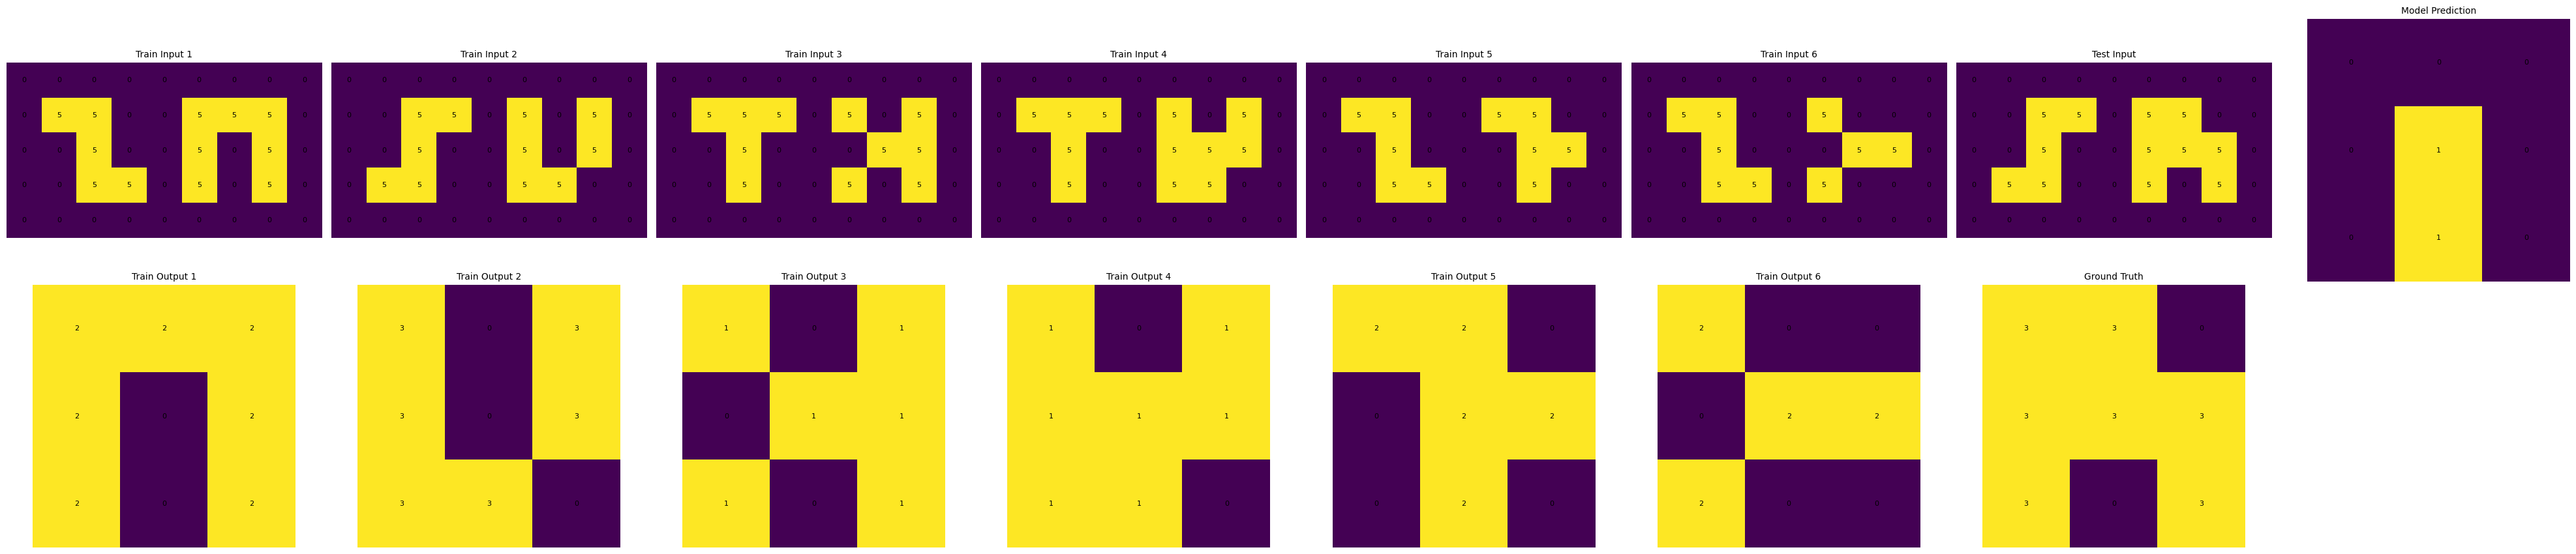

In [117]:
# Load the low accuracy predictions file
low_accuracy_predictions_file = r"C:\Users\U10093022\OneDrive - BASF\Desktop\low_accuracy_predictions_with_reasonings.json"
with open(low_accuracy_predictions_file, 'r') as f:
    low_accuracy_predictions_data = json.load(f)

# Function to visualize all entries in the low accuracy predictions file
def visualize_all_low_accuracy_predictions(low_accuracy_predictions_data, challenges_dict, evaluation_solutions):
    """
    Visualizes all entries in the low accuracy predictions file by matching their ground truth matrices
    with the evaluation solutions file and fetching the correct challenge entry.
    """
    for idx, prediction_entry in enumerate(low_accuracy_predictions_data):
        # Get the ground truth matrix from the prediction entry
        ground_truth = np.array(prediction_entry['ground_truth'])

        # Find the matching key from the evaluation solutions file
        matching_key = find_matching_key(ground_truth, evaluation_solutions)
        if not matching_key:
            print(f"Skipping Entry {idx + 1}: No matching key found for ground truth.")
            continue

        # Get the corresponding challenge entry
        challenge_entry = challenges_dict.get(matching_key)
        if not challenge_entry:
            print(f"Skipping Entry {idx + 1}: No challenge entry found for key {matching_key}.")
            continue

        # Visualize the entry
        print(f"\nVisualizing Entry {idx + 1}/{len(low_accuracy_predictions_data)} (Key: {matching_key})")
        visualize_full_context_fixed(prediction_entry, challenge_entry)

# Run the visualization for all low accuracy predictions
visualize_all_low_accuracy_predictions(low_accuracy_predictions_data, challenges_dict, evaluation_solutions)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to dynamically set text color based on cell brightness
def get_text_color(background_color):
    """
    Determines text color (white or black) based on the brightness of the background color.
    """
    r, g, b, _ = background_color  # Extract RGB values
    brightness = 0.299 * r + 0.587 * g + 0.114 * b  # Calculate perceived brightness
    return 'white' if brightness < 0.5 else 'black'

# Function to plot a matrix with dynamic text colors
def plot_with_dynamic_text_color(ax, matrix, title):
    """
    Plots a single matrix with dynamic text colors for better visibility.
    """
    im = ax.imshow(matrix, cmap='viridis')
    ax.set_title(title, fontsize=10)
    ax.axis('off')

    # Get the colormap and normalize to map values to colors
    colormap = plt.cm.viridis
    norm = plt.Normalize(vmin=matrix.min(), vmax=matrix.max())

    # Annotate the cells with dynamic text color
    for (i, j), val in np.ndenumerate(matrix):
        background_color = colormap(norm(val))  # Get the background color
        text_color = get_text_color(background_color)  # Determine text color
        ax.text(j, i, f"{int(val)}", ha='center', va='center', color=text_color, fontsize=8)

# Function to visualize all matrices for a single key
def visualize_all_matrices_with_dynamic_text(prediction_entry, challenge_entry, key):
    """
    Visualizes all matrices: Train Input, Train Output, Test Input, Model Prediction, Ground Truth.
    """
    model_prediction = np.array(prediction_entry['model_prediction'])
    ground_truth = np.array(prediction_entry['ground_truth'])
    
    # Extract test input and training examples
    test_input = np.array(challenge_entry['test'][0]['input'])
    train_examples = challenge_entry['train']

    # Calculate the total number of columns needed
    num_train_examples = len(train_examples)
    total_columns = num_train_examples + 2  # Train examples + Test input/Model prediction

    # Create the plot
    fig, axes = plt.subplots(2, total_columns, figsize=(5 * total_columns, 10))

    # Plot training examples
    for idx, example in enumerate(train_examples):
        example_input = np.array(example['input'])
        example_output = np.array(example['output'])
        
        plot_with_dynamic_text_color(axes[0, idx], example_input, f"Train Input {idx + 1}")
        plot_with_dynamic_text_color(axes[1, idx], example_output, f"Train Output {idx + 1}")

    # Plot test input
    plot_with_dynamic_text_color(axes[0, num_train_examples], test_input, "Test Input")

    # Plot model prediction
    plot_with_dynamic_text_color(axes[0, num_train_examples + 1], model_prediction, "Model Prediction")

    # Plot ground truth below test input
    plot_with_dynamic_text_color(axes[1, num_train_examples], ground_truth, "Ground Truth")

    # Remove extra subplot below model prediction
    fig.delaxes(axes[1, num_train_examples + 1])

    # Adjust layout for visualizations
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])

    # Print reasoning below the plot
    reasoning = prediction_entry['reasoning']
    print("\nReasoning:")
    print(reasoning)

    # Show the plot
    plt.show()

# Fetch the relevant prediction and challenge data for the key
key = 'ed74f2f2'
prediction_entry = next(entry for entry in predictions_data if find_matching_key(np.array(entry['ground_truth']), evaluation_solutions) == key)
challenge_entry = challenges_dict.get(key)

# Visualize all matrices with dynamic text color
visualize_all_matrices_with_dynamic_text(prediction_entry, challenge_entry, key)


StopIteration: 


Reasoning:
Describe the transformation applied to the input matrix and provide the resulting output matrix. Dimension: The input and output dimensions are the same. Values: The input matrix has 0s and 9 non-zero values. Changed Values: The 9 non-zero values are rearranged to form a 3 by 3 matrix.


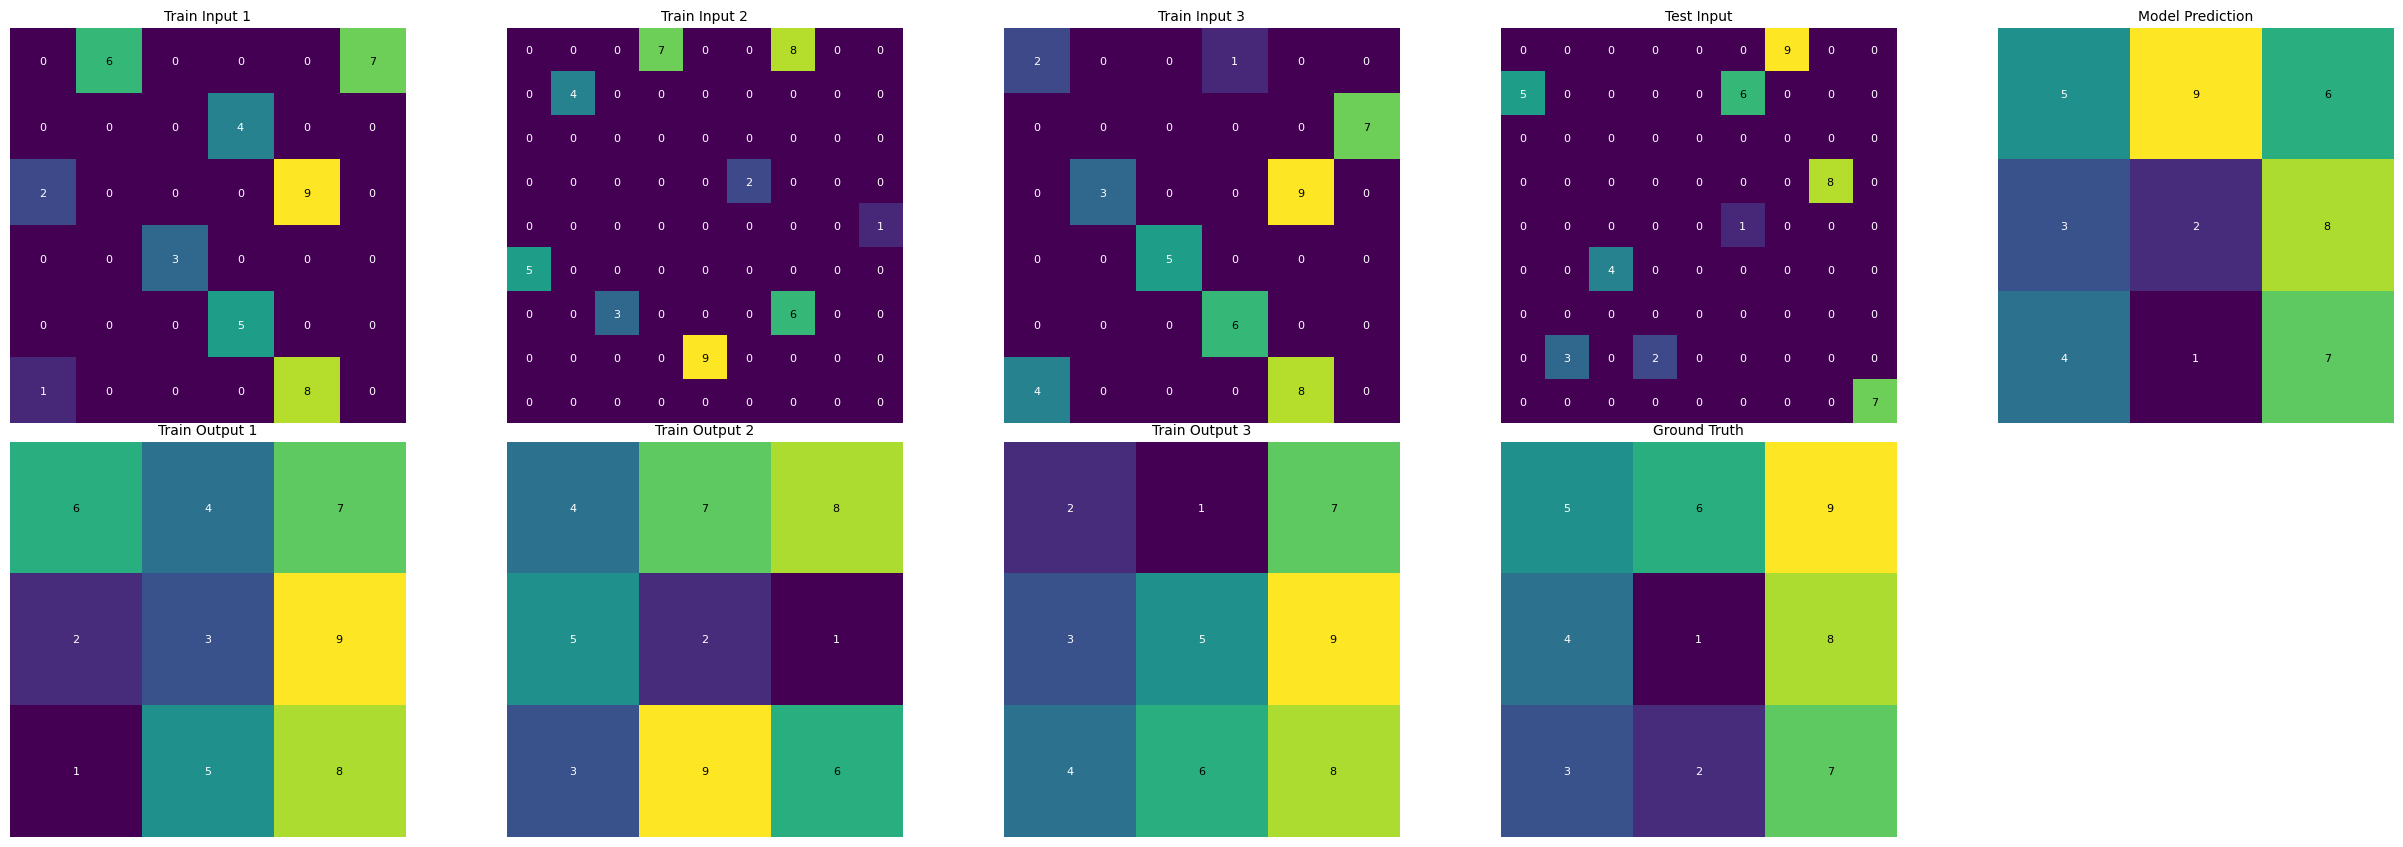

In [128]:
# Function to visualize all matrices for a single key with dynamic text colors
def visualize_all_matrices_for_low_accuracy(prediction_entry, challenge_entry, key):
    """
    Visualizes all matrices: Train Input, Train Output, Test Input, Model Prediction, Ground Truth.
    """
    model_prediction = np.array(prediction_entry['model_prediction'])
    ground_truth = np.array(prediction_entry['ground_truth'])
    
    # Extract test input and training examples
    test_input = np.array(challenge_entry['test'][0]['input'])
    train_examples = challenge_entry['train']

    # Calculate the total number of columns needed
    num_train_examples = len(train_examples)
    total_columns = num_train_examples + 2  # Train examples + Test input/Model prediction

    # Create the plot
    fig, axes = plt.subplots(2, total_columns, figsize=(5 * total_columns, 10))

    # Plot training examples
    for idx, example in enumerate(train_examples):
        example_input = np.array(example['input'])
        example_output = np.array(example['output'])
        
        plot_with_dynamic_text_color(axes[0, idx], example_input, f"Train Input {idx + 1}")
        plot_with_dynamic_text_color(axes[1, idx], example_output, f"Train Output {idx + 1}")

    # Plot test input
    plot_with_dynamic_text_color(axes[0, num_train_examples], test_input, "Test Input")

    # Plot model prediction
    plot_with_dynamic_text_color(axes[0, num_train_examples + 1], model_prediction, "Model Prediction")

    # Plot ground truth below test input
    plot_with_dynamic_text_color(axes[1, num_train_examples], ground_truth, "Ground Truth")

    # Remove extra subplot below model prediction
    fig.delaxes(axes[1, num_train_examples + 1])

    # Adjust layout for visualizations
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])

    # Print reasoning below the plot
    reasoning = prediction_entry['reasoning']
    print("\nReasoning:")
    print(reasoning)

    # Show the plot
    plt.show()

# Fetch the relevant prediction and challenge data for the key
key = '5783df64'
prediction_entry = next(entry for entry in low_accuracy_predictions_data if find_matching_key(np.array(entry['ground_truth']), evaluation_solutions) == key)
challenge_entry = challenges_dict.get(key)

# Visualize all matrices with dynamic text color for low accuracy predictions
visualize_all_matrices_for_low_accuracy(prediction_entry, challenge_entry, key)
